## Preparando o ambiente

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy import stats
from  matplotlib.ticker import PercentFormatter
from sklearn.impute import KNNImputer



In [ ]:
csv_url = 'https://raw.githubusercontent.com/dariogsv/Ciencia-de-dados/main/train.csv'

In [ ]:
std = pd.read_csv(csv_url)

In [ ]:
#O arquivo original possui 167 colunas das quais descartamos 133 por não acharmos que a informação seja relevante para nosso estudo. 
#No total selecionamos 34 colunas. 
#Selecionando as mútiplas colunas (34 no total) que iremos analisar:
std = std[['CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q005', 'Q006', 'Q025', 'Q026', 'Q027', 'Q028', 'Q046', 'Q047']]
std.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q025,Q026,Q027,Q028,Q046,Q047
0,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,1,4,1,0,1,1,1,1,436.3,495.4,581.2,399.4,1,1.0,520.0,D,D,3,C,A,C,H,E,A,A
1,2304707,Granja,23,CE,17,F,0.0,3,1,2,0,2,0,1,1,1,1,474.5,544.1,599.0,459.8,1,1.0,580.0,A,A,5,B,A,A,NaN,NaN,B,A
2,2304400,Fortaleza,23,CE,21,F,0.0,3,1,3,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,D,D,4,C,A,A,NaN,NaN,C,A
3,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,1,9,1,0,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,H,E,4,E,B,C,F,C,A,D
4,1302603,Manaus,13,AM,28,M,0.0,2,1,1,4,1,0,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,E,D,4,C,A,B,F,D,A,A


In [ ]:
#Dimensões do data frame
#13730 são o total de alunos analisados antes de tratar os dados. 
std.shape

(13730, 34)

## Setando campos como categóricos


In [ ]:
std.dtypes

CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_IDADE                     int64
TP_SEXO                     object
TP_ESTADO_CIVIL            float64
TP_COR_RACA                  int64
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
IN_TREINEIRO                 int64
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
TP_LINGUA                    int64
TP_STATUS_REDACAO          float64
NU_NOTA_REDACAO            float64
Q001                        object
Q002                        object
Q005                         int64
Q006                        object
Q025                

In [ ]:
# Ajustando tipos dos dados
std.CO_MUNICIPIO_RESIDENCIA = std.CO_MUNICIPIO_RESIDENCIA.astype('category')
std.NO_MUNICIPIO_RESIDENCIA = std.NO_MUNICIPIO_RESIDENCIA.astype('category')
std.CO_UF_RESIDENCIA = std.CO_UF_RESIDENCIA.astype('category')
std.SG_UF_RESIDENCIA = std.SG_UF_RESIDENCIA.astype('category')
std.TP_SEXO = std.TP_SEXO.astype('category')
std.TP_ESTADO_CIVIL = std.TP_ESTADO_CIVIL.astype('category')
std.TP_COR_RACA = std.TP_COR_RACA.astype('category')
std.TP_NACIONALIDADE = std.TP_NACIONALIDADE.astype('category')
std.TP_ST_CONCLUSAO = std.TP_ST_CONCLUSAO.astype('category')
std.TP_ANO_CONCLUIU = std.TP_ANO_CONCLUIU.astype('category')
std.TP_ESCOLA = std.TP_ESCOLA.astype('category')
std.IN_TREINEIRO = std.IN_TREINEIRO.astype('category')
std.TP_LINGUA = std.TP_LINGUA.astype('category')
std.TP_STATUS_REDACAO = std.TP_STATUS_REDACAO.astype('category')
std.TP_PRESENCA_LC = std.TP_PRESENCA_LC.astype('category')
std.TP_PRESENCA_MT = std.TP_PRESENCA_MT.astype('category')
std.TP_PRESENCA_CH = std.TP_PRESENCA_CH.astype('category')
std.TP_PRESENCA_CN = std.TP_PRESENCA_CN.astype('category')
std.Q001 = std.Q001.astype('category')
std.Q002 = std.Q002.astype('category')
std.Q005 = std.Q005.astype('category')
std.Q006 = std.Q006.astype('category')
std.Q025 = std.Q025.astype('category')
std.Q026 = std.Q026.astype('category')
std.Q027 = std.Q027.astype('category')
std.Q028 = std.Q028.astype('category')
std.Q046 = std.Q046.astype('category')
std.Q047 = std.Q047.astype('category')


## Tratamento de dados ausentes


In [ ]:
#Dimensões do data frame antes do pré-processamento dos dados
std.shape

(13730, 34)

In [ ]:
std.isnull().sum()

CO_MUNICIPIO_RESIDENCIA       0
NO_MUNICIPIO_RESIDENCIA       0
CO_UF_RESIDENCIA              0
SG_UF_RESIDENCIA              0
NU_IDADE                      0
TP_SEXO                       0
TP_ESTADO_CIVIL             528
TP_COR_RACA                   0
TP_NACIONALIDADE              0
TP_ST_CONCLUSAO               0
TP_ANO_CONCLUIU               0
TP_ESCOLA                     0
IN_TREINEIRO                  0
TP_PRESENCA_CN                0
TP_PRESENCA_CH                0
TP_PRESENCA_LC                0
TP_PRESENCA_MT                0
NU_NOTA_CN                 3389
NU_NOTA_CH                 3389
NU_NOTA_LC                 3597
NU_NOTA_MT                 3597
TP_LINGUA                     0
TP_STATUS_REDACAO          3597
NU_NOTA_REDACAO            3597
Q001                          0
Q002                          0
Q005                          0
Q006                          0
Q025                          0
Q026                          0
Q027                       7373
Q028    

In [ ]:
std[(std.Q026 == 'A')].Q027.isnull().sum()
# std[(std.Q026 == 'A')].shape

7215

Como não há mais que 70% de respostas nulas em nenhuma coluna, consideramos fazer a inputação de dados não críticos e exclusão de dados críticos.



In [ ]:
# Substituindo dados nulos em Q027 ("Com que idade você começou a exercer uma atividade remunerada?")
# quando a resposta para a Q026 ("Você exerce ou já exerceu atividade remunerada?") é 'A' ("Não, nunca trabalhei.")
std.Q027 = std.Q027.cat.add_categories('Z')
std.Q027 = std.Q027.combine_first(std[(std.Q026 == 'A') & (std.Q027.isnull())].Q027.fillna('Z'))
std.Q027.isnull().sum()

158

In [ ]:
# Substituindo dados nulos em Q028 ("Quantas horas semanais você trabalha ou trabalhava aproximadamente? (Considere a atividade remunerada mais recente.)")
# quando a resposta para a Q026 ("Você exerce ou já exerceu atividade remunerada?") é 'A' ("Não, nunca trabalhei.")
std.Q028 = std.Q028.cat.add_categories('Z')
std.Q028 = std.Q028.combine_first(std[(std.Q026 == 'A') & (std.Q028.isnull())].Q028.fillna('Z'))
std.Q028.isnull().sum()

161

In [ ]:
std.TP_ESTADO_CIVIL = std.TP_ESTADO_CIVIL.cat.add_categories(-1)
std.TP_ESTADO_CIVIL = std.TP_ESTADO_CIVIL.fillna(-1)

Podemos inferir, então, das pessoas que já trabalharam, 158 não responderam com quantos anos começaram (Q027) e 161 não responderam quantas horas por dia trabalha.
Para tratar essa falta, utilizaremos o algoritmo KNN.

In [ ]:
# Alunos que faltaram alguma das provas não nos interessam, então vamos apagá-los
std = std.dropna()
# Pela Teoria de resposta ao item, provas com nota 0 são impossíveis, portanto excluiremos esses dados também
std = std[(std.NU_NOTA_CN != 0) & (std.NU_NOTA_CH != 0) & (std.NU_NOTA_LC != 0) & (std.NU_NOTA_MT != 0)]

std.shape

(9974, 34)

In [ ]:
# Retirando possíveis contradições entre ano de conclusão e status de conclusão (ver planilha em anexo)
std = std[~((std.TP_ST_CONCLUSAO == 4) & ((std.TP_ANO_CONCLUIU != 0) | (std.Q046 != 'D')))]
std.shape

(9958, 34)

In [ ]:
std.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q025,Q026,Q027,Q028,Q046,Q047
0,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,1,4,1,0,1,1,1,1,436.3,495.4,581.2,399.4,1,1.0,520.0,D,D,3,C,A,C,H,E,A,A
1,2304707,Granja,23,CE,17,F,0.0,3,1,2,0,2,0,1,1,1,1,474.5,544.1,599.0,459.8,1,1.0,580.0,A,A,5,B,A,A,Z,Z,B,A
5,2902005,Aracatu,29,BA,18,F,0.0,1,1,1,1,1,0,1,1,1,1,439.7,583.2,410.9,364.5,0,1.0,620.0,E,E,5,C,B,A,Z,Z,A,A
6,5102637,Campo Novo do Parecis,51,MT,18,F,0.0,3,1,2,0,2,0,1,1,1,1,420.1,604.2,484.5,529.2,0,1.0,560.0,E,D,3,C,B,C,E,B,B,A
7,4301602,Bagé,43,RS,18,F,0.0,1,1,1,1,1,0,1,1,1,1,619.6,625.8,611.2,566.7,0,1.0,620.0,G,F,4,L,B,A,Z,Z,A,D


In [ ]:
# Resetando o index
std.reset_index(inplace=True, drop = True)
std.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q025,Q026,Q027,Q028,Q046,Q047
0,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,1,4,1,0,1,1,1,1,436.3,495.4,581.2,399.4,1,1.0,520.0,D,D,3,C,A,C,H,E,A,A
1,2304707,Granja,23,CE,17,F,0.0,3,1,2,0,2,0,1,1,1,1,474.5,544.1,599.0,459.8,1,1.0,580.0,A,A,5,B,A,A,Z,Z,B,A
2,2902005,Aracatu,29,BA,18,F,0.0,1,1,1,1,1,0,1,1,1,1,439.7,583.2,410.9,364.5,0,1.0,620.0,E,E,5,C,B,A,Z,Z,A,A
3,5102637,Campo Novo do Parecis,51,MT,18,F,0.0,3,1,2,0,2,0,1,1,1,1,420.1,604.2,484.5,529.2,0,1.0,560.0,E,D,3,C,B,C,E,B,B,A
4,4301602,Bagé,43,RS,18,F,0.0,1,1,1,1,1,0,1,1,1,1,619.6,625.8,611.2,566.7,0,1.0,620.0,G,F,4,L,B,A,Z,Z,A,D


Agora vamos ao KNN

In [ ]:
# Primeiro precisamos que os dados, mesmo os categóricos, estejam em números
std_numerico = std.drop(columns = ['NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA'], inplace=False)
std_numerico.TP_SEXO = std_numerico.TP_SEXO.cat.codes
std_numerico.Q001 = std_numerico.Q001.cat.codes
std_numerico.Q002 = std_numerico.Q002.cat.codes
std_numerico.Q005 = std_numerico.Q005.cat.codes
std_numerico.Q006 = std_numerico.Q006.cat.codes
std_numerico.Q025 = std_numerico.Q025.cat.codes
std_numerico.Q026 = std_numerico.Q026.cat.codes
std_numerico.Q027 = std_numerico.Q027.cat.codes
std_numerico.Q028 = std_numerico.Q028.cat.codes
std_numerico.Q046 = std_numerico.Q046.cat.codes
std_numerico.Q047 = std_numerico.Q047.cat.codes
std_numerico

,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q025,Q026,Q027,Q028,Q046,Q047
0,4314902,43,24,1,0.0,1,1,1,4,1,0,1,1,1,1,436.3,495.4,581.2,399.4,1,1.0,520.0,3,3,2,2,0,2,7,4,0,0
1,2304707,23,17,0,0.0,3,1,2,0,2,0,1,1,1,1,474.5,544.1,599.0,459.8,1,1.0,580.0,0,0,4,1,0,0,13,5,1,0
2,2902005,29,18,0,0.0,1,1,1,1,1,0,1,1,1,1,439.7,583.2,410.9,364.5,0,1.0,620.0,4,4,4,2,1,0,13,5,0,0
3,5102637,51,18,0,0.0,3,1,2,0,2,0,1,1,1,1,420.1,604.2,484.5,529.2,0,1.0,560.0,4,3,2,2,1,2,4,1,1,0
4,4301602,43,18,0,0.0,1,1,1,1,1,0,1,1,1,1,619.6,625.8,611.2,566.7,0,1.0,620.0,6,5,3,11,1,0,13,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,3502903,35,20,1,0.0,1,1,1,3,1,0,1,1,1,1,438.2,419.7,394.5,403.2,0,1.0,440.0,4,4,3,6,1,1,2,0,0,0
9954,2613800,26,33,0,0.0,3,2,1,10,1,0,1,1,1,1,423.8,557.9,533.0,452.4,1,1.0,560.0,0,0,2,2,1,1,8,0,0,0
9955,4322186,43,15,0,0.0,1,1,3,0,1,1,1,1,1,1,460.5,528.9,569.3,398.0,0,1.0,600.0,2,6,2,1,1,0,13,5,2,0
9956,3303203,33,36,1,1.0,3,1,4,0,1,0,1,1,1,1,422.5,621.7,569.0,386.6,1,1.0,460.0,1,3,1,6,1,2,4,4,3,0


In [ ]:
# Primeiro vamos executar o KNN para a Q027
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(std_numerico)
std_numerico = (pd.DataFrame(imputed))
std_numerico

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,4314902.0,43.0,24.0,1.0,0.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,436.3,495.4,581.2,399.4,1.0,1.0,520.0,3.0,3.0,2.0,2.0,0.0,2.0,7.0,4.0,0.0,0.0
1,2304707.0,23.0,17.0,0.0,0.0,3.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,474.5,544.1,599.0,459.8,1.0,1.0,580.0,0.0,0.0,4.0,1.0,0.0,0.0,13.0,5.0,1.0,0.0
2,2902005.0,29.0,18.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,439.7,583.2,410.9,364.5,0.0,1.0,620.0,4.0,4.0,4.0,2.0,1.0,0.0,13.0,5.0,0.0,0.0
3,5102637.0,51.0,18.0,0.0,0.0,3.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,420.1,604.2,484.5,529.2,0.0,1.0,560.0,4.0,3.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,0.0
4,4301602.0,43.0,18.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,619.6,625.8,611.2,566.7,0.0,1.0,620.0,6.0,5.0,3.0,11.0,1.0,0.0,13.0,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,3502903.0,35.0,20.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,438.2,419.7,394.5,403.2,0.0,1.0,440.0,4.0,4.0,3.0,6.0,1.0,1.0,2.0,0.0,0.0,0.0
9954,2613800.0,26.0,33.0,0.0,0.0,3.0,2.0,1.0,10.0,1.0,0.0,1.0,1.0,1.0,1.0,423.8,557.9,533.0,452.4,1.0,1.0,560.0,0.0,0.0,2.0,2.0,1.0,1.0,8.0,0.0,0.0,0.0
9955,4322186.0,43.0,15.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,460.5,528.9,569.3,398.0,0.0,1.0,600.0,2.0,6.0,2.0,1.0,1.0,0.0,13.0,5.0,2.0,0.0
9956,3303203.0,33.0,36.0,1.0,1.0,3.0,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,422.5,621.7,569.0,386.6,1.0,1.0,460.0,1.0,3.0,1.0,6.0,1.0,2.0,4.0,4.0,3.0,0.0


In [ ]:
std.Q027 = std_numerico[28]
std.Q028 = std_numerico[29]
std.Q027 = std.Q027.map({0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'Z'}).astype('category')
std.Q028 = std.Q028.map({0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'Z'}).astype('category')
std.Q027.value_counts()
# std.Q027

Z    5982
D     843
F     770
C     493
E     465
B     425
A     270
G     262
H     165
I      90
M      74
J      56
K      42
L      21
Name: Q027, dtype: int64

In [ ]:
# Como o KNN pode ter gerado alguma resposta incompatível entre a Q026 e as Q027 e Q028, vamos verificar
std[((std.Q027 == 'Z') | (std.Q028 == 'Z')) & (std.Q026 != 'A')].shape
# Percebemos, então que não foi gerada incompatibilidade na previsão dos dados através do KNN, podemos prosseguir em segurança

(0, 34)

# Identificação e tratamento de outliers

In [ ]:
std[(std.SG_UF_RESIDENCIA == 'DF')].NU_NOTA_MT.describe()

count    159.000000
mean     511.791824
std      118.941107
min      340.700000
25%      421.400000
50%      491.100000
75%      577.900000
max      896.300000
Name: NU_NOTA_MT, dtype: float64

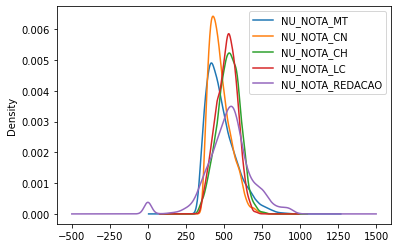

In [ ]:
std[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].plot.kde()

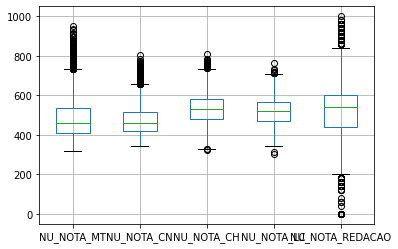

In [ ]:
std[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].boxplot()

In [ ]:
# std[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].plot.scatter()

Como podemos perceber não há pontos isolados das distribução em nenhuma das notas, portanto, podemos considerar que não há outliers nesses dados. Mesmo os 0s da redação (a única nota que pode ser zerada) estão próximos a distribuição.

#Explorando dados

####WHAT WE WILL DO?

*   POPULATION ANALYSIS
*   WE WILL ANALYSE WHICH GENDER IS PERFORMED BETTER
*   CAN WE PRESUME STUDENT'S PERFORMANCE BASED ON HIS/HER STATE, AGE, SEX, CIVIL STATE, RACE OR ETHNICITY, NATIONALITY, HIGH SCHOOL CONCLUSION STATUS, HIGH SCHOOL CONCLUSION YEAR AND TYPE OF SCHOOL?
*   DOES PARENT'S EDUCATION BACKGROUND MATTERS?
*   DOES NUMBERS OF RESIDENTS, MENSAL INCOME, INTERNET ACCESS, MAKE DIFFERENCE IN STUDENT'S PERFORMANCE?
*   HOW AFFECTS THE PERFORMANCE IF STUDENT HAS ALREADY WORKED? AND IF HE/SHE HAS WORKED EARLIER? AND HOW MANY HOURS WEEKLY?


# POPULATION ANALYSIS

In [ ]:
std.describe()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000
mean,20.524001,474.467524,530.731984,517.234294,483.413728,530.434425
std,6.298282,70.304594,73.171123,67.363292,98.996337,153.684300
min,13.000000,344.800000,324.400000,306.000000,320.500000,0.000000
25%,17.000000,420.300000,481.100000,468.900000,409.200000,440.000000
50%,18.000000,460.700000,532.950000,521.400000,461.500000,540.000000
75%,21.000000,515.475000,582.500000,565.200000,538.500000,600.000000
max,66.000000,806.400000,807.000000,763.600000,952.000000,1000.000000


Como explicado em sala de aula, quando a média e mediana são valores próximos isso indica um bom sinal nos dados.

In [ ]:
# Quantidade de alunos na amostra que fizeram todas as provas = 9958 alunos
std.shape

(9958, 34)

#### População por Estado

É possivel observar no gráfico quais estados possuem uma amostra maior da população total em estudo.

In [ ]:
std.SG_UF_RESIDENCIA.value_counts(normalize=True)*100

SP    15.133561
CE    13.607150
MG     9.991966
BA     6.597710
RJ     5.372565
PA     4.589275
PE     4.589275
MA     4.549106
PR     4.478811
GO     3.775859
RS     3.695521
PB     2.480418
PI     2.309701
ES     2.088773
SC     2.078731
MT     1.867845
RN     1.837718
AM     1.667001
AL     1.656959
DF     1.596706
SE     1.496284
TO     1.295441
MS     1.285399
RO     0.793332
AP     0.492067
AC     0.461940
RR     0.210886
Name: SG_UF_RESIDENCIA, dtype: float64

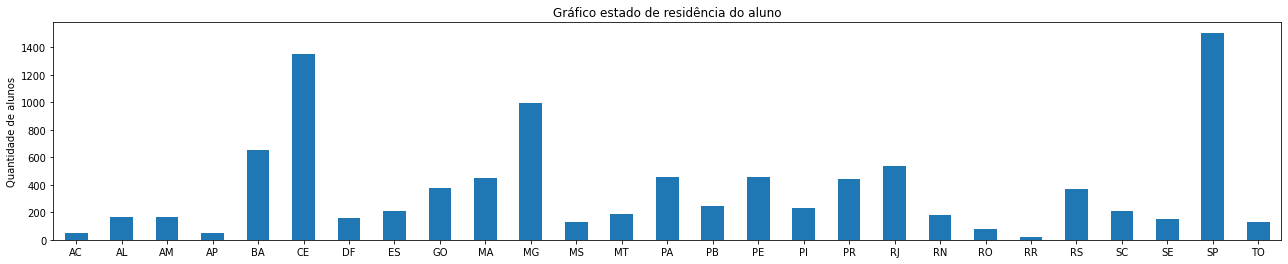

In [ ]:
# Gráfico Aluno por estado:

df = std.groupby('SG_UF_RESIDENCIA').size()
df.plot(kind='bar', subplots=True, figsize=(22, 4), logy=False)
plt.title("Gráfico estado de residência do aluno")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(rotation=0)
plt.show()

#### População por Idade


A maioria dos estudantes que fizeram o enem 2016 possuem entre 16-22 anos.

In [ ]:
std.NU_IDADE.value_counts(normalize=True)*100

17    23.317935
18    18.939546
19    11.136774
16     8.806989
20     7.370958
21     4.830287
22     3.564973
23     3.012653
15     2.269532
24     2.209279
25     1.847761
26     1.275356
27     1.265314
28     0.933922
29     0.903796
32     0.712995
30     0.682868
31     0.672826
35     0.612573
34     0.542278
33     0.532235
37     0.482025
38     0.371561
40     0.371561
39     0.341434
36     0.341434
41     0.261097
45     0.241012
44     0.220928
42     0.200844
47     0.190801
14     0.190801
43     0.180759
48     0.180759
46     0.160675
52     0.130548
50     0.120506
51     0.110464
49     0.080337
53     0.070295
54     0.070295
57     0.040169
56     0.030127
66     0.030127
55     0.030127
65     0.020084
58     0.020084
61     0.020084
63     0.010042
64     0.010042
13     0.010042
62     0.010042
59     0.010042
Name: NU_IDADE, dtype: float64

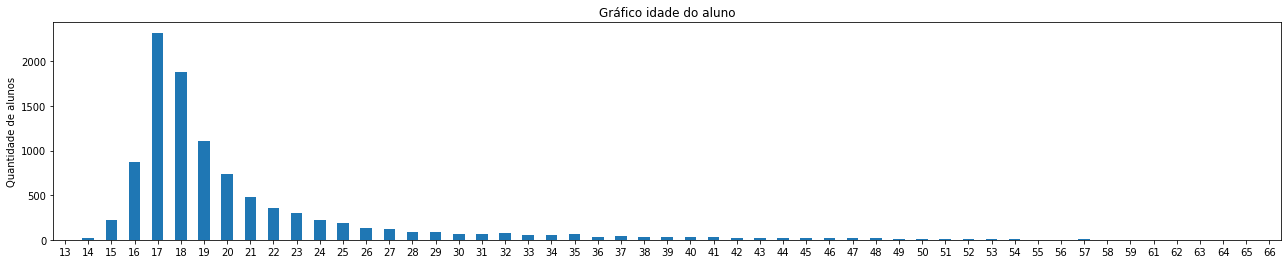

In [ ]:
# Gráfico Aluno por Idade:

df = std.groupby('NU_IDADE').size()
df.plot(kind='bar', subplots=True, figsize=(22, 4), logy=False)
plt.title("Gráfico idade do aluno")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(rotation=0)
plt.show()

#### População por sexo

O Número de mulheres que fizeram a prova do enem em 2016 foi maior que o número de homens.

In [ ]:
std.TP_SEXO.value_counts(normalize=True)*100

F    61.839727
M    38.160273
Name: TP_SEXO, dtype: float64

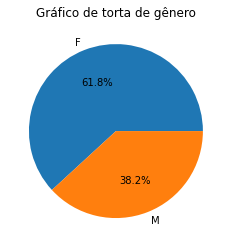

In [ ]:
# Gráfico percentual de gênero:
df = std.groupby('TP_SEXO').size()
df.plot(kind='pie', subplots=True, figsize=(8, 4), autopct='%1.1f%%')
plt.title("Gráfico de torta de gênero")
plt.ylabel("")
plt.show()

#### População por estado civil

A Maioria dos estudantes que fizeram o Enem 2016 eram solteiros.

In [ ]:
#[0, 1, -1, 2, 3] = ['Solteiro', 'Casado', 'Não informado', 'Divorciado', 'Viúvo']
std.TP_ESTADO_CIVIL.value_counts(normalize=True)*100

0.0     89.947781
1.0      6.206065
-1.0     3.042780
2.0      0.733079
3.0      0.070295
Name: TP_ESTADO_CIVIL, dtype: float64

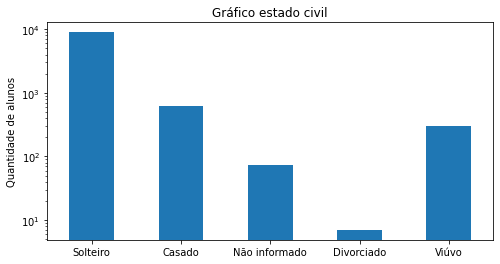

In [ ]:
# Gráfico de estado civil:

df = std.groupby('TP_ESTADO_CIVIL').size()
df.plot(kind='bar', subplots=True, figsize=(8, 4), logy=True)
plt.title("Gráfico estado civil")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 5), labels= ['Solteiro', 'Casado', 'Não informado', 'Divorciado', 'Viúvo'], rotation=0)
plt.show()

#### População por raça

A maior raça autodeclarada no enem de 2016 foi a cor parda. A raça Indígena foi a menor raça a fazer a prova.

In [ ]:
#[3, 1, 2, 4, 0, 5] = ['Parda', 'Branca', 'Preta', 'Amarela', 'Não declarado', 'Indígena']
std.TP_COR_RACA.value_counts(normalize=True)*100

3    48.433420
1    34.213698
2    12.783692
4     2.259490
0     1.667001
5     0.642699
Name: TP_COR_RACA, dtype: float64

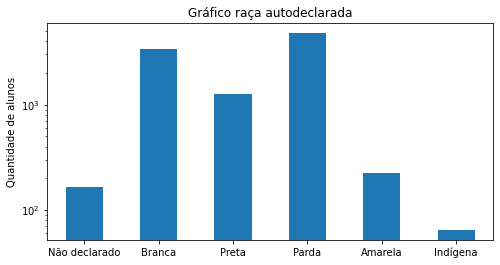

In [ ]:
# Gráfico de Raça:
df = std.groupby('TP_COR_RACA').size()
df.plot(kind='bar', subplots=True, figsize=(8, 4), logy=True)
plt.title("Gráfico raça autodeclarada")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 6), labels= ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'], rotation=0)
plt.show()


#### População por Nacionalidade

Como era de se esperar, a grande maioria das pessoas que fizeram o enem 2016 eram brasileiros.

In [ ]:
#[0, 1, 2, 3, 4] = ['Não informado', 'Brasileiro(a)', 'Brasileiro(a) Naturalizado(a)', 'Estrangeiro(a)', 'Brasileiro(a) Nato(a), nascido(a) no exterior']
std.TP_NACIONALIDADE.value_counts(normalize=True)*100

1    95.922876
2     3.605142
4     0.311307
0     0.100422
3     0.060253
Name: TP_NACIONALIDADE, dtype: float64

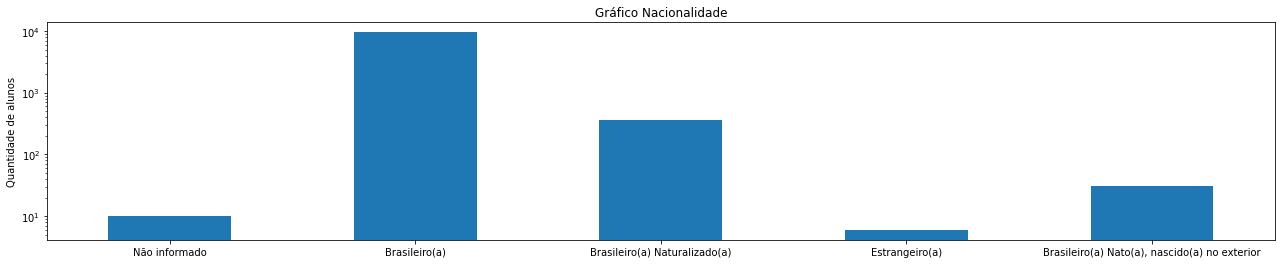

In [ ]:
# Gráfico da Nacionalidade:
df = std.groupby('TP_NACIONALIDADE').size()
df.plot(kind='bar', subplots=True, figsize=(22, 4), logy=True)
plt.title("Gráfico Nacionalidade")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 5), labels= ['Não informado', 'Brasileiro(a)', 'Brasileiro(a) Naturalizado(a)', 'Estrangeiro(a)', 'Brasileiro(a) Nato(a), nascido(a) no exterior'], rotation=0)
plt.show()

#### População por Situação de conclusão do Ensino Médio

A maioria dos estudantes que fizeram o enem 2016 já concluiram o ensino médio ou irão concluir em 2016. Esses são os estudantes que estão elegiveis a disputar uma vaga nas universidades, visto que os outros estudantes não possuem o ensino médio concluido. 

In [ ]:
#[1, 2, 3, 4] = ['Já concluí o Ensino Médio', 'Estou cursando e concluirei o Ensino Médio em 2016', 'Estou cursando e concluirei o Ensino Médio após 2016', 'Não concluí e não estou cursando o Ensino Médio']
std.TP_ST_CONCLUSAO.value_counts(normalize=True)*100

1    42.799759
2    36.061458
3    18.447479
4     2.691303
Name: TP_ST_CONCLUSAO, dtype: float64

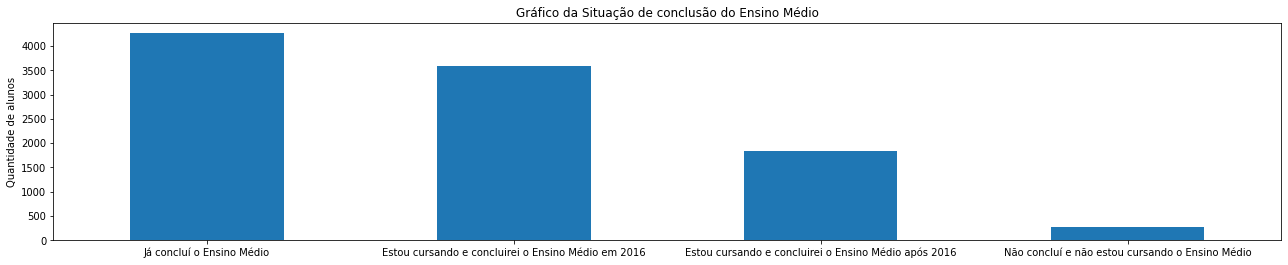

In [ ]:
# Gráfico Situação de conclusão do Ensino Médio:
df = std.groupby('TP_ST_CONCLUSAO').size()
df.plot(kind='bar', subplots=True, figsize=(22, 4), logy=False)
plt.title("Gráfico da Situação de conclusão do Ensino Médio")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 4), labels= ['Já concluí o Ensino Médio', 'Estou cursando e concluirei o Ensino Médio em 2016', 'Estou cursando e concluirei o Ensino Médio após 2016', 'Não concluí e não estou cursando o Ensino Médio'], rotation=0)
plt.show()

#### População por Ano de Conclusão do Ensino Médio

Pode-se observar no gráfico que quanto mais antigo é o ano de conclusão do ensino médio do aluno, menor a probabilidade dele estar participando no enem 2016

In [ ]:
#[0, 1, 2, 3, 4, 5 , 6, 7, 8, 9, 10] = ['Não informado', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', 'Anterior a 2007']
std.TP_ANO_CONCLUIU.value_counts(normalize=True)*100

0     57.200241
1     12.361920
2      7.682266
10     5.965053
3      4.920667
4      3.514762
5      2.259490
6      2.098815
7      1.697128
8      1.245230
9      1.054429
Name: TP_ANO_CONCLUIU, dtype: float64

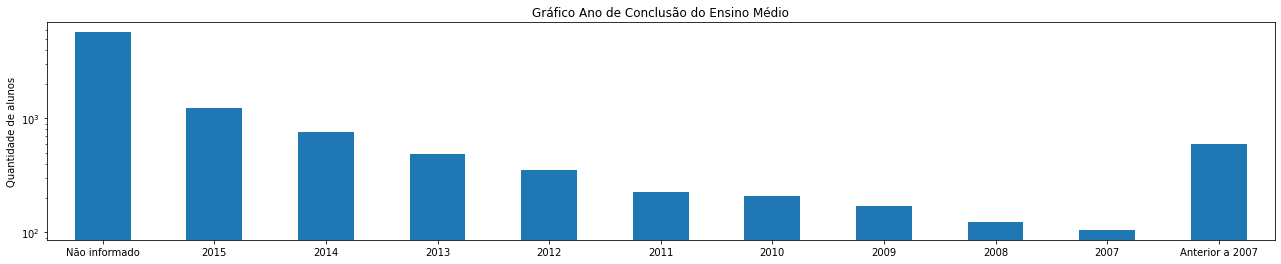

In [ ]:
# Gráfico Ano de Conclusão do Ensino Médio:
df = std.groupby('TP_ANO_CONCLUIU').size()
df.plot(kind='bar', subplots=True, figsize=(22, 4), logy=True)
plt.title("Gráfico Ano de Conclusão do Ensino Médio")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 11), labels= ['Não informado', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', 'Anterior a 2007'], rotation=0)
plt.show()

#### População por tipo de escola

A grande maioria da população não respondeu a pergunta. Aqueles que responderam são, na sua grande maioria, provenientes de escolas públicas.

In [ ]:
#[1, 2, 3, 4] = ['Não Respondeu', 'Pública', 'Privada', 'Exterior']
std.TP_ESCOLA.value_counts(normalize=True)*100

1    63.938542
2    30.618598
3     5.432818
4     0.010042
Name: TP_ESCOLA, dtype: float64

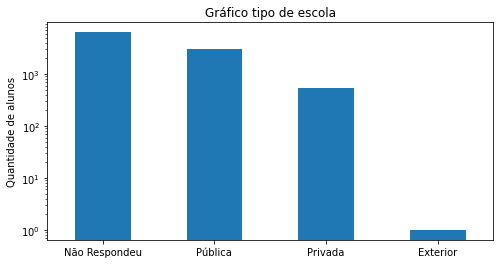

In [ ]:
# Gráfico Tipo de escola do Ensino Médio:
df = std.groupby('TP_ESCOLA').size()
df.plot(kind='bar', subplots=True, figsize=(8, 4), logy=True)
plt.title("Gráfico tipo de escola")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 4), labels= ['Não Respondeu', 'Pública', 'Privada', 'Exterior'], rotation=0)
plt.show()

#### População que indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos


A maioria dos alunos que fizeram o enem 2016 não fizeram apenas para treinar seus conhecimentos.

In [ ]:
#[0, 1] = ['Não', 'Sim']
std.IN_TREINEIRO.value_counts(normalize=True)*100

0    84.966861
1    15.033139
Name: IN_TREINEIRO, dtype: float64

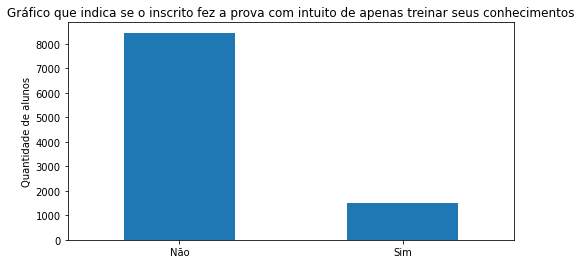

In [ ]:
# Gráfico Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos:
df = std.groupby('IN_TREINEIRO').size()
df.plot(kind='bar', subplots=True, figsize=(8, 4), logy=False)
plt.title("Gráfico que indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 2), labels= ['Não', 'Sim'], rotation=0)
plt.show()

#### População por Tipo de lingua estrangeira escolhida (inglês ou espanhol)


Aproximadamente 58% dos alunos no enem 2016 escolheram a prova de espanhol enquanto que 42% escolheram inglês.

In [ ]:
#[0, 1] = ['Inglês', 'Espanhol']
std.TP_LINGUA.value_counts(normalize=True)*100

1    57.913236
0    42.086764
Name: TP_LINGUA, dtype: float64

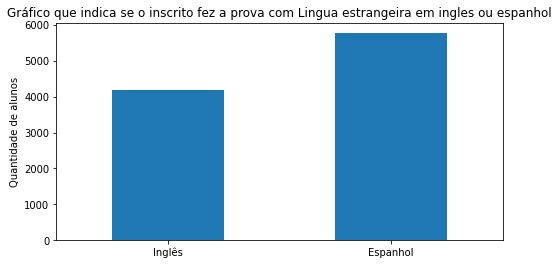

In [ ]:
# Gráfico Indica Tipo de lingua estrangeira escolhida (inglês ou espanhol):
df = std.groupby('TP_LINGUA').size()
df.plot(kind='bar', subplots=True, figsize=(8, 4), logy=False)
plt.title("Gráfico que indica se o inscrito fez a prova com Lingua estrangeira em ingles ou espanhol")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 2), labels= ['Inglês', 'Espanhol'], rotation=0)
plt.show()

#### População de acordo com educação parternal



In [ ]:
#[A, B, C, D, E, F, G, H] = ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei']
std.Q001.value_counts(normalize=True)*100

E    23.870255
B    22.635067
C    15.675839
D    12.612974
H    10.353485
F     6.015264
A     5.944969
G     2.892147
Name: Q001, dtype: float64

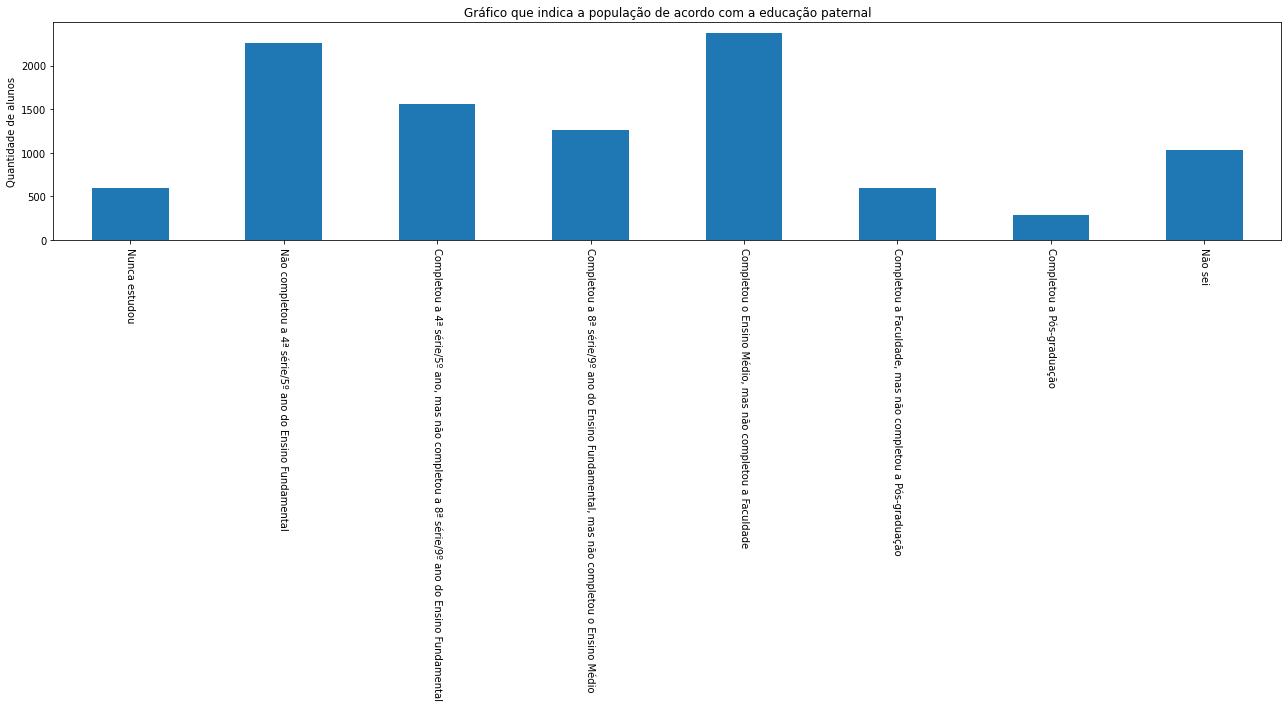

In [ ]:
# Gráfico mostra a população de acordo com educação parternal
df = std.groupby('Q001').size()
df.plot(kind='bar', subplots=True, figsize=(22, 4), logy=False)
plt.title("Gráfico que indica a população de acordo com a educação paternal")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 8), labels= ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei'], rotation=-90)
plt.show()

#### População de acordo com educação Maternal


In [ ]:
#[A, B, C, D, E, F, G, H] = ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei']
std.Q002.value_counts(normalize=True)*100

E    29.734887
B    17.493473
C    15.324362
D    14.892549
F     8.224543
G     5.543282
H     5.061257
A     3.725648
Name: Q002, dtype: float64

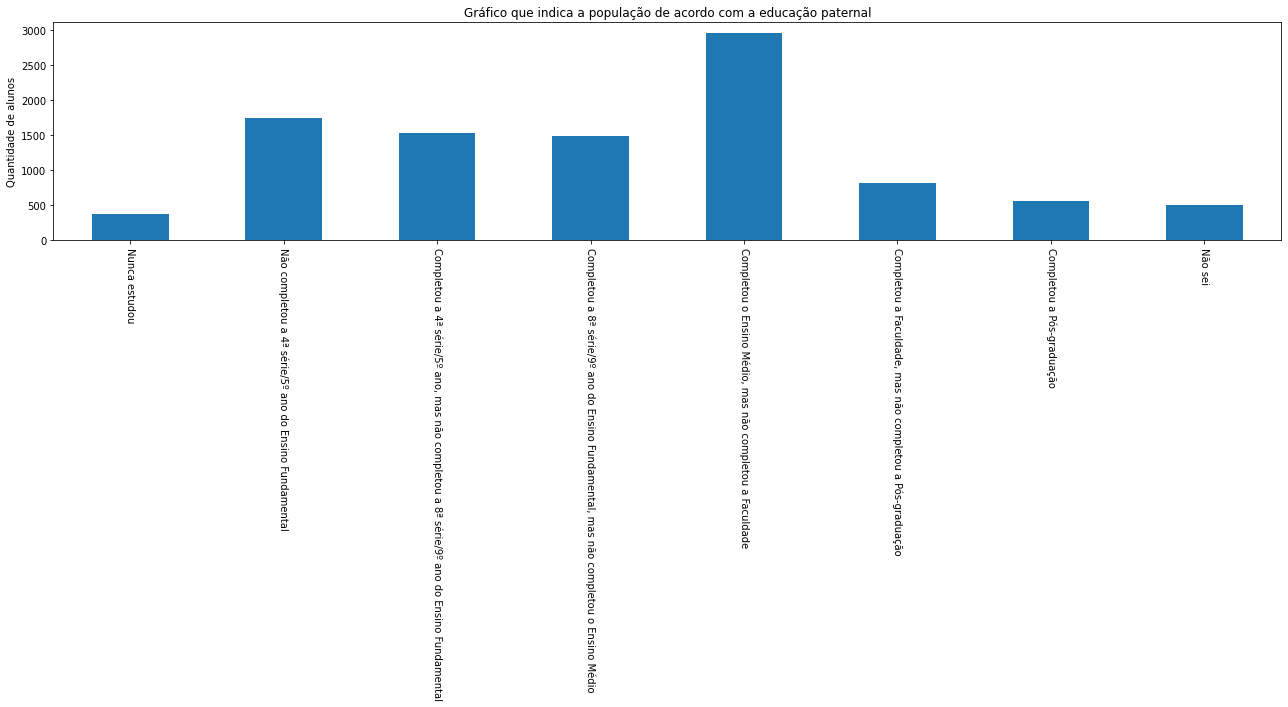

In [ ]:
# Gráfico mostra a população de acordo com educação Maternal
df = std.groupby('Q002').size()
df.plot(kind='bar', subplots=True, figsize=(22, 4), logy=False)
plt.title("Gráfico que indica a população de acordo com a educação paternal")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 8), labels= ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei'], rotation=-90)
plt.show()

#### População de acordo com a quantidade de pessoas que moram na residência

A maioria dos estudandes que fizeram o enem em 2016 residem em um local que habitam 2-6 pessoas.

In [ ]:
#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] = ['1, pois moro sozinho', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
std.Q005.value_counts(normalize=True)*100

4     32.446274
3     23.327978
5     19.120305
2      9.580237
6      8.134163
7      3.062864
1      1.506327
8      1.446074
9      0.642699
10     0.361518
11     0.150633
12     0.040169
13     0.040169
18     0.030127
14     0.030127
17     0.030127
20     0.030127
15     0.020084
16     0.000000
Name: Q005, dtype: float64

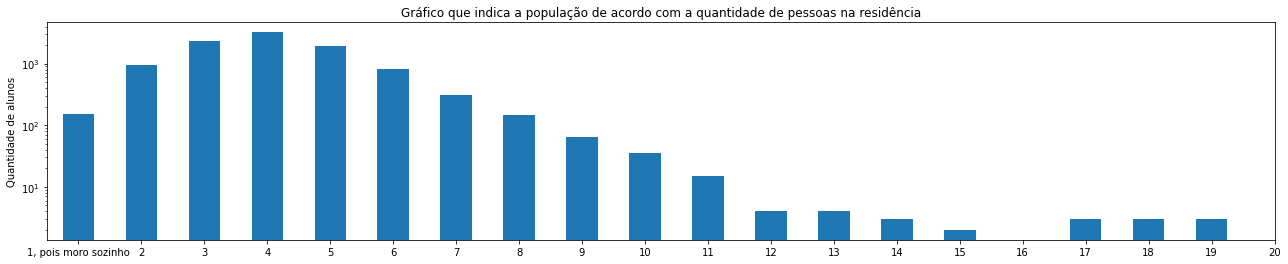

In [ ]:
# Gráfico de acordo com o numero de pessoas que moram com o aluno
df = std.groupby('Q005').size()
df.plot(kind='bar', subplots=True, figsize=(22, 4), logy=True)
plt.title("Gráfico que indica a população de acordo com a quantidade de pessoas na residência")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 20), labels= ['1, pois moro sozinho', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'], rotation=0)
plt.show()

####População de acordo com a renda mensal familiar

A grande maioria dos estutantes possuem uma renda familia menor que 1,5 salário minimo (R$1100 - salário mínimo em 2021).

In [ ]:
#[A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q] = ['Nenhuma renda', 'Até R$ 880,00', 'De R$ 880,01 até R$ 1.320,00', 'De R$ 1.320,01 até R$ 1.760,00', 'De R$ 1.760,01 até R$ 2.200,00', 'De R$ 2.200,01 até R$ 2.640,00', 'De R$ 2.640,01 até R$ 3.520,00', 'De R$ 3.520,01 até R$ 4.400,00', 'De R$ 4.400,01 até R$ 5.280,00', 'De R$ 5.280,01 até R$ 6.160,00', 'De R$ 6.160,01 até R$ 7.040,00', 'De R$ 7.040,01 até R$ 7.920,00', 'De R$ 7.920,01 até R$ 8.800,00', 'De R$ 8.800,01 até R$ 10.560,00', 'De R$ 10.560,01 até R$ 13.200,00', 'De R$ 13.200,01 até R$ 17.600,00', 'Mais de R$ 17.600,00']
std.Q006.value_counts(normalize=True)*100

B    31.110665
C    25.155654
D    11.427998
E     7.622012
F     4.960836
G     4.910625
H     3.585057
A     3.283792
I     2.189195
J     1.415947
N     0.853585
K     0.793332
P     0.622615
L     0.552320
O     0.532235
Q     0.532235
M     0.451898
Name: Q006, dtype: float64

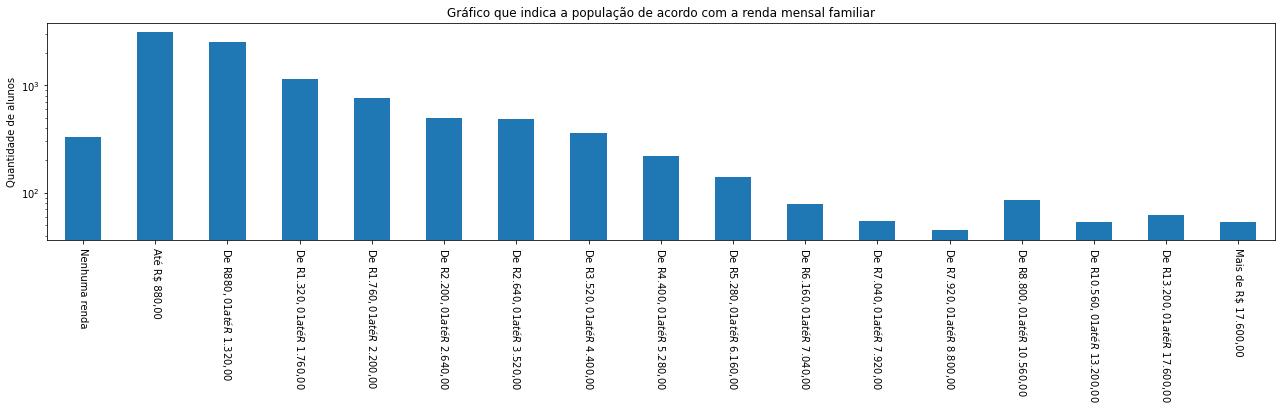

In [ ]:
# Gráfico de acordo com a renda mensal familiar
df = std.groupby('Q006').size()
df.plot(kind='bar', subplots=True, figsize=(22, 4), logy=True)
plt.title("Gráfico que indica a população de acordo com a renda mensal familiar")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 17), labels= ['Nenhuma renda', 'Até R$ 880,00', 'De R$ 880,01 até R$ 1.320,00', 'De R$ 1.320,01 até R$ 1.760,00', 'De R$ 1.760,01 até R$ 2.200,00', 'De R$ 2.200,01 até R$ 2.640,00', 'De R$ 2.640,01 até R$ 3.520,00', 'De R$ 3.520,01 até R$ 4.400,00', 'De R$ 4.400,01 até R$ 5.280,00', 'De R$ 5.280,01 até R$ 6.160,00', 'De R$ 6.160,01 até R$ 7.040,00', 'De R$ 7.040,01 até R$ 7.920,00', 'De R$ 7.920,01 até R$ 8.800,00', 'De R$ 8.800,01 até R$ 10.560,00', 'De R$ 10.560,01 até R$ 13.200,00', 'De R$ 13.200,01 até R$ 17.600,00', 'Mais de R$ 17.600,00'], rotation=-90)
plt.show()

####População de acordo com o acesso à Internet

Aproximadamente 58% dos alunos que fizeram o enem 2016 possuem acesso à internet enquanto que 42% responderam que não.

In [ ]:
#[A, B] = ['Não', 'Sim']
std.Q025.value_counts(normalize=True)*100

B    58.224543
A    41.775457
Name: Q025, dtype: float64

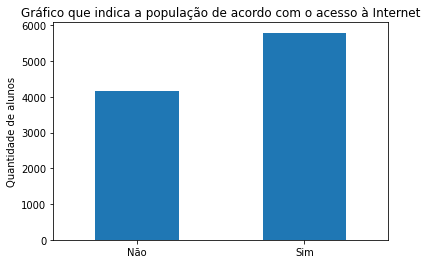

In [ ]:
# Gráfico de acordo com o acesso à Internet
df = std.groupby('Q025').size()
df.plot(kind='bar', subplots=True, figsize=(6, 4), logy=False)
plt.title("Gráfico que indica a população de acordo com o acesso à Internet")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 2), labels= ['Não', 'Sim'], rotation=0)
plt.show()

####População de acordo com atividade remunerada do aluno (se o aluno nunca trabalhou, se já trabalhou ou trabalha)

In [ ]:
#[A, B, C] = ['Não, nunca trabalhei', 'Sim, já trabalhei, mas não estou trabalhando', 'Sim, estou trabalhando']
std.Q026.value_counts(normalize=True)*100

A    60.072304
B    21.349669
C    18.578028
Name: Q026, dtype: float64

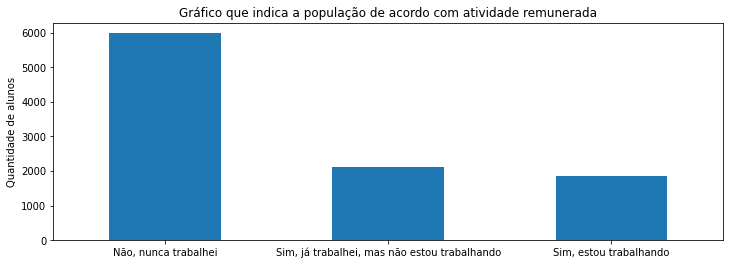

In [ ]:
# Gráfico de acordo com a atividade remunerada do aluno
df = std.groupby('Q026').size()
df.plot(kind='bar', subplots=True, figsize=(12, 4), logy=False)
plt.title("Gráfico que indica a população de acordo com atividade remunerada")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 3), labels= ['Não, nunca trabalhei', 'Sim, já trabalhei, mas não estou trabalhando', 'Sim, estou trabalhando'], rotation=0)
plt.show()

####População de acordo com a idade que começou a exercer uma atividade remunerada


In [ ]:
#[A, B, C, D, E, F, G, H, I, J, K, L, M, Z] = ['Menos de 14 anos', '14 anos', '15 anos', '16 anos', '17 anos', '18 anos', '19 anos', '20 anos', '21 anos', '22 anos', '23 anos', '24 anos', '25 anos ou mais', 'Nunca trabalhei']
std.Q027.value_counts(normalize=True)*100

Z    60.072304
D     8.465555
F     7.732476
C     4.950793
E     4.669612
B     4.267925
A     2.711388
G     2.631050
H     1.656959
I     0.903796
M     0.743121
J     0.562362
K     0.421771
L     0.210886
Name: Q027, dtype: float64

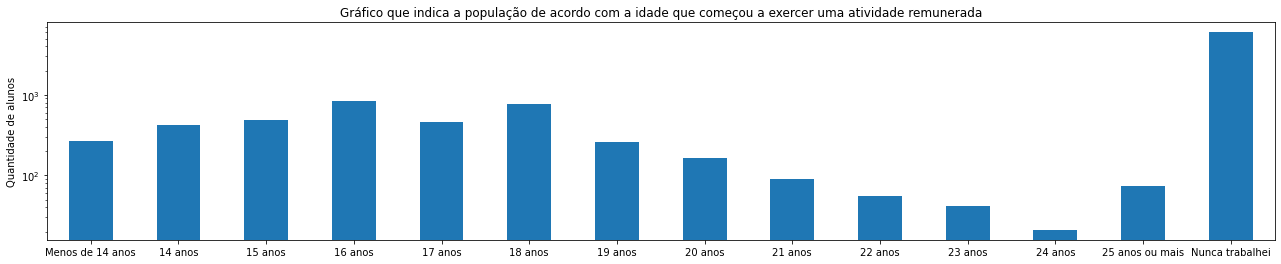

In [ ]:
# Gráfico de acordo com a idade que começou a exercer uma atividade remunerada
df = std.groupby('Q027').size()
df.plot(kind='bar', subplots=True, figsize=(22, 4), logy=True)
plt.title("Gráfico que indica a população de acordo com a idade que começou a exercer uma atividade remunerada")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 14), labels= ['Menos de 14 anos', '14 anos', '15 anos', '16 anos', '17 anos', '18 anos', '19 anos', '20 anos', '21 anos', '22 anos', '23 anos', '24 anos', '25 anos ou mais', 'Nunca trabalhei'], rotation=0)
plt.show()

####População de acordo com a quantidade de horas semanais trabalhada

Dos alunos que fizeram o enem 2016 e responderam que trabalharam ou trabalham possuem/possuiram em sua maioria pelo menos 6 horas ao dia de segunda a sexta em sua jornada de trabalho.

In [ ]:
#[A, B, C, D, E, F] = ['Até 10 horas semanais', 'De 11 a 20 horas semanais', 'De 21 a 30 horas semanais', 'De 31 a 40 horas semanais', 'Mais de 40 horas semanais', 'Nunca Trabalhei']
std.Q028.value_counts(normalize=True)*100

F    60.072304
E    12.371962
D     9.449689
B     6.527415
A     6.406909
C     5.171721
Name: Q028, dtype: float64

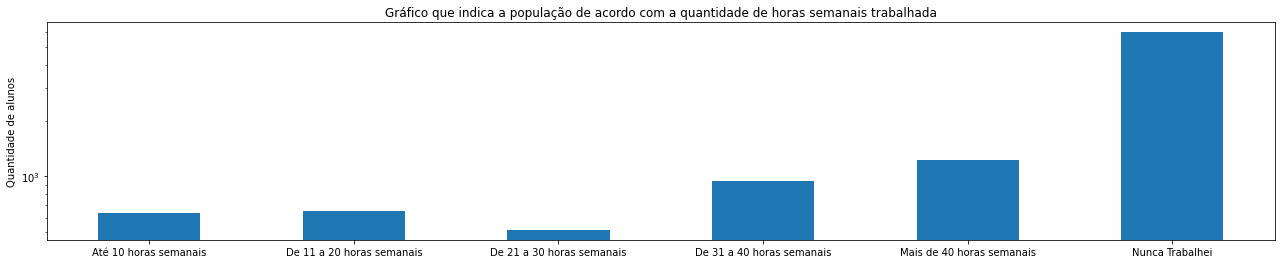

In [ ]:
# Gráfico de acordo com a quantidade de horas semanais trabalhada
df = std.groupby('Q028').size()
df.plot(kind='bar', subplots=True, figsize=(22, 4), logy=True)
plt.title("Gráfico que indica a população de acordo com a quantidade de horas semanais trabalhada")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 6), labels= ['Até 10 horas semanais', 'De 11 a 20 horas semanais', 'De 21 a 30 horas semanais', 'De 31 a 40 horas semanais', 'Mais de 40 horas semanais', 'Nunca Trabalhei'], rotation=0)
plt.show()

####População de acordo com o status de conclusão do ensino médio

A maioria dos estudantes que fizeram o enem 2016 já concluiram o ensino médio ou irão concluir em 2016. Esses são os estudantes que estão elegiveis a disputar uma vaga nas universidades, visto que os outros estudantes não possuem o ensino médio concluido.

In [ ]:
#[A, B, C, D] = ['Já concluí o Ensino Médio', 'Estou cursando e concluirei o Ensino Médio em 2016', 'Estou cursando e concluirei o Ensino Médio após 2016', 'Não concluí e não estou cursando o Ensino Médio']
std.Q046.value_counts(normalize=True)*100

A    43.352079
B    35.519181
C    18.166298
D     2.962442
Name: Q046, dtype: float64

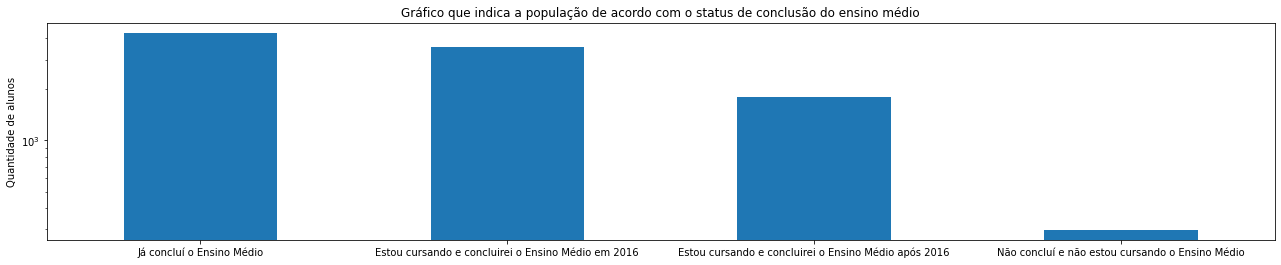

In [ ]:
# Gráfico de acordo com o status de conclusão do ensino médio
df = std.groupby('Q046').size()
df.plot(kind='bar', subplots=True, figsize=(22, 4), logy=True)
plt.title("Gráfico que indica a população de acordo com o status de conclusão do ensino médio")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 4), labels= ['Já concluí o Ensino Médio', 'Estou cursando e concluirei o Ensino Médio em 2016', 'Estou cursando e concluirei o Ensino Médio após 2016', 'Não concluí e não estou cursando o Ensino Médio'], rotation=0)
plt.show()

####População de acordo com o tipo de escola frequentada no ensino médio

In [ ]:
#[A, B, C, D] = ['Somente em escola pública', 'Parte em escola pública e parte em escola privada sem bolsa de estudo integral', 'Parte em escola pública e parte em escola privada com bolsa de estudo integral', 'Somente em escola privada sem bolsa de estudo integral', 'Somente em escola privada com bolsa de estudo integral']
std.Q047.value_counts(normalize=True)*100

A    83.259691
D    10.323358
E     2.721430
B     2.470376
C     1.225146
Name: Q047, dtype: float64

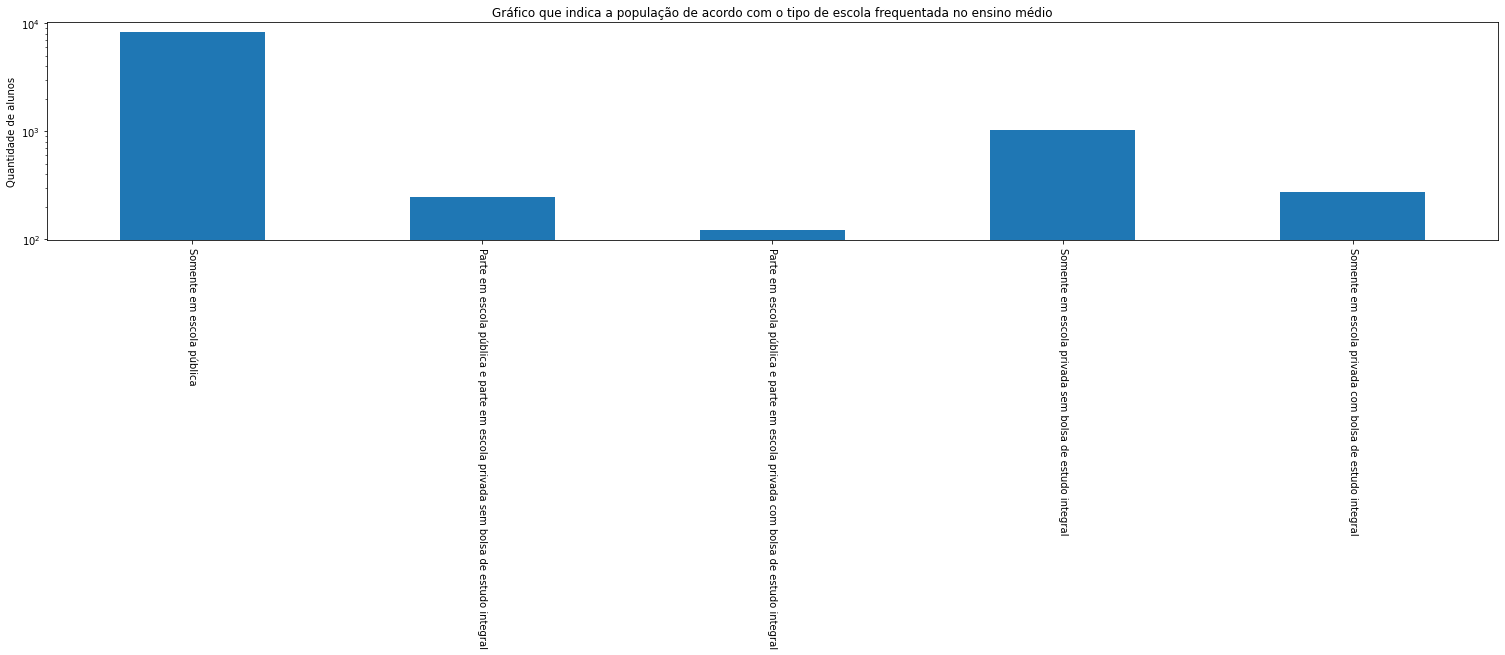

In [ ]:
# Gráfico de acordo com o tipo de escola frequentada no ensino médio
df = std.groupby('Q047').size()
df.plot(kind='bar', subplots=True, figsize=(26, 4), logy=True)
plt.title("Gráfico que indica a população de acordo com o tipo de escola frequentada no ensino médio")
plt.xlabel("")
plt.ylabel("Quantidade de alunos")
plt.xticks(ticks=np.arange(0, 5), labels= ['Somente em escola pública', 'Parte em escola pública e parte em escola privada sem bolsa de estudo integral', 'Parte em escola pública e parte em escola privada com bolsa de estudo integral', 'Somente em escola privada sem bolsa de estudo integral', 'Somente em escola privada com bolsa de estudo integral'], rotation=-90)
plt.show()

#Estatísticas Univariada

####Médias dos alunos por disciplina no enem de acordo com o estado:

Através dos gráficos é possível observar os estados que possuem as maiores e menores médias nas notas dos alunos por disciplina.

In [ ]:
std.groupby(['SG_UF_RESIDENCIA'])['NU_NOTA_MT'].mean().sort_values(ascending=True)

SG_UF_RESIDENCIA
AP    443.253061
MA    457.296247
PI    457.692174
AM    460.287349
AL    460.439394
AC    461.334783
CE    463.013653
TO    465.771318
RO    467.422785
PA    467.521225
BA    469.372755
PE    471.177462
MS    473.147656
PB    474.330364
GO    477.280319
SE    478.908054
ES    481.055288
MT    481.560215
RR    483.957143
PR    491.059417
RN    493.668852
SC    494.943478
RS    497.199185
SP    505.335435
MG    507.832663
RJ    510.309346
DF    511.791824
Name: NU_NOTA_MT, dtype: float64

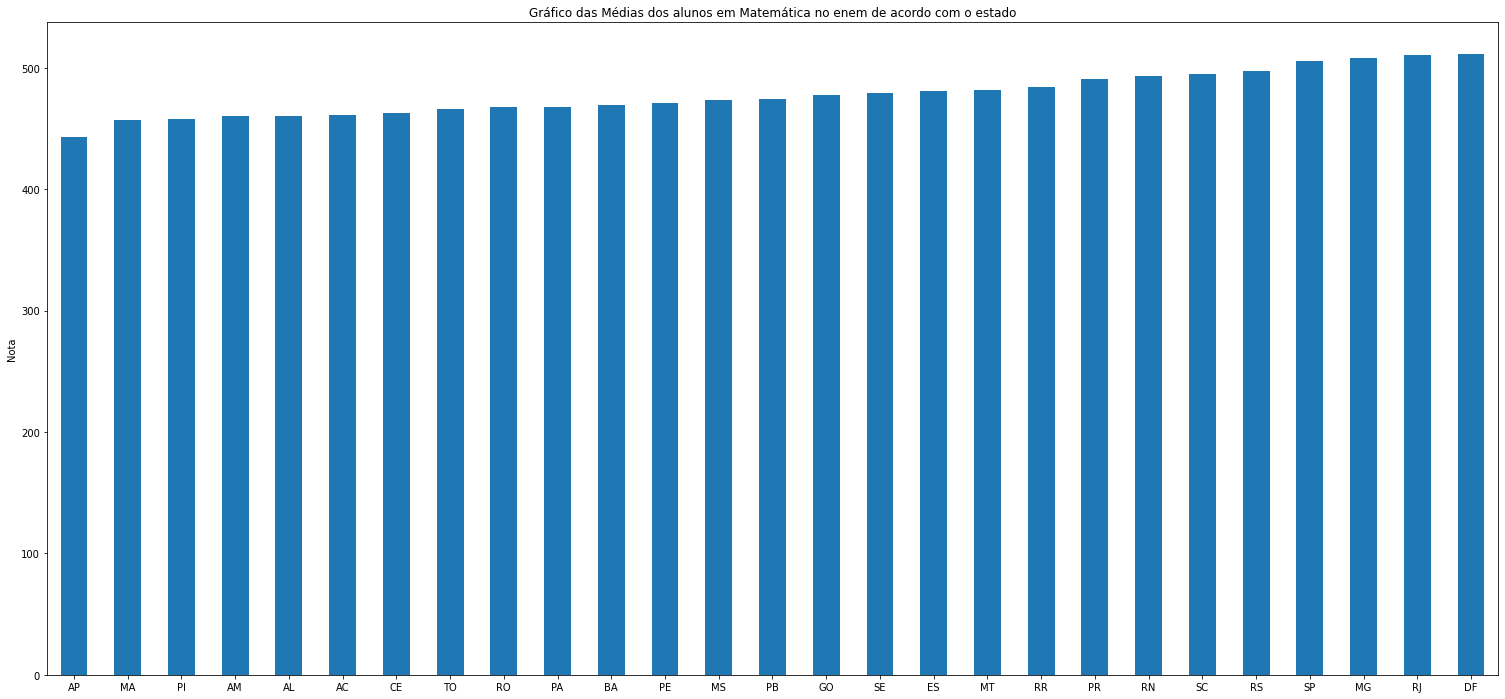

In [ ]:
# Gráfico das Médias dos alunos em Matemática no enem de acordo com o estado:
df = std.groupby(['SG_UF_RESIDENCIA'])['NU_NOTA_MT'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Matemática no enem de acordo com o estado")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(rotation=0)
plt.show()

In [ ]:
std.groupby(['SG_UF_RESIDENCIA'])['NU_NOTA_CN'].mean().sort_values(ascending=True)

SG_UF_RESIDENCIA
AC    448.121739
AM    451.004819
AP    454.991837
MA    457.054746
TO    460.629457
CE    461.381181
PI    461.950000
MS    462.934375
RO    463.478481
BA    464.465601
MT    466.411828
AL    467.319394
PA    468.485558
PB    470.794332
PE    471.426696
GO    472.969415
PR    474.791031
RR    476.747619
RN    477.582514
SE    478.193289
RS    479.067391
SC    479.548309
ES    481.452404
SP    487.080491
MG    490.083116
DF    493.711950
RJ    493.930654
Name: NU_NOTA_CN, dtype: float64

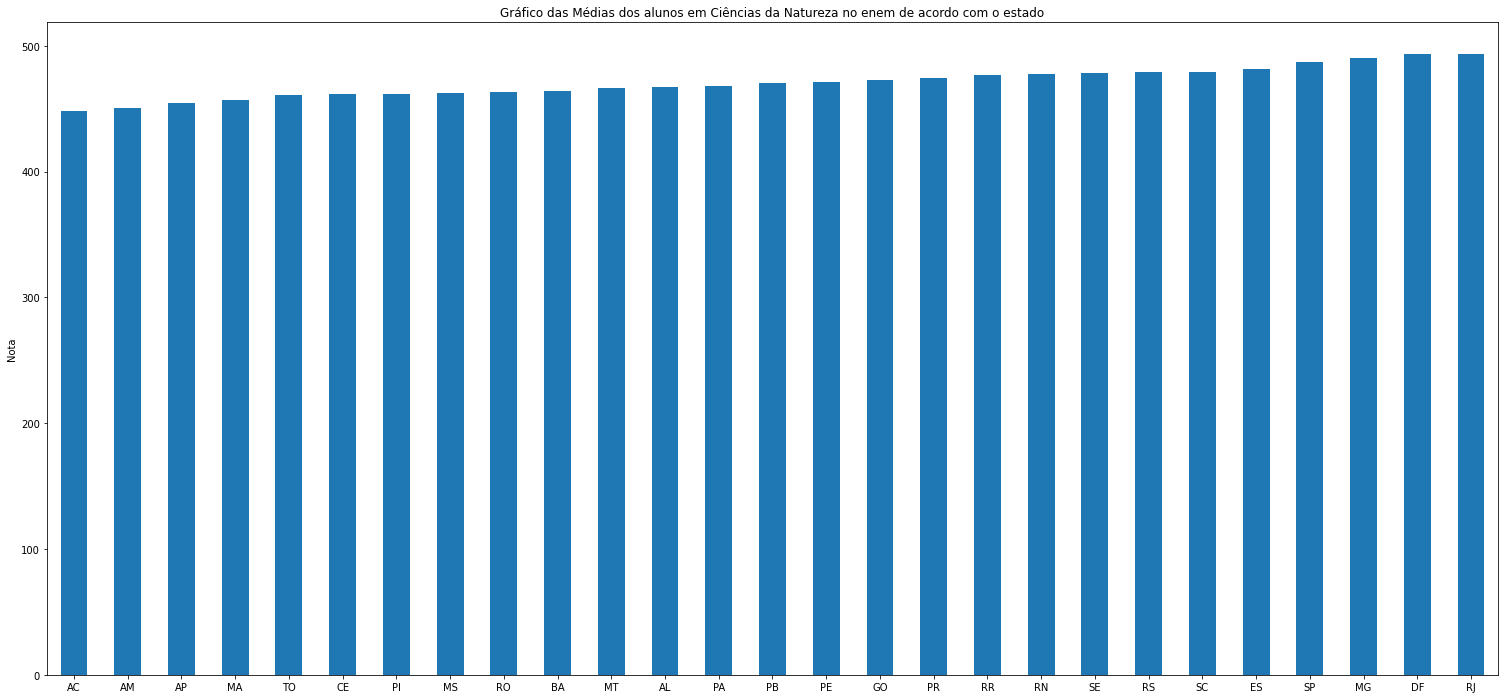

In [ ]:
# Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com o estado:
df = std.groupby(['SG_UF_RESIDENCIA'])['NU_NOTA_CN'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com o estado")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(rotation=0)
plt.show()

In [ ]:
std.groupby(['SG_UF_RESIDENCIA'])['NU_NOTA_CH'].mean().sort_values(ascending=True)

SG_UF_RESIDENCIA
AM    501.317470
PI    505.177826
AC    505.863043
CE    509.883616
AP    512.404082
MA    512.747461
AL    517.439394
BA    518.124962
TO    518.363566
SE    519.748322
RO    520.978481
PB    521.887045
MS    524.308594
PA    524.685558
RN    525.045902
MT    525.749462
PE    529.859300
RR    529.957143
GO    530.172872
PR    533.810090
ES    539.220673
RS    541.688859
MG    545.670251
SC    546.384058
DF    548.778616
SP    551.262177
RJ    554.951963
Name: NU_NOTA_CH, dtype: float64

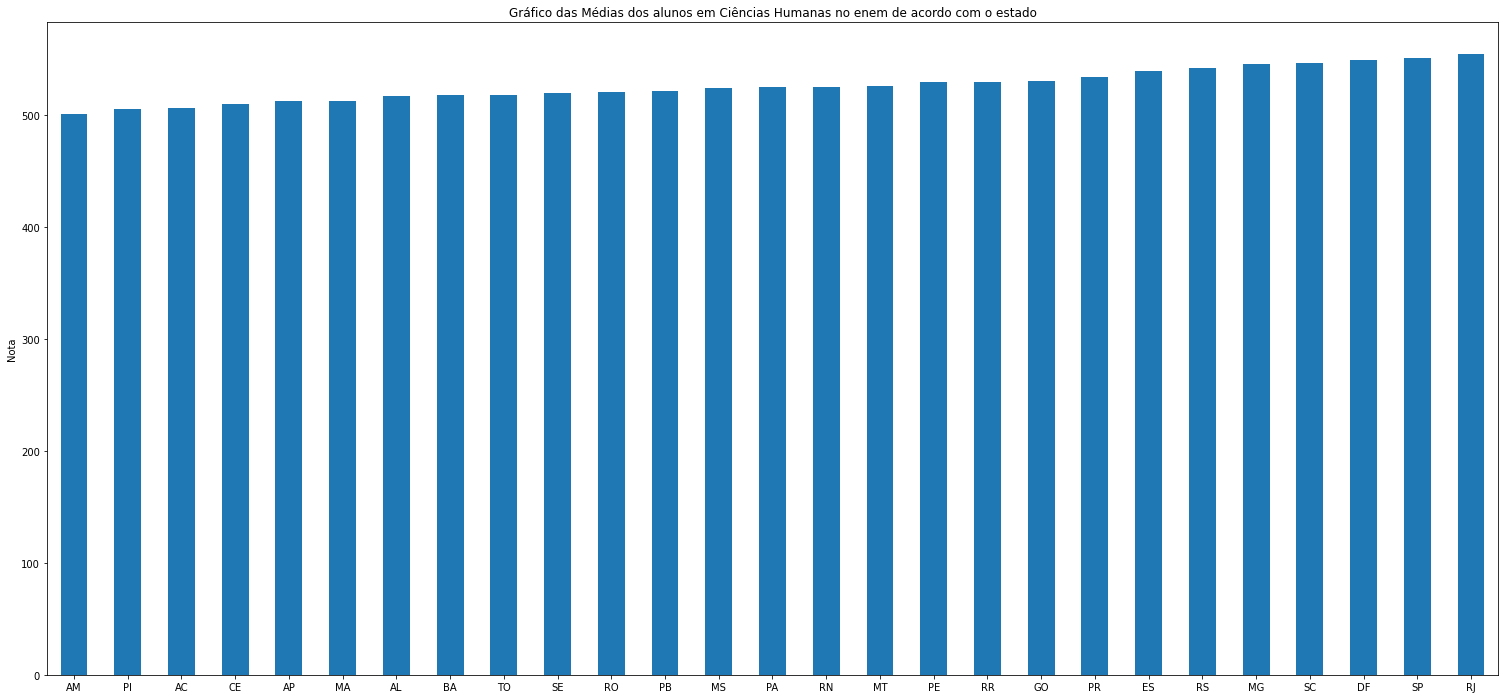

In [ ]:
# Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com o estado:
df = std.groupby(['SG_UF_RESIDENCIA'])['NU_NOTA_CH'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com o estado")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(rotation=0)
plt.show()

In [ ]:
std.groupby(['SG_UF_RESIDENCIA'])['NU_NOTA_LC'].mean().sort_values(ascending=True)

SG_UF_RESIDENCIA
AP    491.524490
PI    491.639130
AM    494.593976
MA    496.971744
AC    497.928261
CE    498.783173
AL    503.246061
PB    503.655466
BA    503.955099
SE    505.231544
TO    505.562016
RO    506.060759
PA    507.828228
MS    509.553125
MT    511.088710
RR    513.380952
PE    514.749891
GO    515.507979
PR    518.588117
ES    519.712019
RN    522.831694
SC    525.548792
MG    531.478794
RS    532.119565
DF    533.625786
RJ    537.837570
SP    540.911878
Name: NU_NOTA_LC, dtype: float64

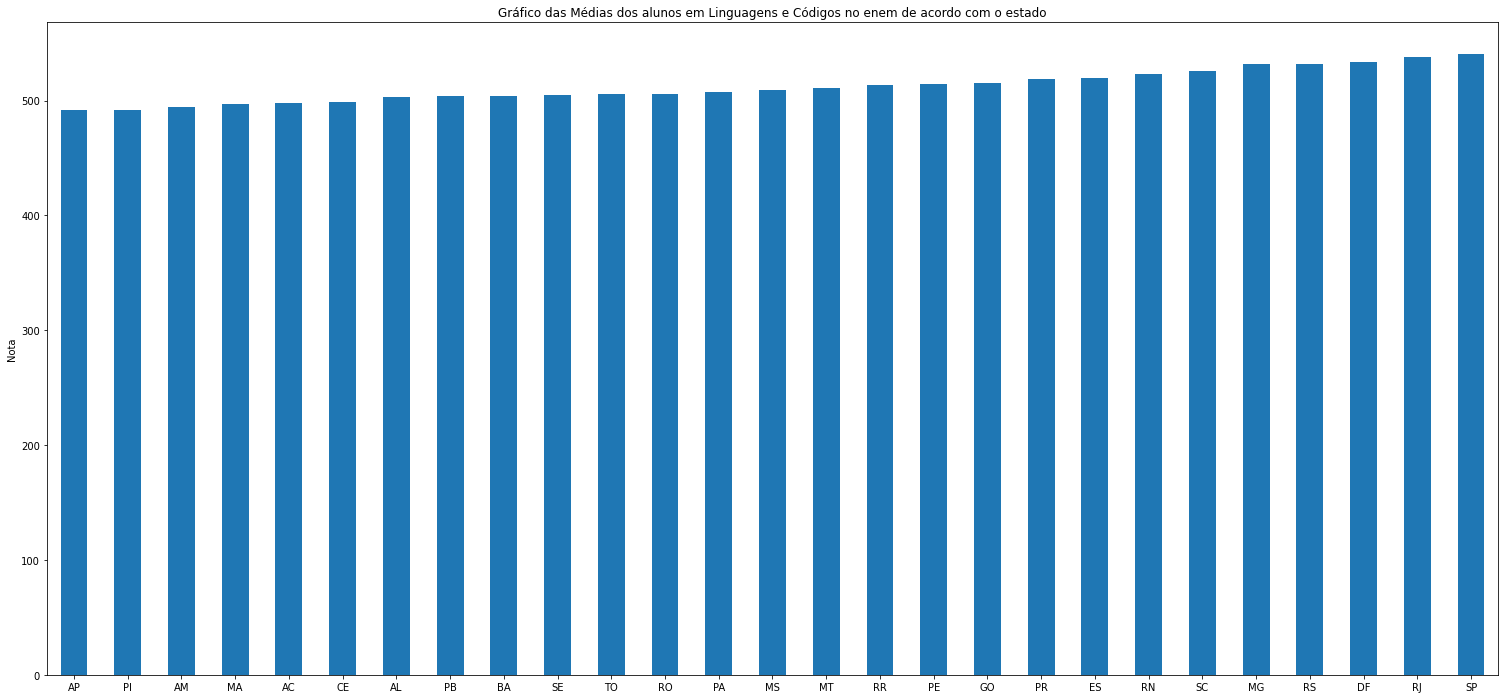

In [ ]:
# Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com o estado:
df = std.groupby(['SG_UF_RESIDENCIA'])['NU_NOTA_LC'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com o estado")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(rotation=0)
plt.show()

In [ ]:
std.groupby(['SG_UF_RESIDENCIA'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)

SG_UF_RESIDENCIA
RR    480.952381
AP    492.244898
RO    492.911392
CE    494.597786
AC    497.391304
PI    498.608696
MS    501.250000
TO    505.426357
AM    508.192771
MA    508.432671
BA    517.473364
MT    519.032258
PR    523.542601
GO    525.691489
PA    528.533917
PE    529.890591
AL    531.757576
RS    532.135870
PB    532.145749
ES    546.942308
SC    546.956522
SE    547.651007
RN    550.601093
SP    551.685468
DF    554.754717
MG    559.457286
RJ    570.355140
Name: NU_NOTA_REDACAO, dtype: float64

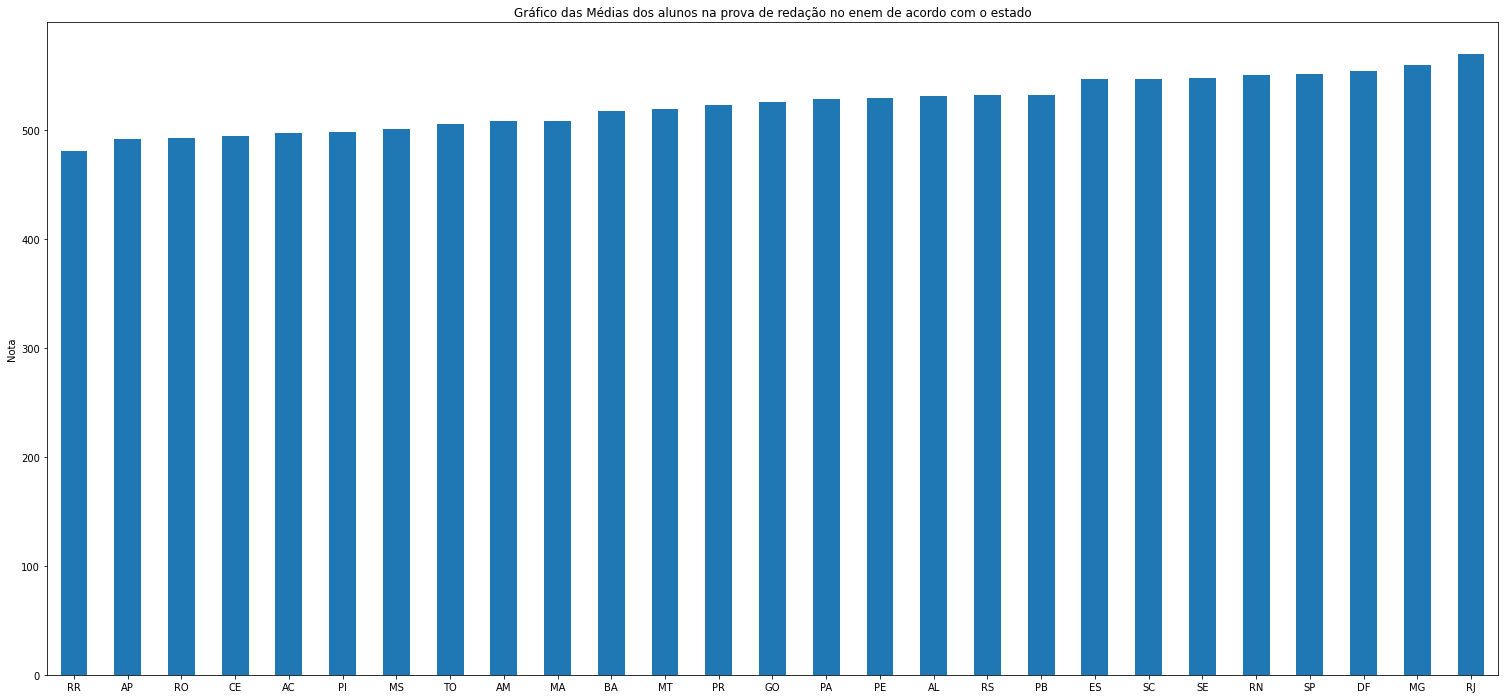

In [ ]:
# Gráfico das Médias dos alunos na prova de redação no enem de acordo com o estado:
df = std.groupby(['SG_UF_RESIDENCIA'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos na prova de redação no enem de acordo com o estado")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(rotation=0)
plt.show()

####Médias dos alunos por disciplina no enem de acordo com a idade:

A maior parte dos estudantes prestando o enem possuem a idade entre 16-22 anos (ver aba População por idade). Por isso, a população de alunos por idade nos gráficos apresentados nessa seção possuem tamanhos bem divergentes. Exemplo: apenas possuimos um aluno de 13 anos que fez o enem em 2016 sendo a média calculada para estudantes de 13 anos que fizeram o enem a sua nota final. Dessa forma, esses dados não foram úteis para extrair informações relevantes.

In [ ]:
std.groupby(['NU_IDADE'])['NU_NOTA_MT'].mean().sort_values(ascending=True)

NU_IDADE
63    368.600000
62    402.100000
61    402.400000
65    403.750000
64    411.800000
66    416.166667
47    421.194737
49    433.475000
52    433.884615
53    438.400000
50    440.208333
59    441.900000
41    444.746154
38    445.000000
43    448.316667
42    453.305000
36    453.591176
55    454.233333
37    454.850000
33    455.179245
40    457.778378
58    459.150000
34    464.116667
39    466.285294
31    468.722388
28    470.791398
44    472.781818
30    474.867647
23    475.588333
22    478.216056
54    478.357143
21    480.006653
24    481.136818
32    481.707042
20    481.989782
27    482.344444
16    482.605359
48    482.911111
46    483.631250
19    483.971055
35    485.340984
18    486.412619
45    487.087500
57    487.275000
15    488.798230
17    489.258656
29    489.532222
25    491.314674
26    493.705512
14    500.805263
56    506.400000
51    518.809091
13    598.400000
Name: NU_NOTA_MT, dtype: float64

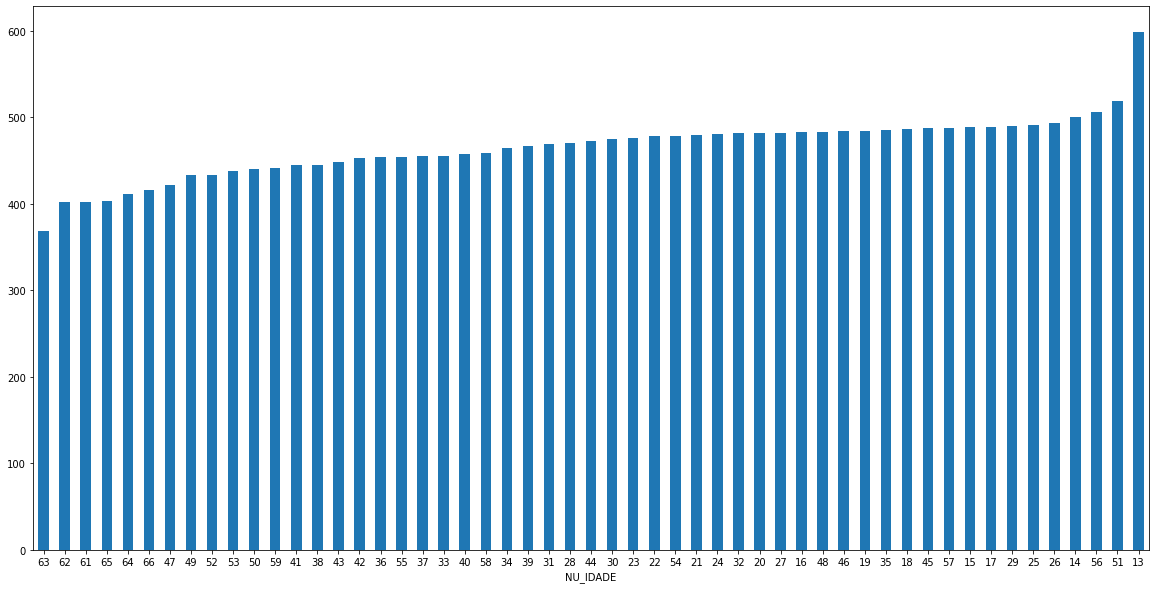

In [ ]:
std.groupby(['NU_IDADE'])['NU_NOTA_MT'].mean().sort_values(ascending=True).plot.bar(figsize=(20,10), rot=0)

In [ ]:
std.groupby(['NU_IDADE'])['NU_NOTA_CN'].mean().sort_values(ascending=True)

NU_IDADE
65    375.100000
56    420.433333
59    422.400000
43    436.944444
61    443.450000
49    443.687500
47    445.878947
55    448.200000
36    448.858824
50    449.291667
41    450.211538
63    450.900000
42    451.300000
40    454.002703
37    454.318750
52    454.992308
38    458.172973
34    459.690741
45    461.091667
66    461.333333
28    462.760215
39    463.223529
33    463.360377
64    463.400000
22    465.634930
51    465.690909
31    466.931343
15    467.230531
35    467.931148
23    469.281667
25    469.421739
26    471.910236
54    472.400000
24    472.829091
30    473.323529
16    474.190536
57    474.275000
21    474.831809
29    475.291111
20    475.699728
18    476.083086
32    476.118310
19    476.996123
27    478.899206
17    479.066581
48    479.105556
44    480.581818
46    483.806250
53    484.757143
14    495.615789
13    499.000000
58    514.350000
62    564.600000
Name: NU_NOTA_CN, dtype: float64

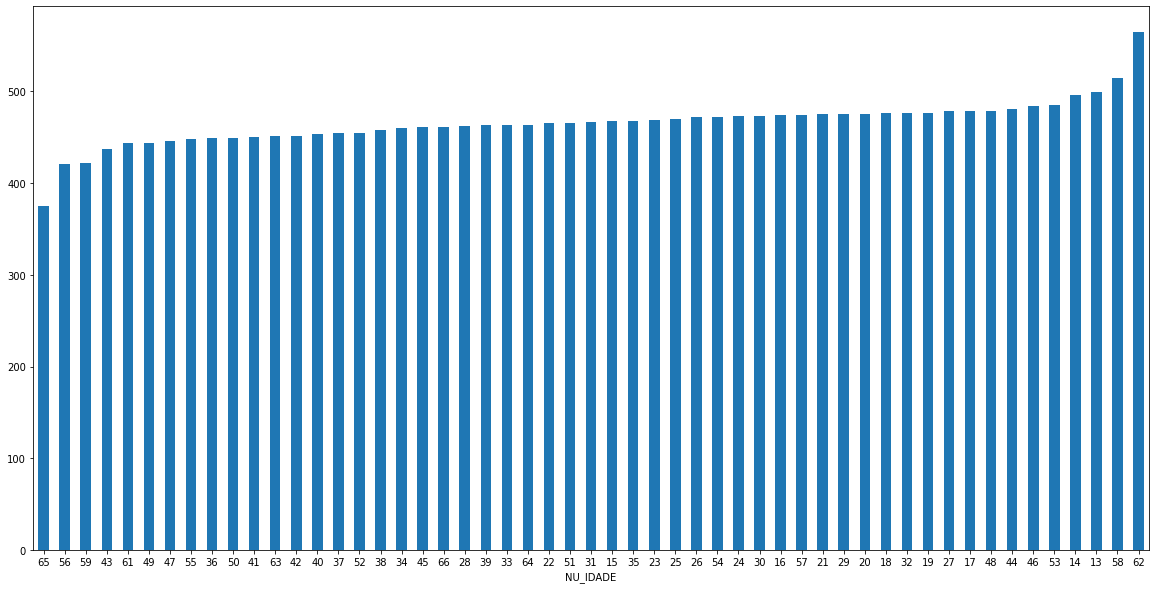

In [ ]:
std.groupby(['NU_IDADE'])['NU_NOTA_CN'].mean().sort_values(ascending=True).plot.bar(figsize=(20,10), rot=0)

In [ ]:
std.groupby(['NU_IDADE'])['NU_NOTA_CH'].mean().sort_values(ascending=True)

NU_IDADE
63    466.800000
59    495.200000
65    510.950000
38    511.656757
64    512.500000
36    513.911765
55    517.700000
40    518.537838
47    520.347368
45    520.654167
15    520.684513
43    520.861111
50    521.050000
13    521.900000
22    523.152394
28    523.962366
41    524.353846
23    525.038667
21    525.575260
33    526.473585
20    527.305177
16    528.082668
37    528.360417
39    529.297059
31    530.017910
66    530.133333
61    530.900000
18    530.946076
26    531.002362
19    531.384130
34    531.557407
24    532.051364
56    532.333333
32    532.759155
51    532.963636
30    533.860294
17    534.676227
54    535.314286
52    537.146154
42    537.240000
27    538.439683
25    539.229891
35    539.308197
29    541.787778
53    542.242857
58    544.500000
48    546.811111
44    551.190909
14    552.400000
49    562.775000
46    566.950000
57    619.025000
62    631.800000
Name: NU_NOTA_CH, dtype: float64

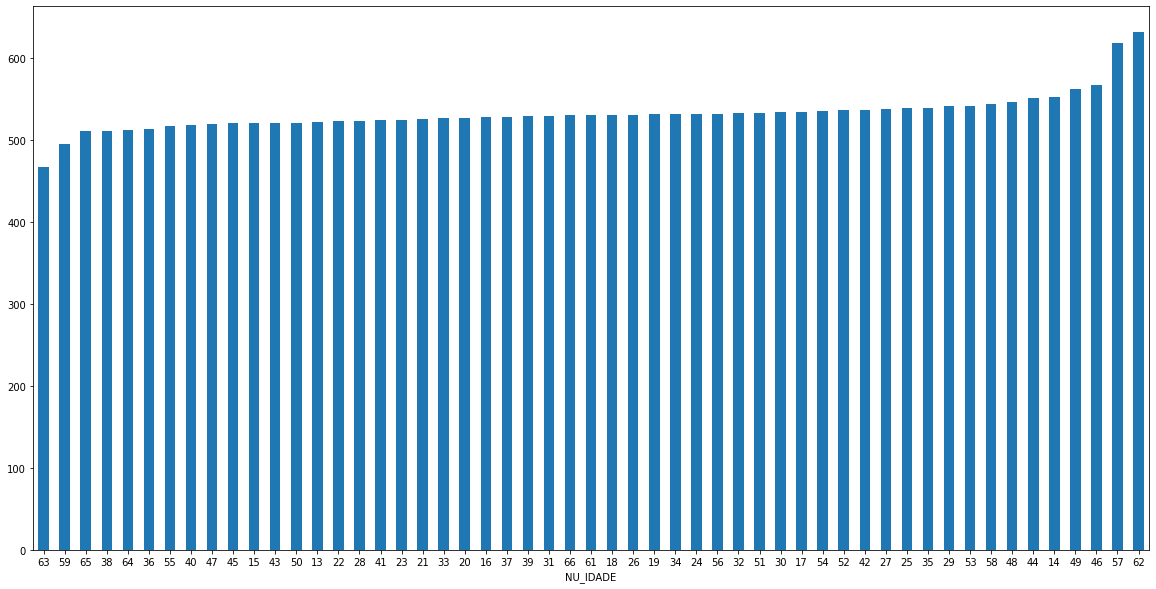

In [ ]:
std.groupby(['NU_IDADE'])['NU_NOTA_CH'].mean().sort_values(ascending=True).plot.bar(figsize=(20,10), rot=0)

In [ ]:
std.groupby(['NU_IDADE'])['NU_NOTA_LC'].mean().sort_values(ascending=True)

NU_IDADE
61    449.650000
63    450.600000
59    461.400000
56    478.266667
41    480.680769
64    480.800000
66    487.566667
50    493.600000
54    498.042857
47    498.242105
36    498.879412
38    501.681081
40    504.062162
32    504.263380
13    505.500000
45    507.666667
37    508.825000
21    510.231393
43    511.277778
39    511.500000
23    512.924333
42    513.040000
31    513.043284
33    513.064151
15    513.093363
22    513.588169
34    515.301852
26    515.426772
18    515.767550
28    516.511828
20    517.006540
19    518.234986
16    518.749259
27    518.939683
24    519.036364
30    519.758824
35    520.136066
25    520.934783
17    521.535314
14    523.142105
29    524.944444
51    526.281818
52    526.638462
49    527.300000
44    529.209091
58    530.900000
53    531.257143
48    534.283333
62    538.600000
46    541.481250
65    542.550000
57    549.375000
55    562.900000
Name: NU_NOTA_LC, dtype: float64

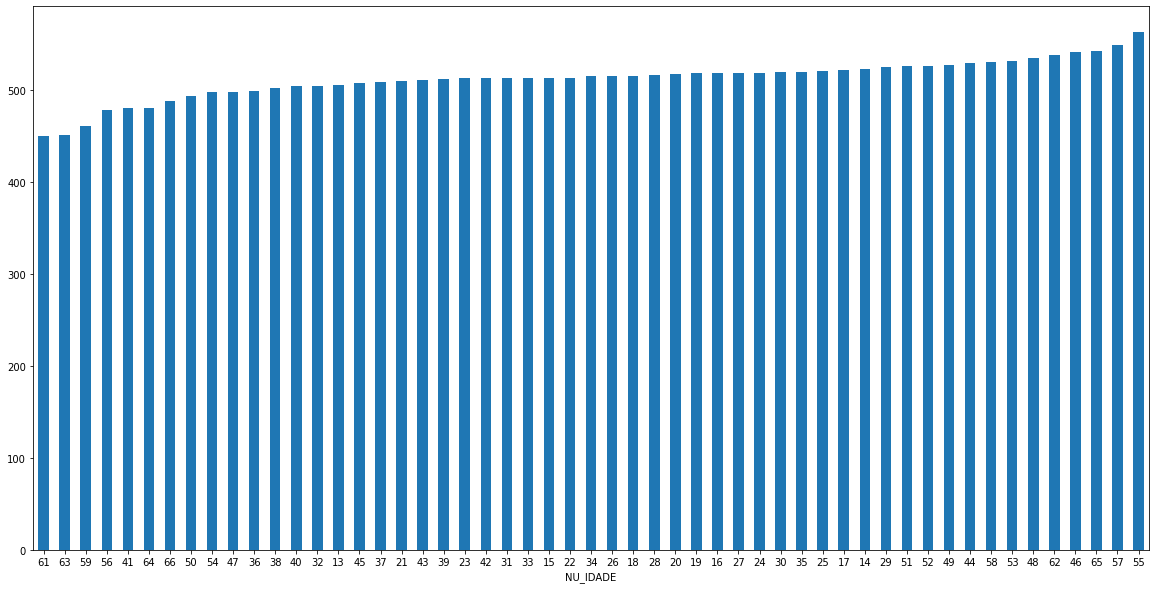

In [ ]:
std.groupby(['NU_IDADE'])['NU_NOTA_LC'].mean().sort_values(ascending=True).plot.bar(figsize=(20,10), rot=0)

In [ ]:
std.groupby(['NU_IDADE'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)


NU_IDADE
55    320.000000
66    333.333333
61    350.000000
53    371.428571
64    400.000000
54    425.714286
36    427.058824
42    435.000000
41    442.307692
39    451.764706
65    460.000000
45    461.666667
51    470.909091
43    471.444444
40    472.972973
47    478.947368
46    480.000000
52    480.000000
59    480.000000
63    480.000000
33    483.018868
26    484.094488
38    484.864865
37    485.833333
44    490.000000
49    490.000000
34    494.074074
28    494.408602
30    497.352941
31    498.208955
56    506.666667
29    508.000000
48    511.111111
22    512.140845
35    512.459016
32    512.676056
27    515.079365
24    516.181818
23    518.533333
57    520.000000
25    521.521739
21    522.091476
15    525.398230
50    530.000000
16    530.102623
20    534.550409
19    536.072137
18    538.165429
17    550.956072
58    560.000000
14    560.000000
13    620.000000
62    660.000000
Name: NU_NOTA_REDACAO, dtype: float64

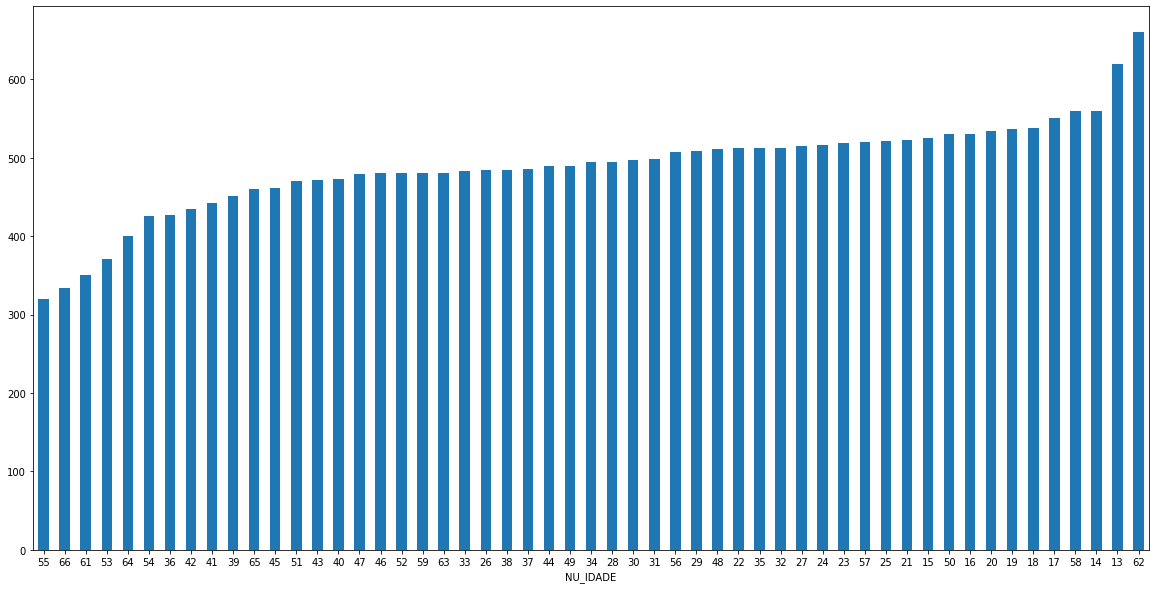

In [ ]:
std.groupby(['NU_IDADE'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True).plot.bar(figsize=(20,10), rot=0)

####Médias dos alunos por disciplina no enem de acordo com o sexo:

Em média, os alunos do sexo masculino atingiram notas maiores do que as alunas do sexo feminino exceto em redação.

In [ ]:
std.groupby(['TP_SEXO'])['NU_NOTA_MT'].mean().sort_values(ascending=True)



TP_SEXO
F    468.911156
M    506.915526
Name: NU_NOTA_MT, dtype: float64

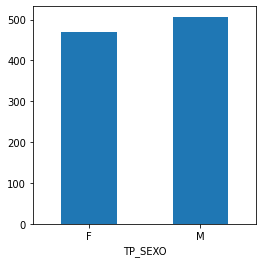

In [ ]:
std.groupby(['TP_SEXO'])['NU_NOTA_MT'].mean().sort_values(ascending=True).plot.bar(figsize=(4,4), rot=0)

In [ ]:
std.groupby(['TP_SEXO'])['NU_NOTA_CN'].mean().sort_values(ascending=True)

TP_SEXO
F    466.738422
M    486.992737
Name: NU_NOTA_CN, dtype: float64

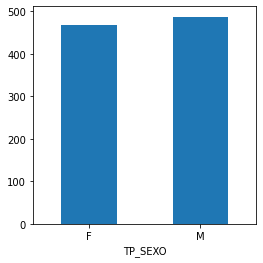

In [ ]:
std.groupby(['TP_SEXO'])['NU_NOTA_CN'].mean().sort_values(ascending=True).plot.bar(figsize=(4,4), rot=0)

In [ ]:
std.groupby(['TP_SEXO'])['NU_NOTA_CH'].mean().sort_values(ascending=True)

TP_SEXO
F    525.725398
M    538.845289
Name: NU_NOTA_CH, dtype: float64

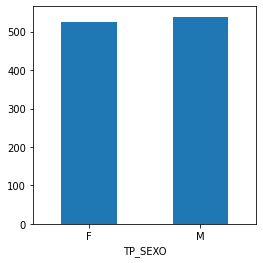

In [ ]:
std.groupby(['TP_SEXO'])['NU_NOTA_CH'].mean().sort_values(ascending=True).plot.bar(figsize=(4,4),rot=0)

In [ ]:
std.groupby(['TP_SEXO'])['NU_NOTA_LC'].mean().sort_values(ascending=True)

TP_SEXO
F    516.575528
M    518.301842
Name: NU_NOTA_LC, dtype: float64

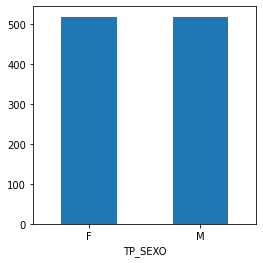

In [ ]:
std.groupby(['TP_SEXO'])['NU_NOTA_LC'].mean().sort_values(ascending=True).plot.bar(figsize=(4,4), rot=0)

In [ ]:
std.groupby(['TP_SEXO'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)

TP_SEXO
M    514.548947
F    540.237090
Name: NU_NOTA_REDACAO, dtype: float64

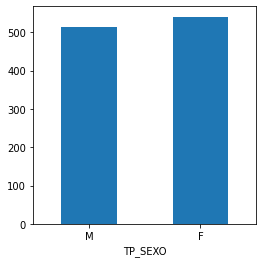

In [ ]:
std.groupby(['TP_SEXO'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True).plot.bar(figsize=(4,4), rot=0)

####Médias dos alunos por disciplina no enem de acordo com o estado civil:

Pelos gráficos é possivel observar que o estado civil não possui grande influencia na nota final do aluno.

In [ ]:
#[-1, 0, 1, 2, 3] = ['Não declarado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)']
std.groupby(['TP_ESTADO_CIVIL'])['NU_NOTA_MT'].mean().sort_values(ascending=True)

TP_ESTADO_CIVIL
1.0     469.465534
3.0     470.957143
2.0     473.306849
-1.0    479.785149
0.0     484.590957
Name: NU_NOTA_MT, dtype: float64

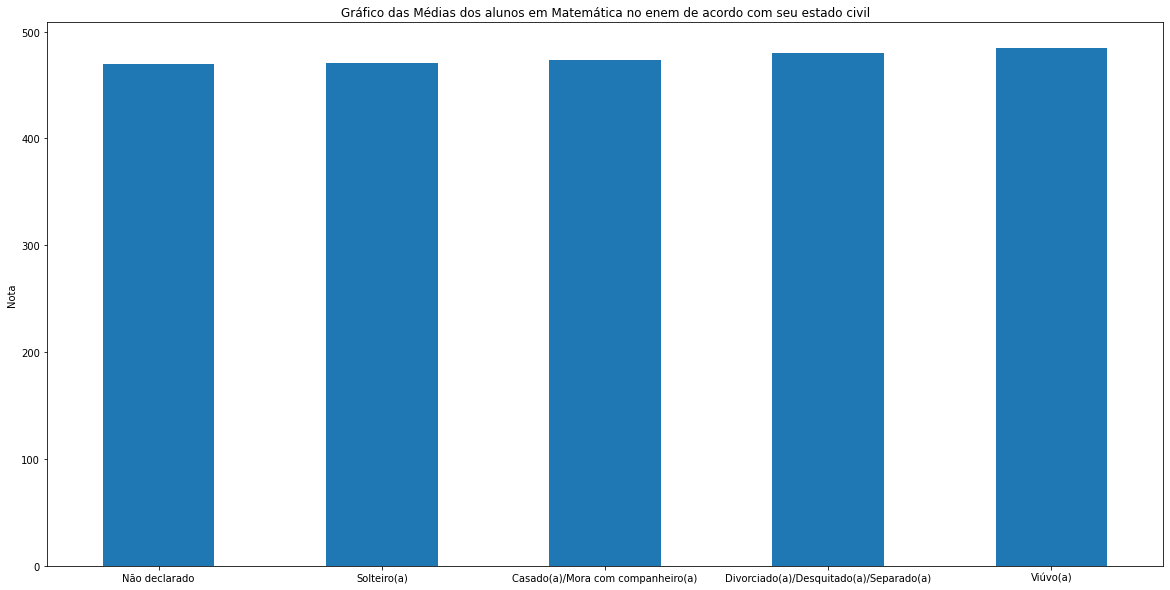

In [ ]:
# Gráfico das Médias dos alunos em Matemática no enem de acordo com seu estado civil:
df = std.groupby(['TP_ESTADO_CIVIL'])['NU_NOTA_MT'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(20, 10), logy=False)
plt.title("Gráfico das Médias dos alunos em Matemática no enem de acordo com seu estado civil")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 5), labels= ['Não declarado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)'], rotation=0)
plt.show()

In [ ]:
#[-1, 0, 1, 2, 3] = ['Não declarado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)']
std.groupby(['TP_ESTADO_CIVIL'])['NU_NOTA_CN'].mean().sort_values(ascending=True)

TP_ESTADO_CIVIL
3.0     444.542857
2.0     452.798630
1.0     463.849676
-1.0    472.652475
0.0     475.461505
Name: NU_NOTA_CN, dtype: float64

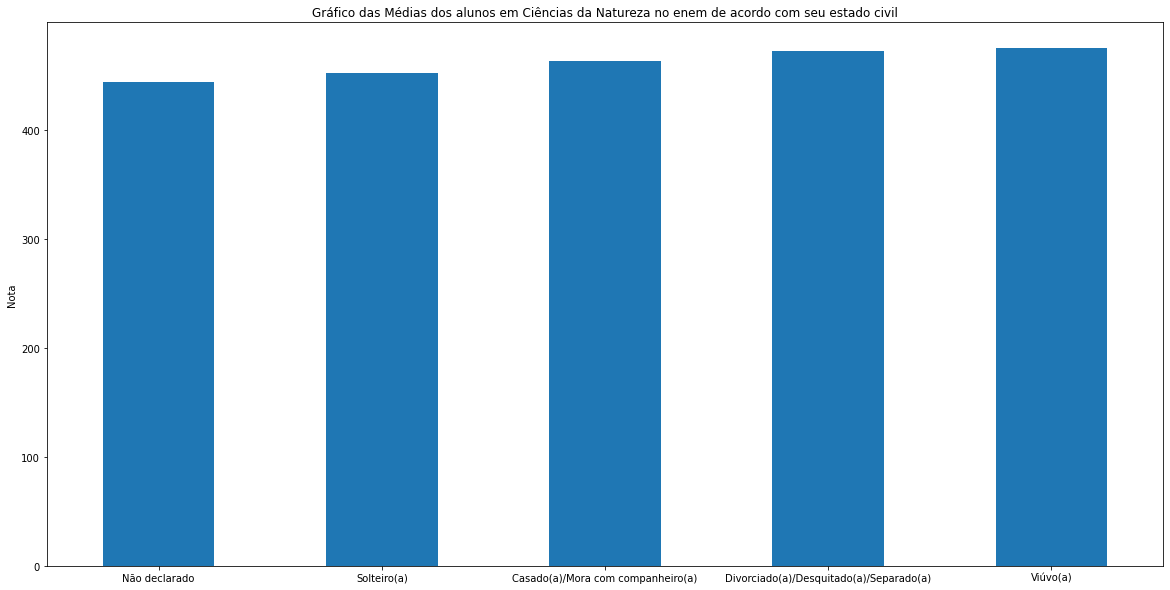

In [ ]:
# Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com seu estado civil:
df = std.groupby(['TP_ESTADO_CIVIL'])['NU_NOTA_CN'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(20, 10), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com seu estado civil")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 5), labels= ['Não declarado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)'], rotation=0)
plt.show()

In [ ]:
#[-1, 0, 1, 2, 3] = ['Não declarado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)']
std.groupby(['TP_ESTADO_CIVIL'])['NU_NOTA_CH'].mean().sort_values(ascending=True)

TP_ESTADO_CIVIL
3.0     501.171429
2.0     527.693151
1.0     528.744984
-1.0    530.650495
0.0     530.919705
Name: NU_NOTA_CH, dtype: float64

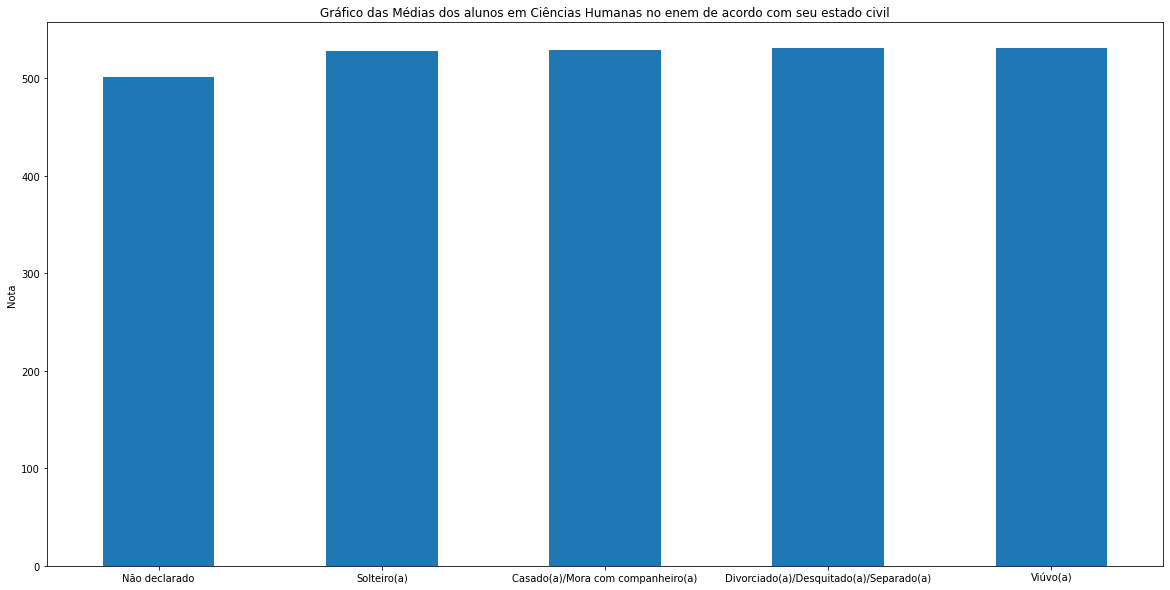

In [ ]:
# Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com seu estado civil:
df = std.groupby(['TP_ESTADO_CIVIL'])['NU_NOTA_CH'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(20, 10), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com seu estado civil")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 5), labels= ['Não declarado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)'], rotation=0)
plt.show()

In [ ]:
#[-1, 0, 1, 2, 3] = ['Não declarado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)']
std.groupby(['TP_ESTADO_CIVIL'])['NU_NOTA_LC'].mean().sort_values(ascending=True)

TP_ESTADO_CIVIL
3.0     461.114286
2.0     510.216438
1.0     513.105502
0.0     517.571296
-1.0    518.680528
Name: NU_NOTA_LC, dtype: float64

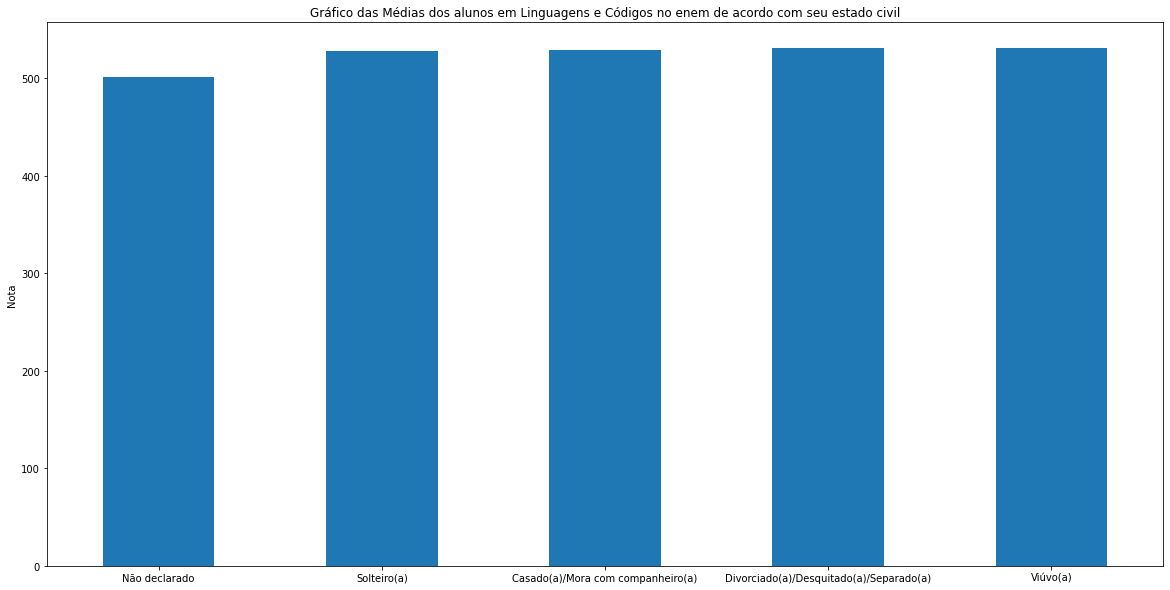

In [ ]:
# Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com seu estado civil:
df = std.groupby(['TP_ESTADO_CIVIL'])['NU_NOTA_CH'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(20, 10), logy=False)
plt.title("Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com seu estado civil")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 5), labels= ['Não declarado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)'], rotation=0)
plt.show()

In [ ]:
#[-1, 0, 1, 2, 3] = ['Não declarado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)']
std.groupby(['TP_ESTADO_CIVIL'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)

TP_ESTADO_CIVIL
3.0     425.714286
2.0     482.739726
1.0     500.938511
-1.0    514.719472
0.0     533.471698
Name: NU_NOTA_REDACAO, dtype: float64

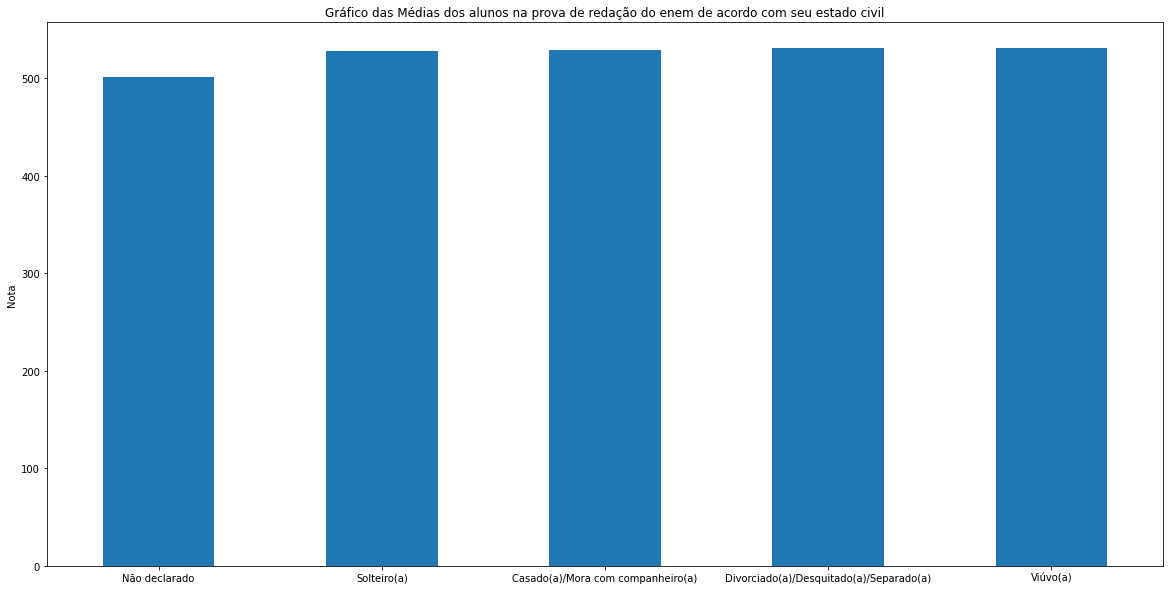

In [ ]:
# Gráfico das Médias dos alunos na prova de redação do enem de acordo com seu estado civil:
df = std.groupby(['TP_ESTADO_CIVIL'])['NU_NOTA_CH'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(20, 10), logy=False)
plt.title("Gráfico das Médias dos alunos na prova de redação do enem de acordo com seu estado civil")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 5), labels= ['Não declarado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)'], rotation=0)
plt.show()

####Médias dos alunos por disciplina no enem de acordo com sua cor:

In [ ]:
#[0, 1, 2, 3, 4, 5] = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
std.groupby(['TP_COR_RACA'])['NU_NOTA_MT'].mean().sort_values(ascending=True)

TP_COR_RACA
5    453.979688
2    468.193559
3    469.281630
4    491.164444
0    494.236747
1    508.619959
Name: NU_NOTA_MT, dtype: float64

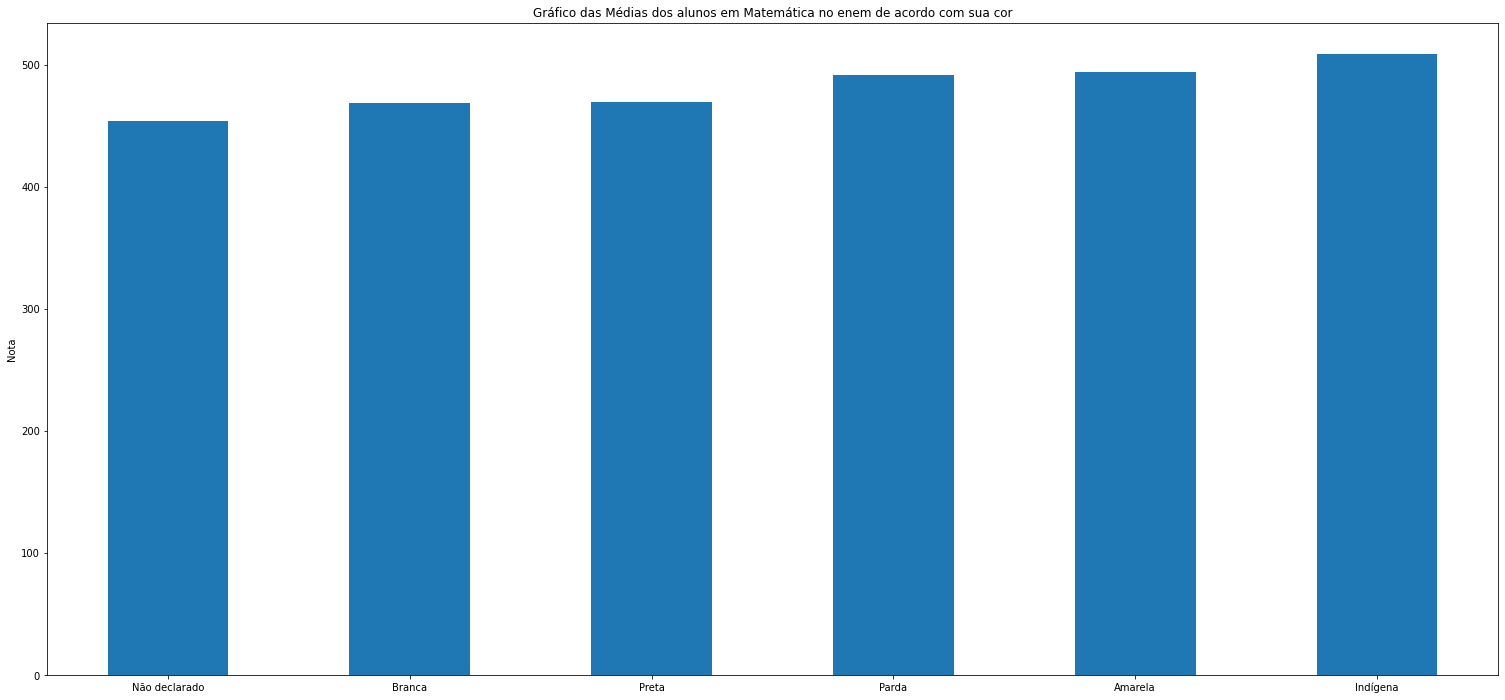

In [ ]:
# Gráfico das Médias dos alunos em Matemática no enem de acordo com sua cor:
df = std.groupby(['TP_COR_RACA'])['NU_NOTA_MT'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Matemática no enem de acordo com sua cor")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 6), labels= ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'], rotation=0)
plt.show()

In [ ]:
#[0, 1, 2, 3, 4, 5] = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
std.groupby(['TP_COR_RACA'])['NU_NOTA_CN'].mean().sort_values(ascending=True)

TP_COR_RACA
5    456.296875
3    464.646009
2    465.713040
4    481.002667
1    490.678574
0    492.389759
Name: NU_NOTA_CN, dtype: float64

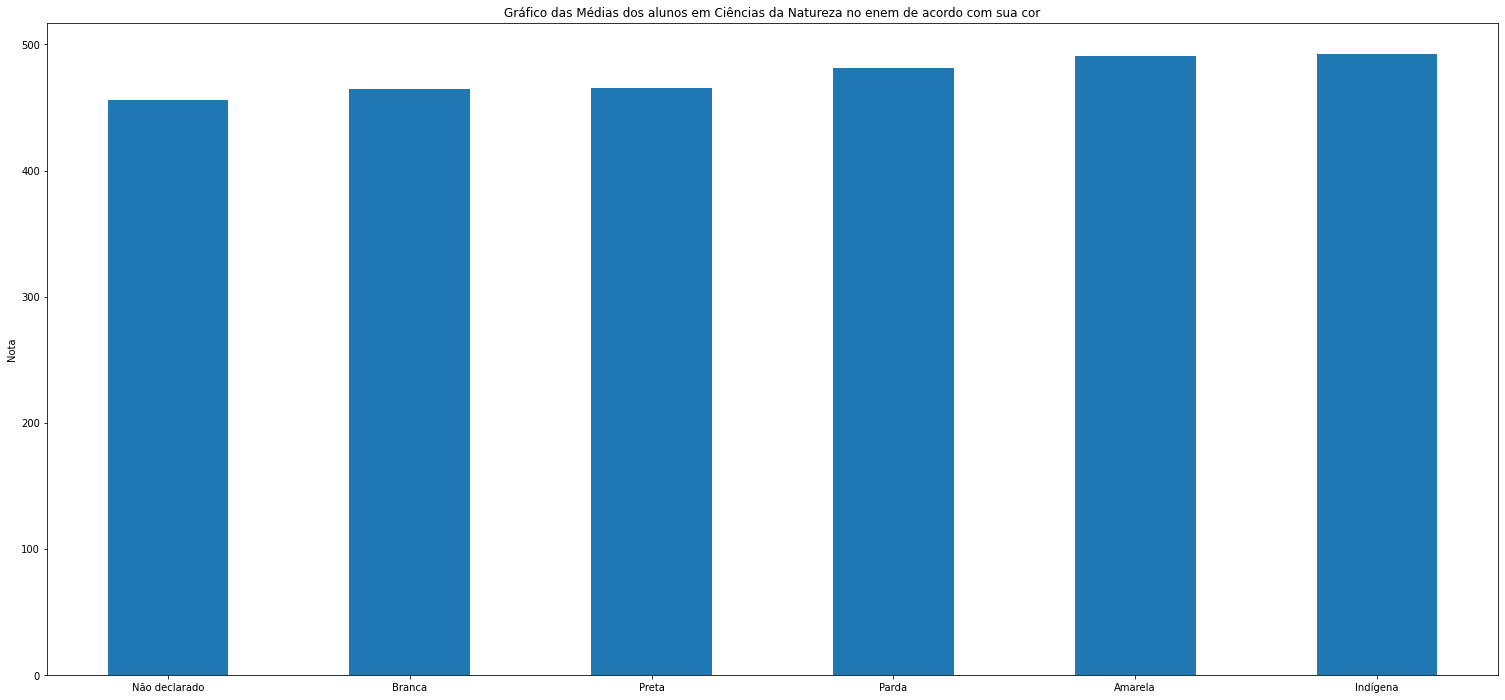

In [ ]:
# Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com sua cor:
df = std.groupby(['TP_COR_RACA'])['NU_NOTA_CN'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com sua cor")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 6), labels= ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'], rotation=0)
plt.show()

In [ ]:
#[0, 1, 2, 3, 4, 5] = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
std.groupby(['TP_COR_RACA'])['NU_NOTA_CH'].mean().sort_values(ascending=True)

TP_COR_RACA
5    509.570313
3    519.403919
2    524.016811
4    539.581333
0    545.366265
1    548.377311
Name: NU_NOTA_CH, dtype: float64

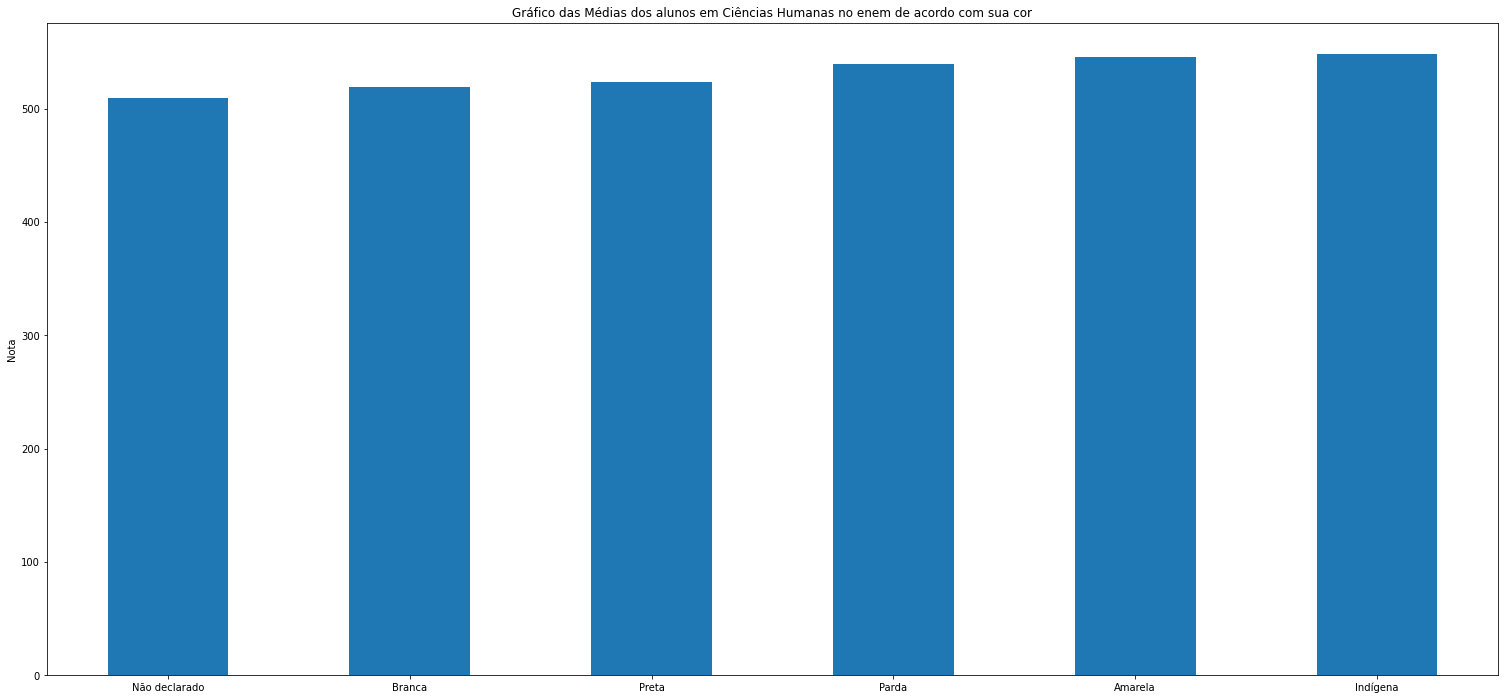

In [ ]:
# Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com sua cor:
df = std.groupby(['TP_COR_RACA'])['NU_NOTA_CH'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com sua cor")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 6), labels= ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'], rotation=0)
plt.show()

In [ ]:
#[0, 1, 2, 3, 4, 5] = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
std.groupby(['TP_COR_RACA'])['NU_NOTA_LC'].mean().sort_values(ascending=True)

TP_COR_RACA
5    495.337500
3    506.106117
2    511.874627
4    523.903556
0    532.269880
1    534.228412
Name: NU_NOTA_LC, dtype: float64

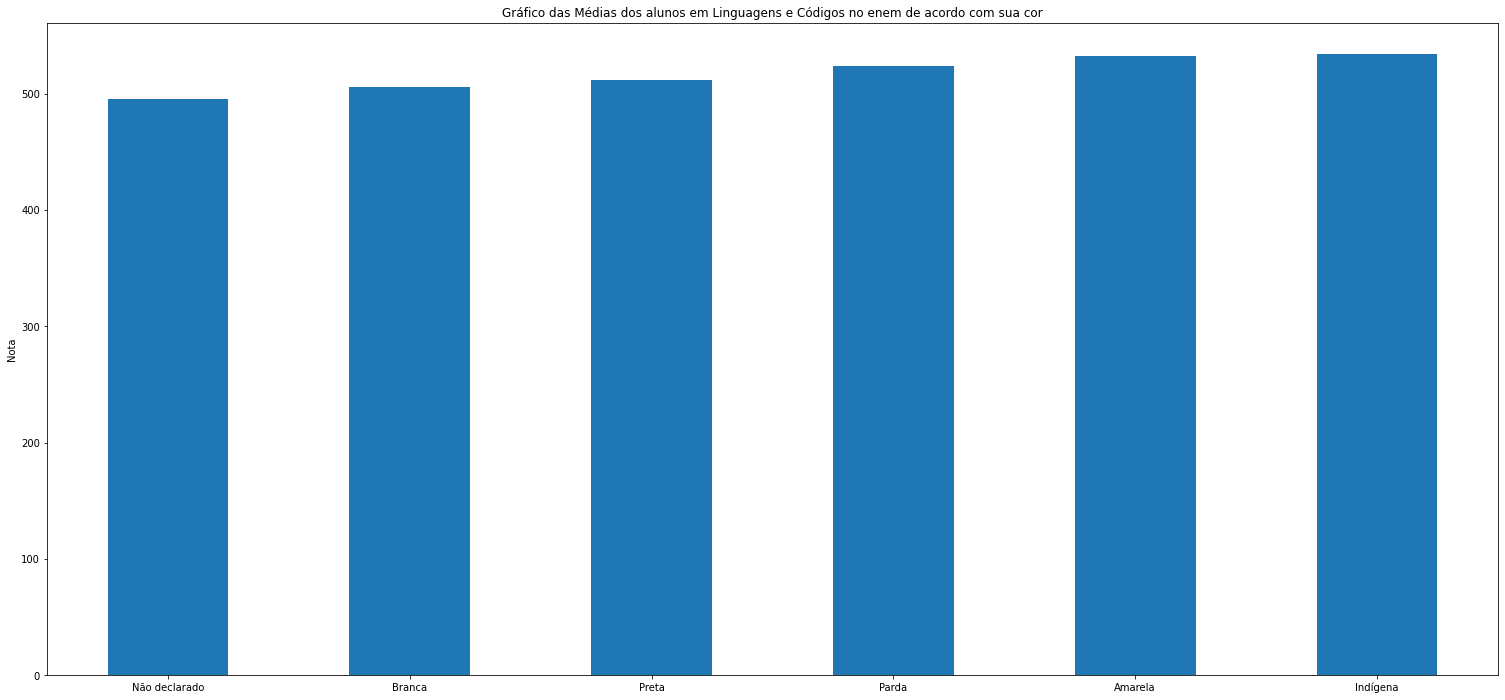

In [ ]:
# Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com sua cor:
df = std.groupby(['TP_COR_RACA'])['NU_NOTA_LC'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com sua cor")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 6), labels= ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'], rotation=0)
plt.show()

In [ ]:
#[0, 1, 2, 3, 4, 5] = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
std.groupby(['TP_COR_RACA'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)

TP_COR_RACA
5    483.750000
3    514.041883
2    519.607227
0    545.421687
1    556.073378
4    557.066667
Name: NU_NOTA_REDACAO, dtype: float64

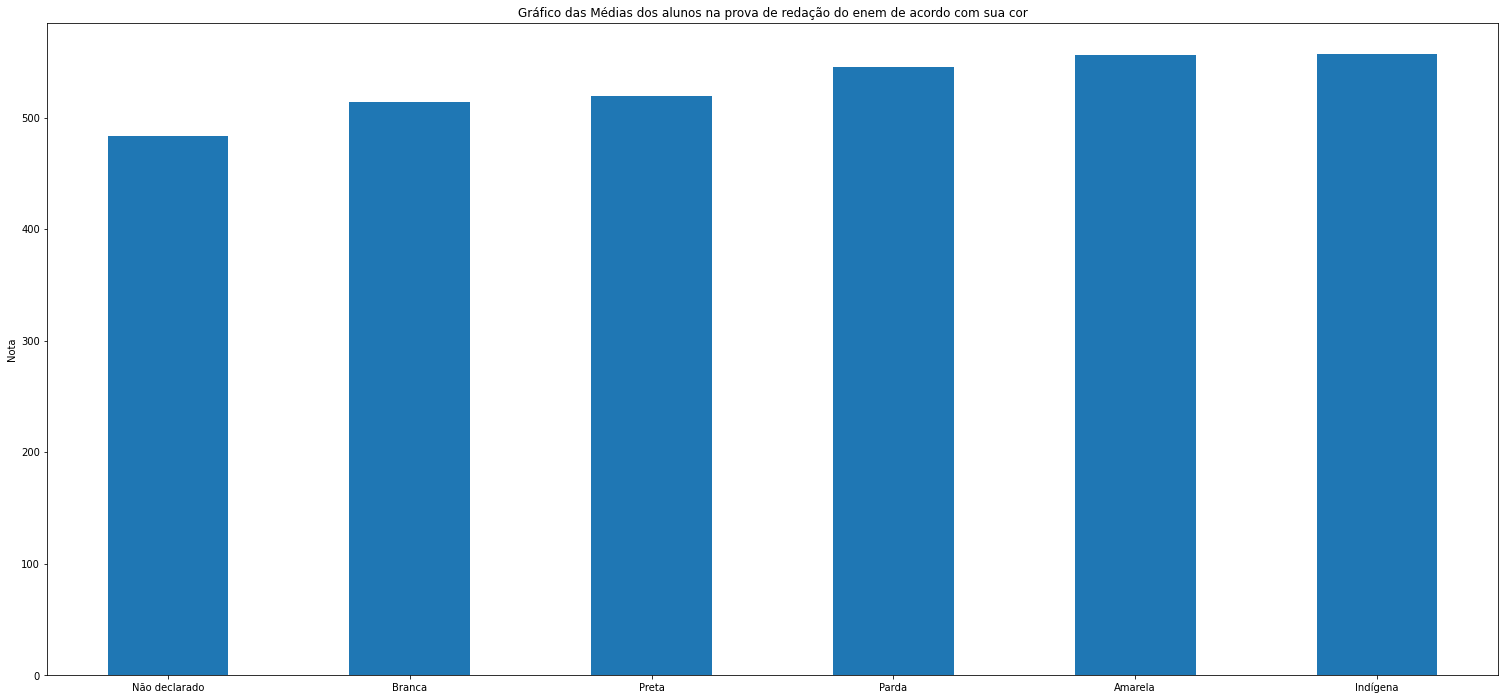

In [ ]:
# Gráfico das Médias dos alunos na prova de redação do enem de acordo com sua cor:
df = std.groupby(['TP_COR_RACA'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos na prova de redação do enem de acordo com sua cor")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 6), labels= ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'], rotation=0)
plt.show()

####Médias dos alunos por disciplina no enem de acordo com o tipo de escola frequentada no Ensino Médio

Em média, em todas as disciplinas os alunos que estudaram no exterior possuiram notas maiores do que os outros alunos e alunos que estudaram em escola privada possuiram notas maiores que alunos de escolas públicas. 

In [ ]:
#[1, 2, 3, 4] = ['Não Respondeu', 'Pública', 'Privada', 'Exterior']
std.groupby(['TP_ESCOLA'])['NU_NOTA_MT'].mean().sort_values(ascending=True)

TP_ESCOLA
4    359.300000
2    463.597147
1    484.903424
3    577.794455
Name: NU_NOTA_MT, dtype: float64

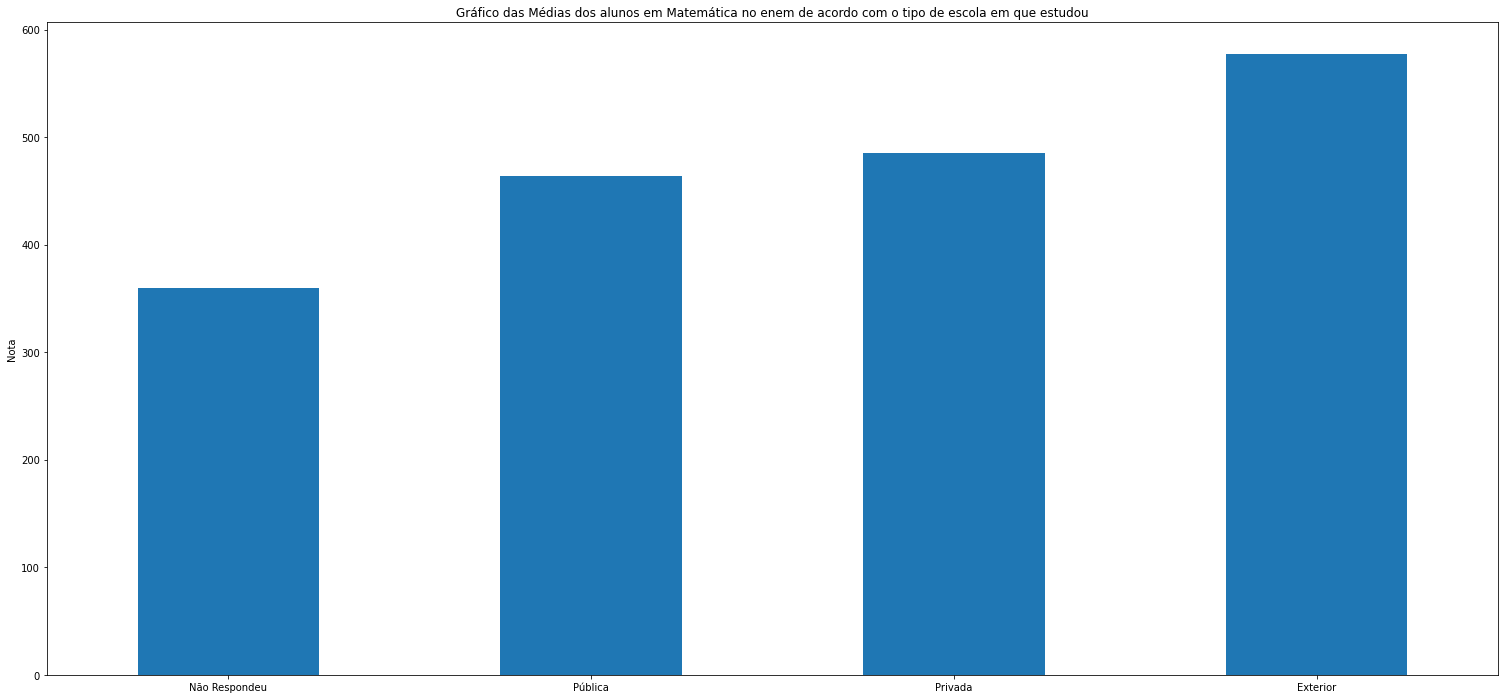

In [ ]:
# Gráfico das Médias dos alunos em Matemática no enem de acordo com o tipo de escola em que estudou:
df = std.groupby(['TP_ESCOLA'])['NU_NOTA_MT'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Matemática no enem de acordo com o tipo de escola em que estudou")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 4), labels= ['Não Respondeu', 'Pública', 'Privada', 'Exterior'], rotation=0)
plt.show()

In [ ]:
#[1, 2, 3, 4] = ['Não Respondeu', 'Pública', 'Privada', 'Exterior']
std.groupby(['TP_ESCOLA'])['NU_NOTA_CN'].mean().sort_values(ascending=True)

TP_ESCOLA
4    406.500000
2    460.985602
1    474.887184
3    545.636414
Name: NU_NOTA_CN, dtype: float64

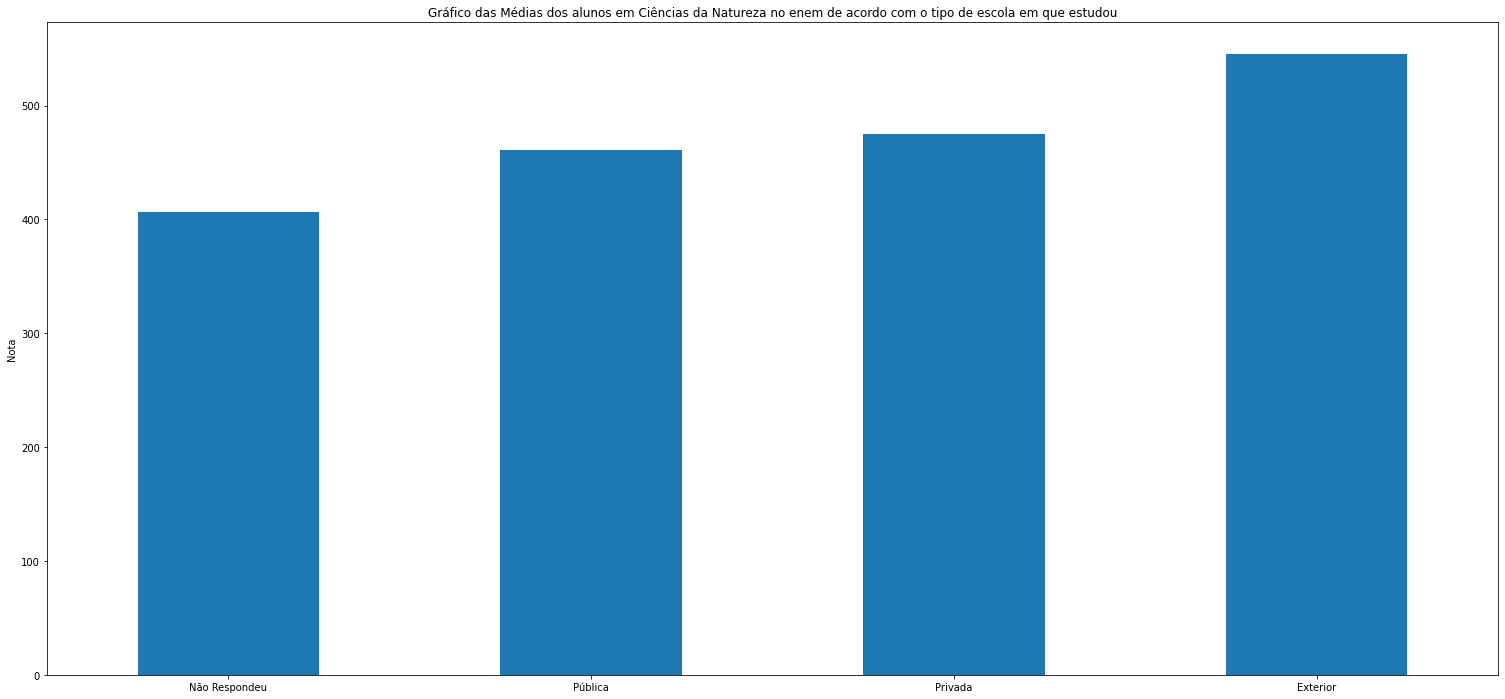

In [ ]:
# Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com o tipo de escola em que estudou:
df = std.groupby(['TP_ESCOLA'])['NU_NOTA_CN'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com o tipo de escola em que estudou")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 4), labels= ['Não Respondeu', 'Pública', 'Privada', 'Exterior'], rotation=0)
plt.show()

In [ ]:
#[1, 2, 3, 4] = ['Não Respondeu', 'Pública', 'Privada', 'Exterior']
std.groupby(['TP_ESCOLA'])['NU_NOTA_CH'].mean().sort_values(ascending=True)

TP_ESCOLA
4    373.100000
2    516.589078
1    532.343883
3    591.760444
Name: NU_NOTA_CH, dtype: float64

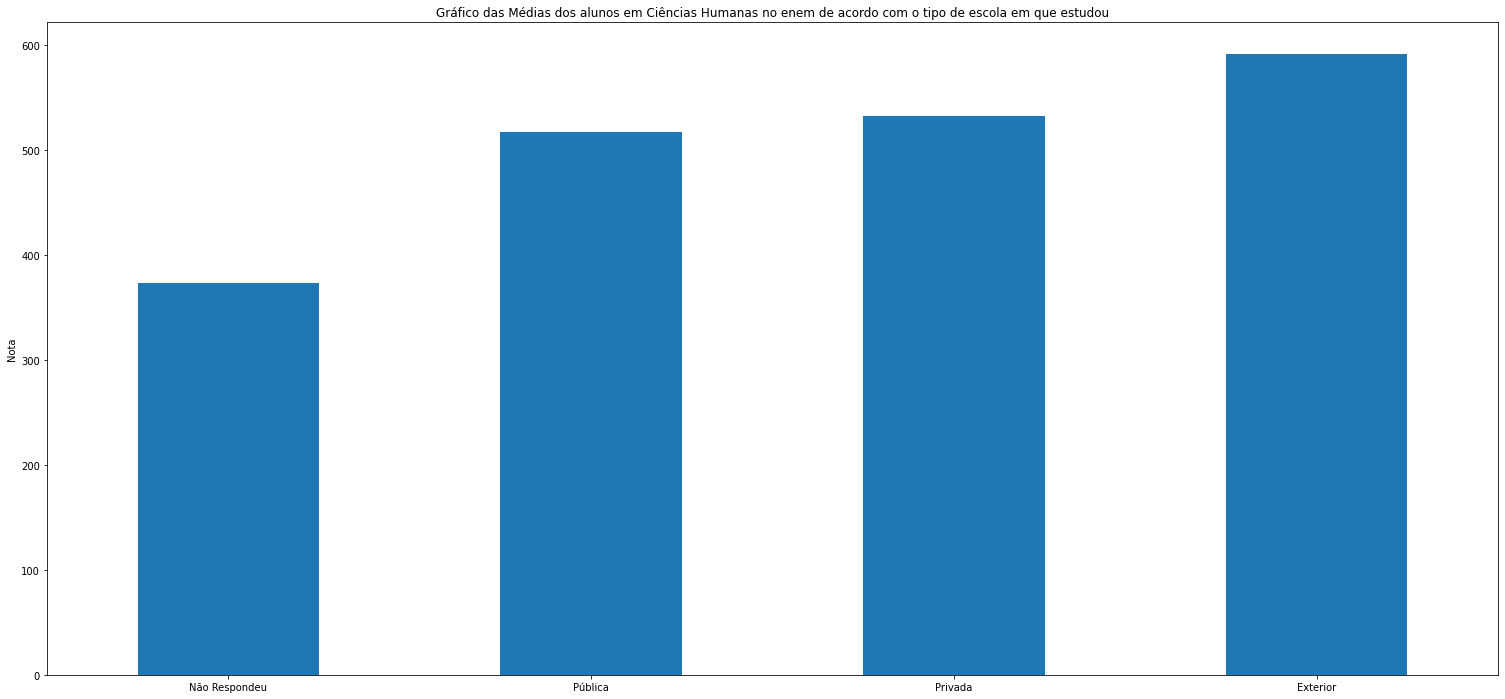

In [ ]:
# Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com o tipo de escola em que estudou:
df = std.groupby(['TP_ESCOLA'])['NU_NOTA_CH'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com o tipo de escola em que estudou")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 4), labels= ['Não Respondeu', 'Pública', 'Privada', 'Exterior'], rotation=0)
plt.show()

In [ ]:
#[1, 2, 3, 4] = ['Não Respondeu', 'Pública', 'Privada', 'Exterior']
std.groupby(['TP_ESCOLA'])['NU_NOTA_LC'].mean().sort_values(ascending=True)

TP_ESCOLA
4    419.600000
2    504.555264
1    519.005340
3    568.028651
Name: NU_NOTA_LC, dtype: float64

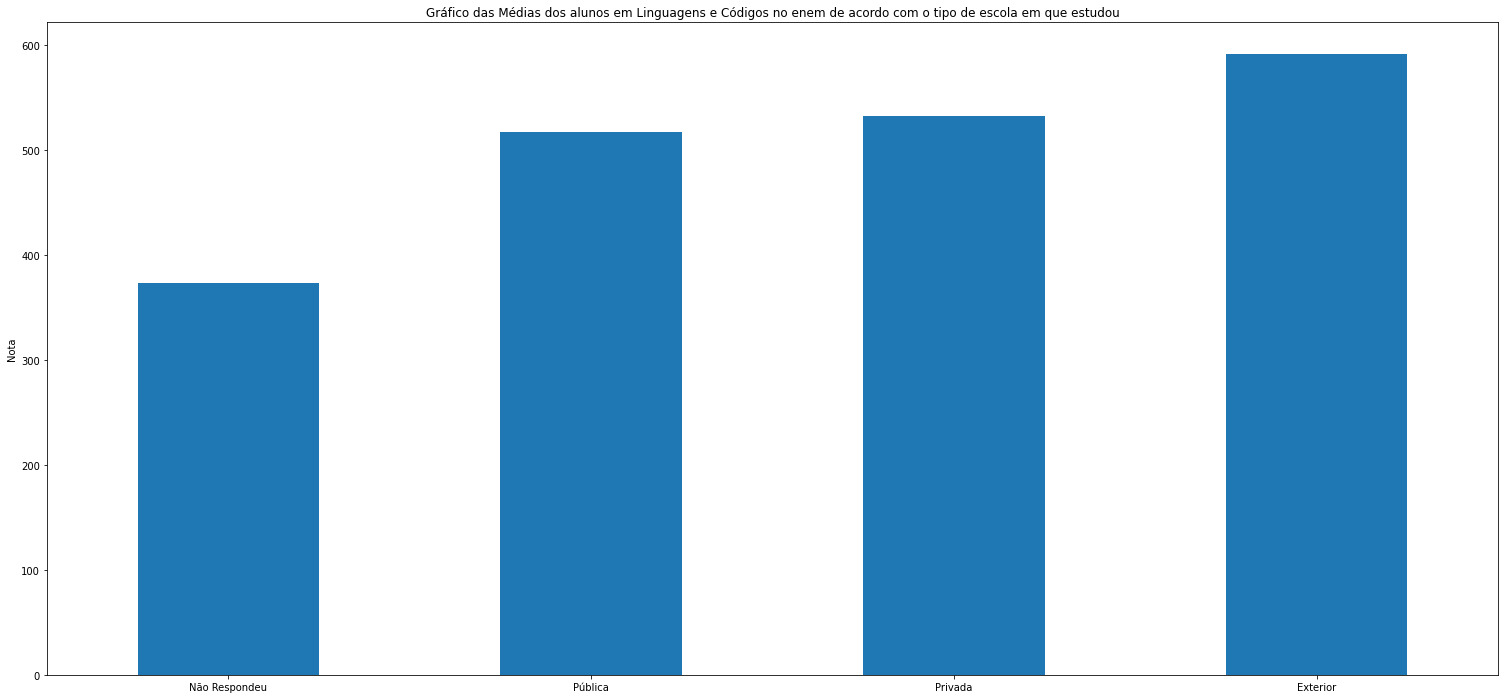

In [ ]:
# Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com o tipo de escola em que estudou:
df = std.groupby(['TP_ESCOLA'])['NU_NOTA_CH'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com o tipo de escola em que estudou")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 4), labels= ['Não Respondeu', 'Pública', 'Privada', 'Exterior'], rotation=0)
plt.show()

In [ ]:
#[1, 2, 3, 4] = ['Não Respondeu', 'Pública', 'Privada', 'Exterior']
std.groupby(['TP_ESCOLA'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)

TP_ESCOLA
4    320.000000
2    512.443424
1    528.849694
3    650.868762
Name: NU_NOTA_REDACAO, dtype: float64

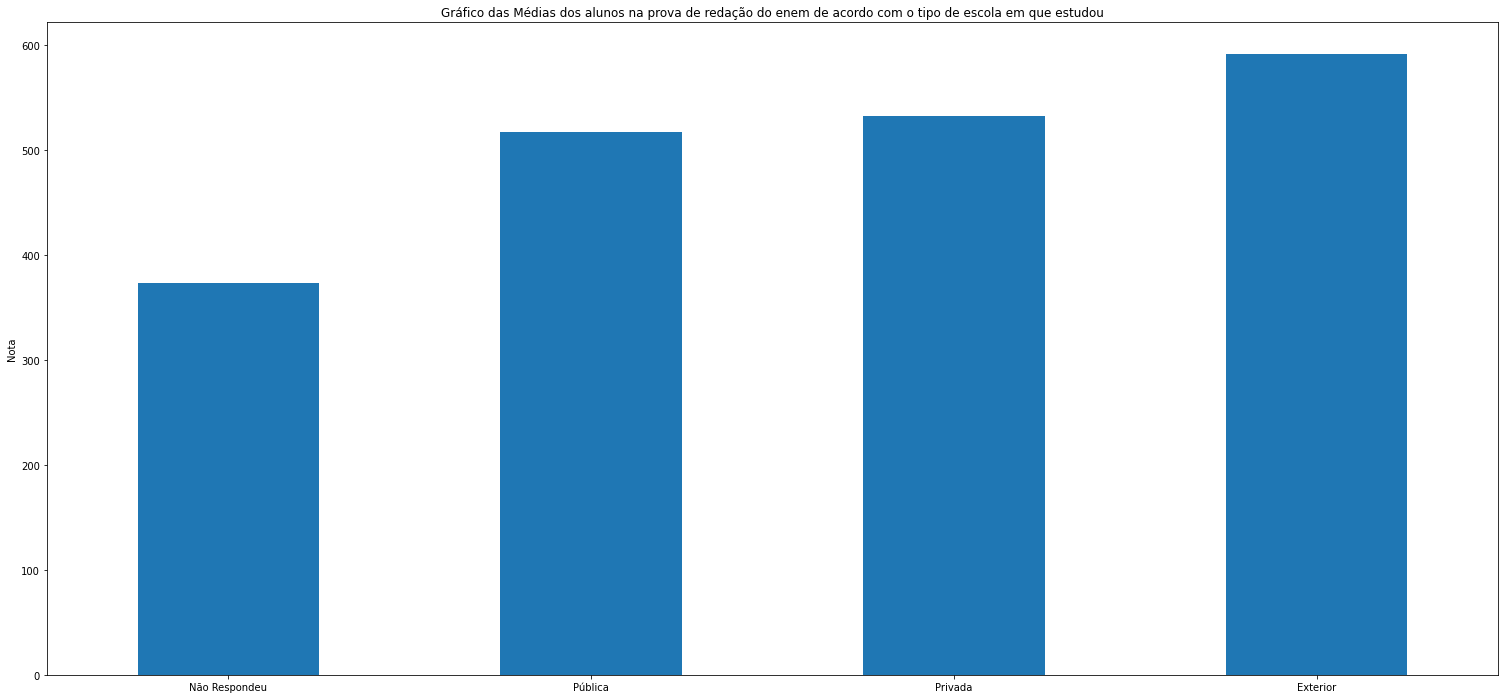

In [ ]:
# Gráfico das Médias dos alunos na prova de redação do enem de acordo com o tipo de escola em que estudou:
df = std.groupby(['TP_ESCOLA'])['NU_NOTA_CH'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos na prova de redação do enem de acordo com o tipo de escola em que estudou")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 4), labels= ['Não Respondeu', 'Pública', 'Privada', 'Exterior'], rotation=0)
plt.show()

####Médias dos alunos por disciplina no enem de acordo com a educação paternal

Em média, em todas as disciplinas, quanto maior o grau de educação paternal, maior a nota do filho(a).

In [ ]:
#[A, B, C, D, E, F, G, H] = ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei']
std.groupby(['Q001'])['NU_NOTA_MT'].mean().sort_values(ascending=True)

Q001
A    446.581081
B    457.763975
H    463.828128
C    473.309353
D    479.726035
E    502.314640
F    559.896995
G    585.760764
Name: NU_NOTA_MT, dtype: float64

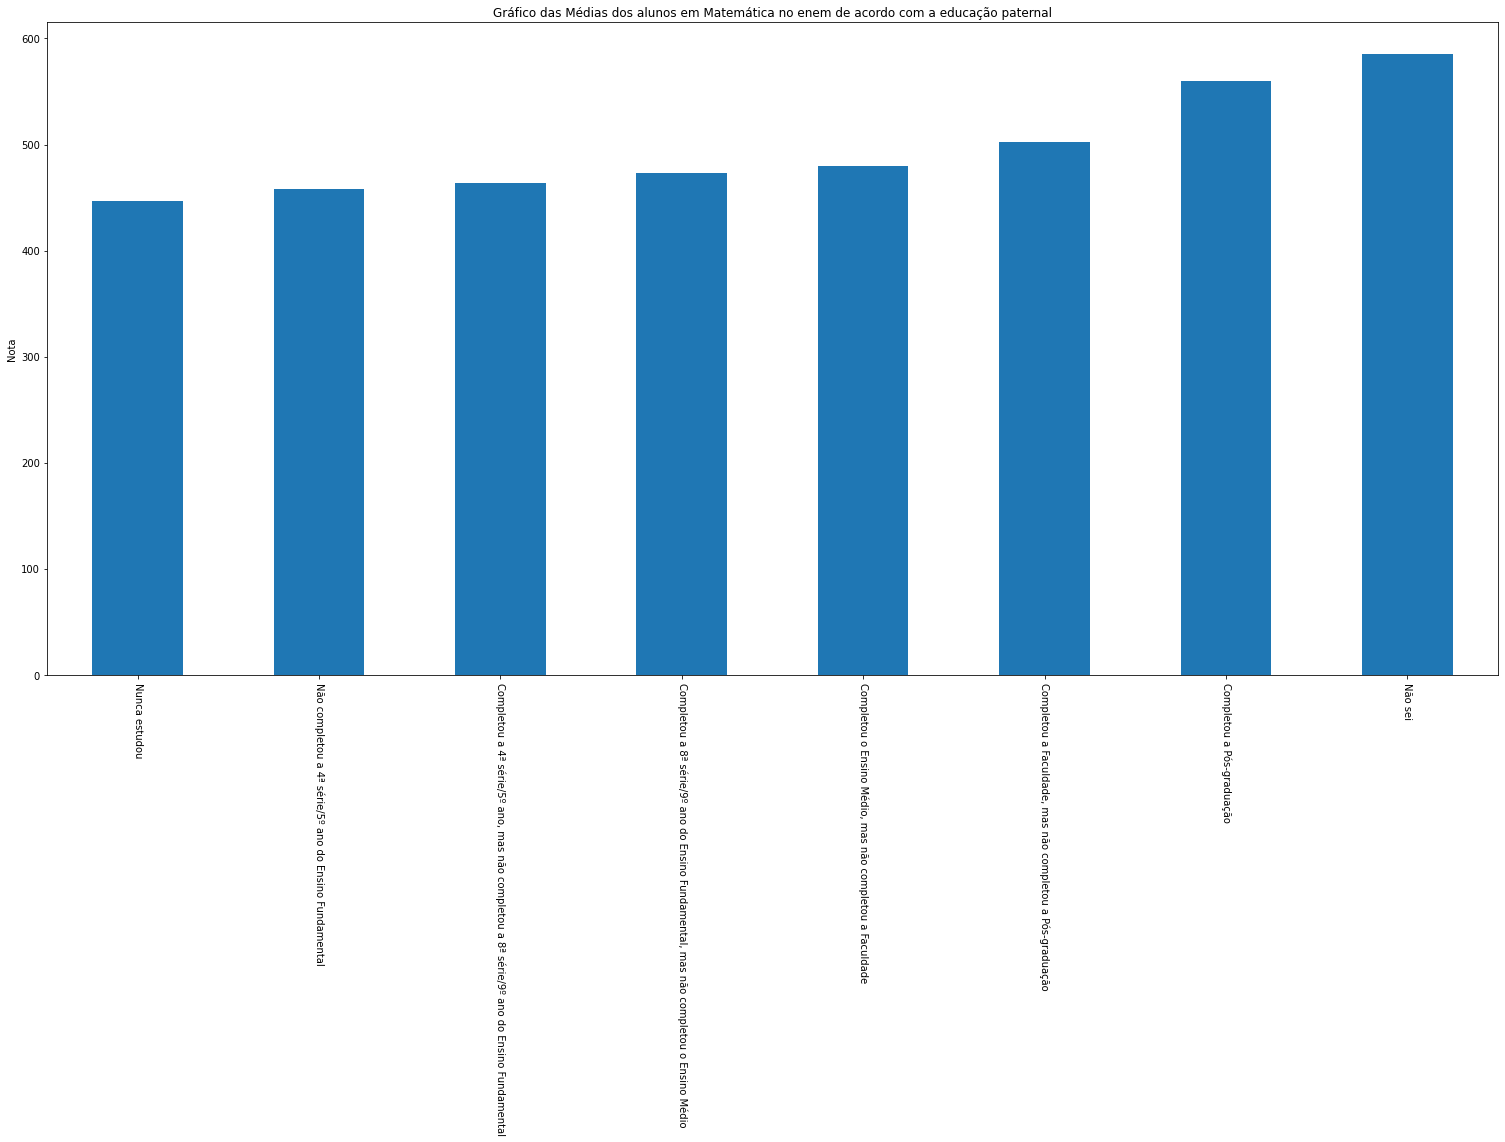

In [ ]:
# Gráfico das Médias dos alunos em Matemática no enem de acordo com a educação paternal:
df = std.groupby(['Q001'])['NU_NOTA_MT'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Matemática no enem de acordo com a educação paternal")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 8), labels= ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei'], rotation=-90)
plt.show()

In [ ]:
#[A, B, C, D, E, F, G, H] = ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei']
std.groupby(['Q001'])['NU_NOTA_CN'].mean().sort_values(ascending=True)

Q001
A    450.754561
B    458.775155
H    459.054122
C    466.176041
D    471.341799
E    487.486075
F    525.997663
G    545.152083
Name: NU_NOTA_CN, dtype: float64

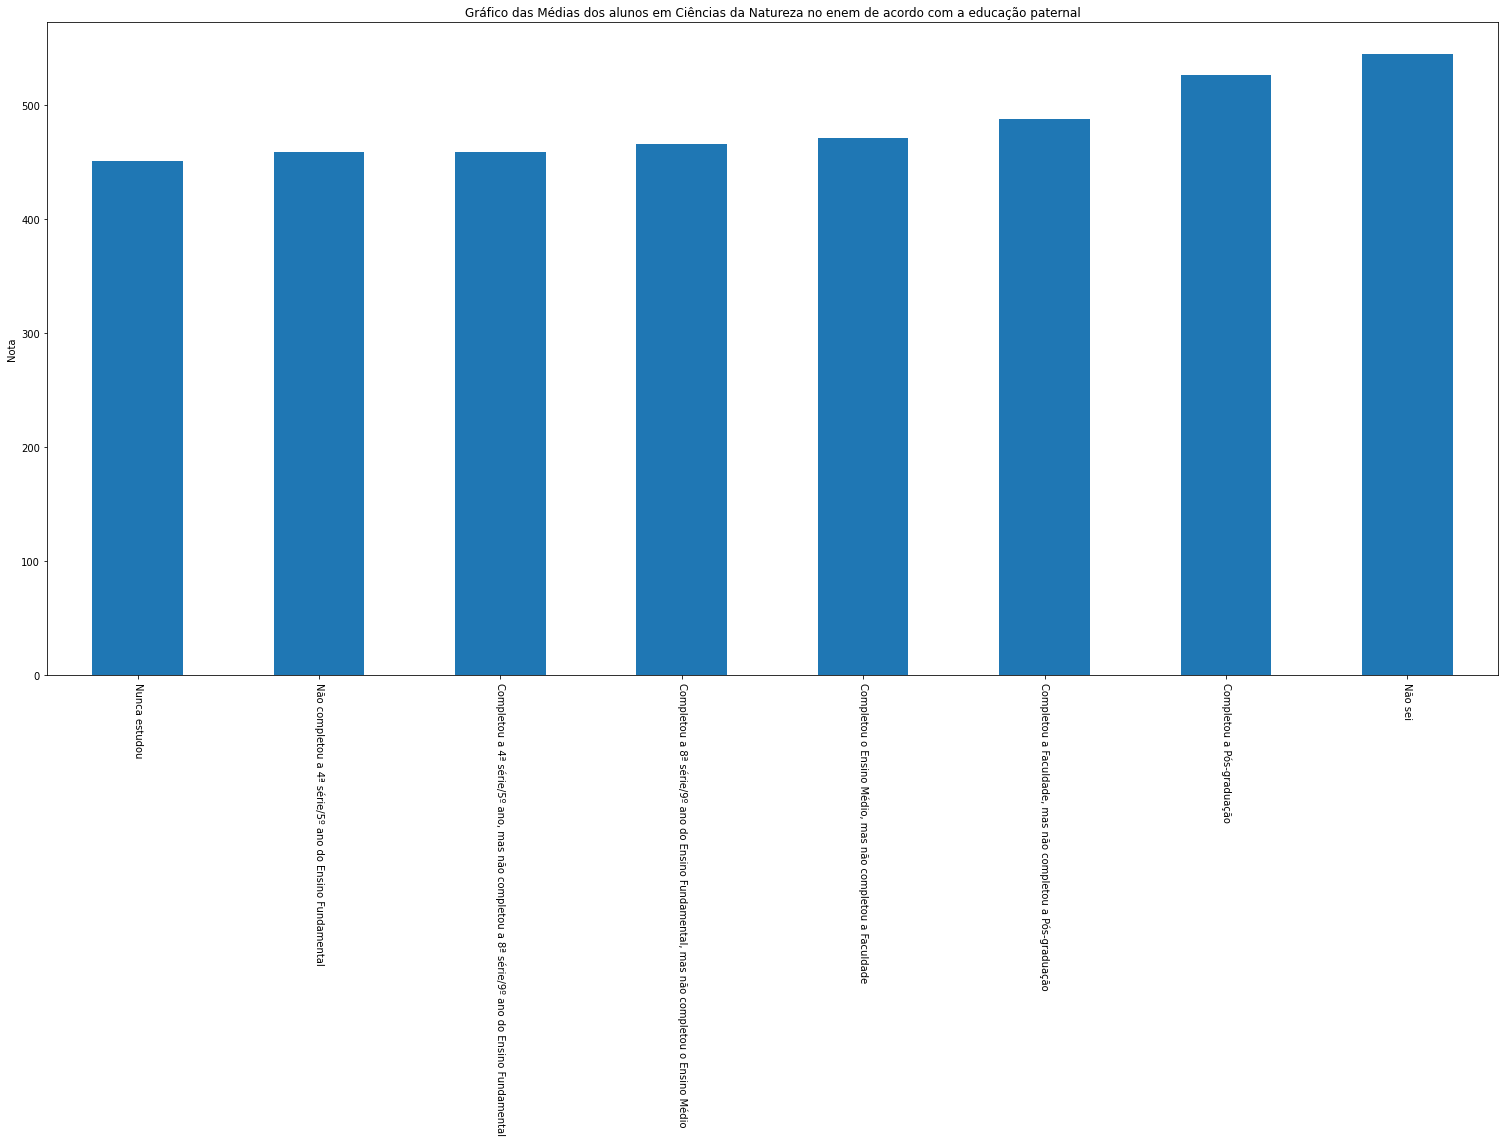

In [ ]:
# Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com a educação paternal:
df = std.groupby(['Q001'])['NU_NOTA_CN'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com a educação paternal")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 8), labels= ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei'], rotation=-90)
plt.show()

In [ ]:
#[A, B, C, D, E, F, G, H] = ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei']
std.groupby(['Q001'])['NU_NOTA_CH'].mean().sort_values(ascending=True)

Q001
A    503.814189
B    513.259494
H    516.902813
C    524.077514
D    530.884395
E    544.694194
F    579.528214
G    590.993403
Name: NU_NOTA_CH, dtype: float64

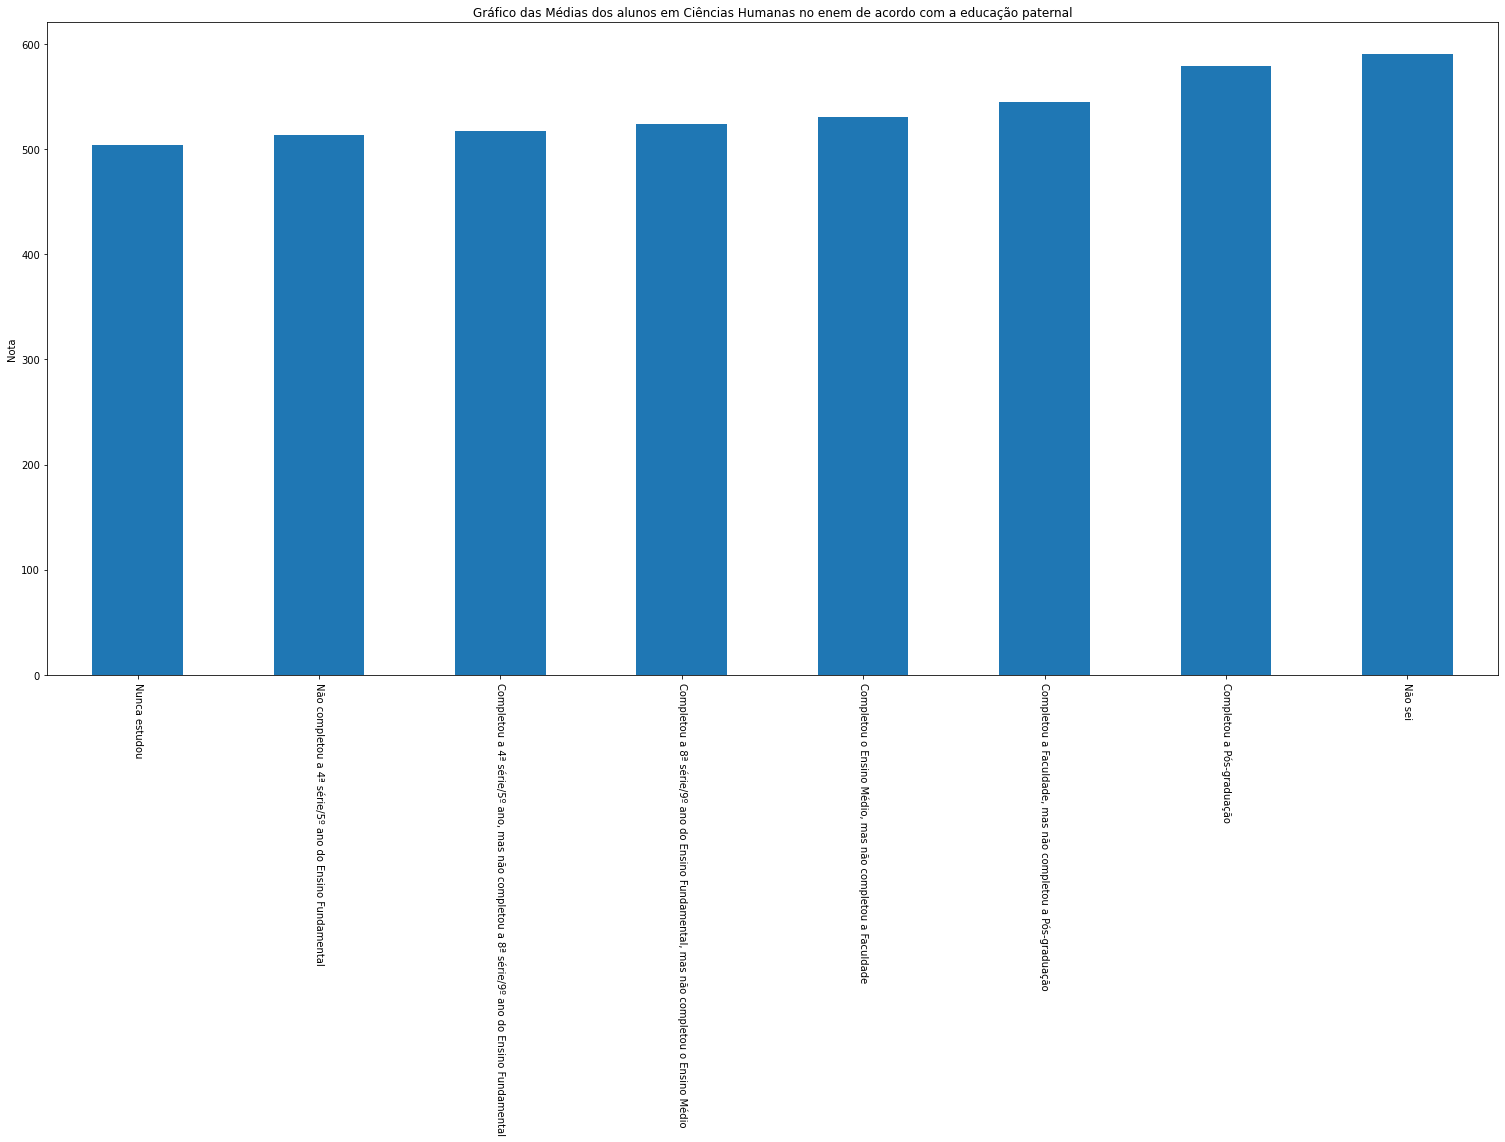

In [ ]:
# Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com a educação paternal:
df = std.groupby(['Q001'])['NU_NOTA_CH'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com a educação paternal")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 8), labels= ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei'], rotation=-90)
plt.show()

In [ ]:
#[A, B, C, D, E, F, G, H] = ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei']
std.groupby(['Q001'])['NU_NOTA_LC'].mean().sort_values(ascending=True)

Q001
A    492.266216
B    500.397959
H    505.794956
C    510.641448
D    519.036545
E    530.089062
F    561.987980
G    569.972917
Name: NU_NOTA_LC, dtype: float64

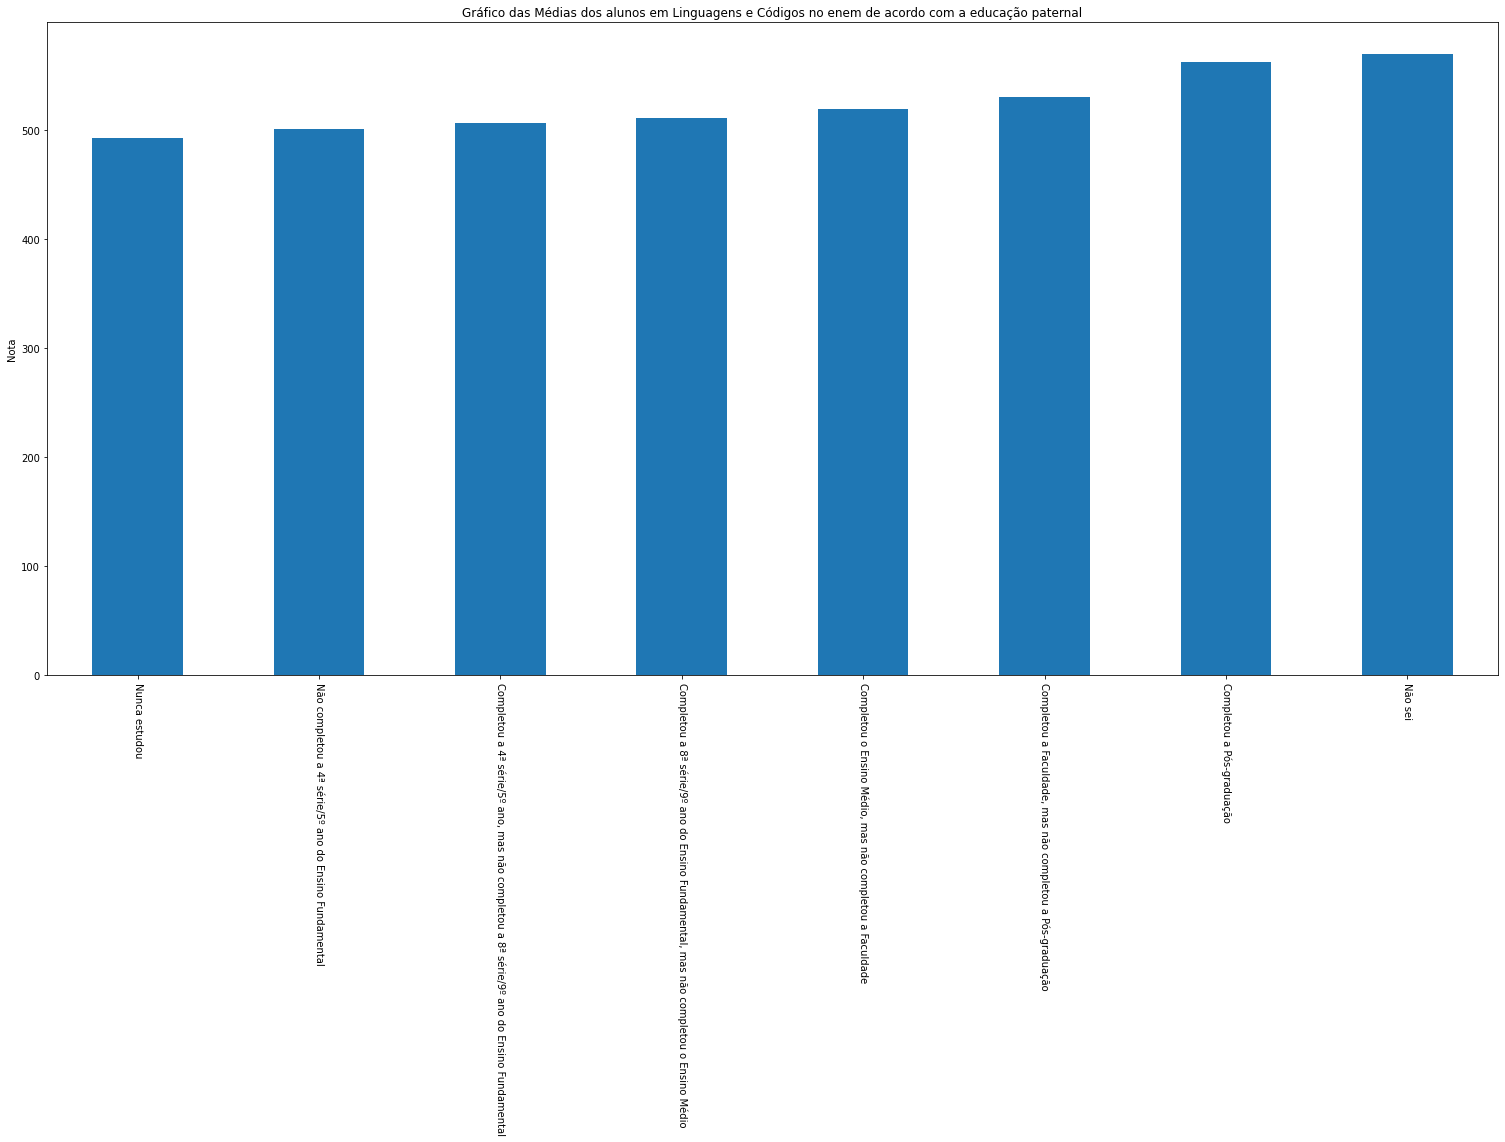

In [ ]:
# Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com a educação paternal:
df = std.groupby(['Q001'])['NU_NOTA_LC'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com a educação paternal")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 8), labels= ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei'], rotation=-90)
plt.show()

In [ ]:
#[A, B, C, D, E, F, G, H] = ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei']
std.groupby(['Q001'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)

Q001
A    475.608108
H    491.373424
B    499.032831
C    518.872518
D    537.667197
E    560.105175
F    613.756260
G    641.666667
Name: NU_NOTA_REDACAO, dtype: float64

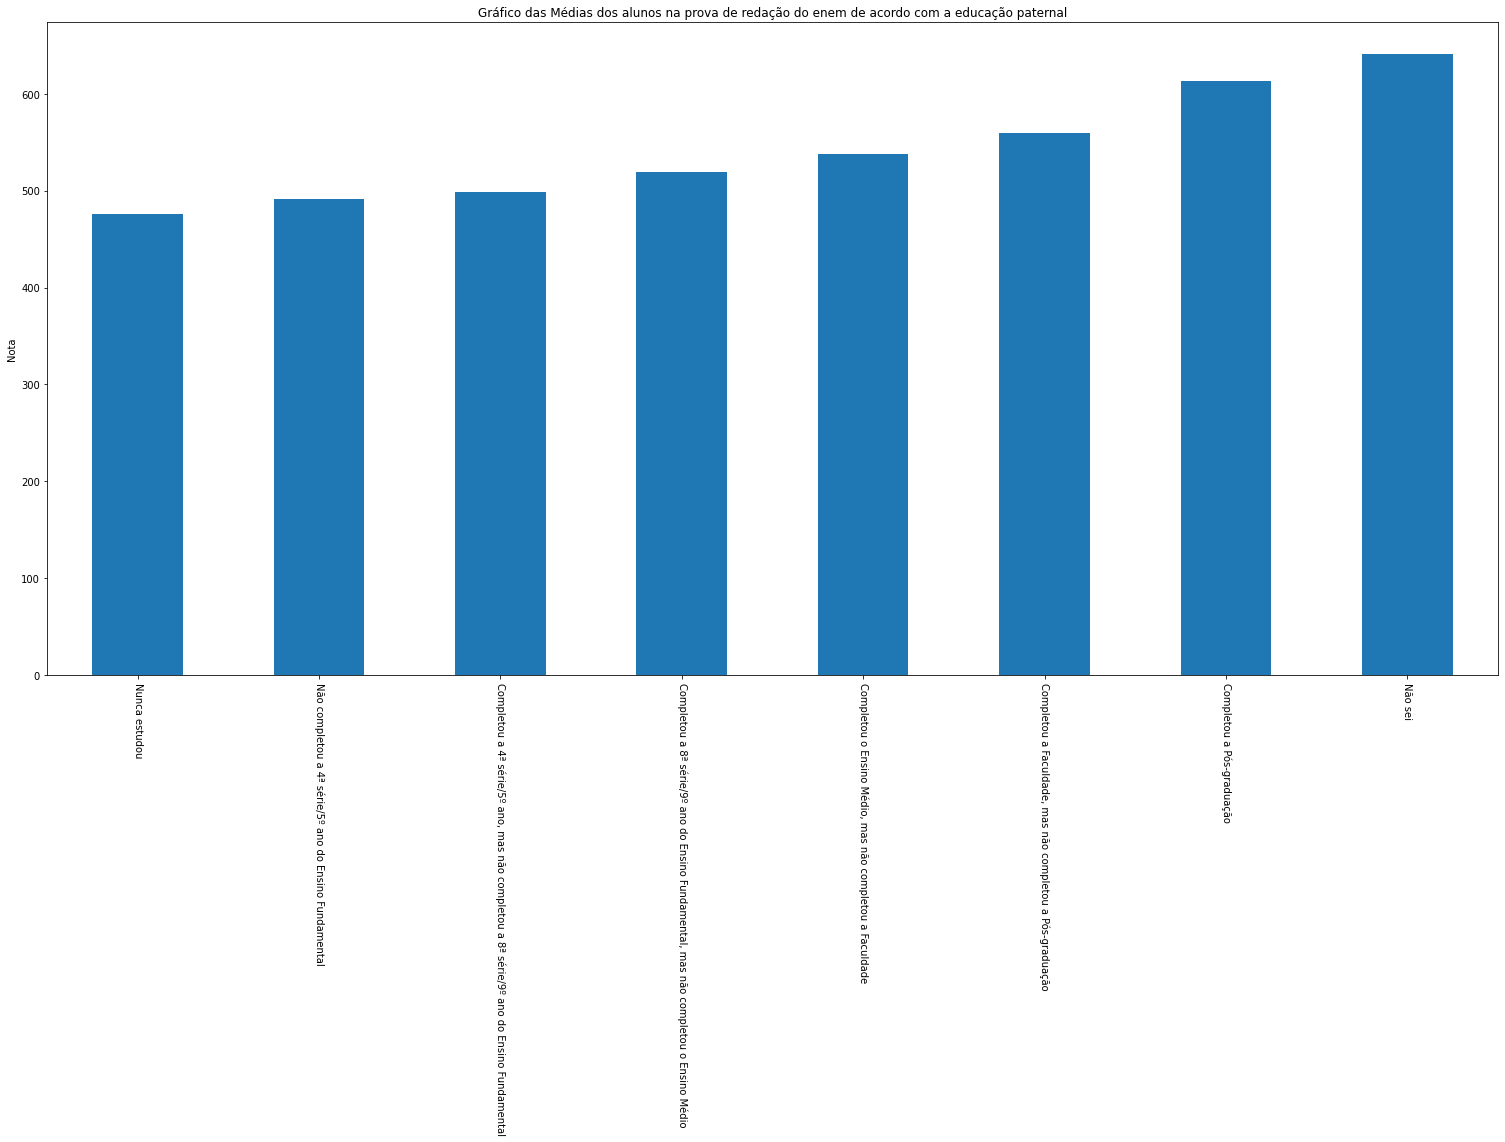

In [ ]:
# Gráfico das Médias dos alunos na prova de redação do enem de acordo com a educação paternal:
df = std.groupby(['Q001'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos na prova de redação do enem de acordo com a educação paternal")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 8), labels= ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei'], rotation=-90)
plt.show()

####Médias dos alunos por disciplina no enem de acordo com a educação maternal

Em média, em todas as disciplinas, quanto maior o grau de educação maternal, maior a nota do filho(a).

In [ ]:
#[A, B, C, D, E, F, G, H] = ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei']
std.groupby(['Q002'])['NU_NOTA_MT'].mean().sort_values(ascending=True)

Q002
A    442.385175
B    452.921929
H    456.126190
C    466.063565
D    474.309777
E    494.309422
F    547.633089
G    550.824819
Name: NU_NOTA_MT, dtype: float64

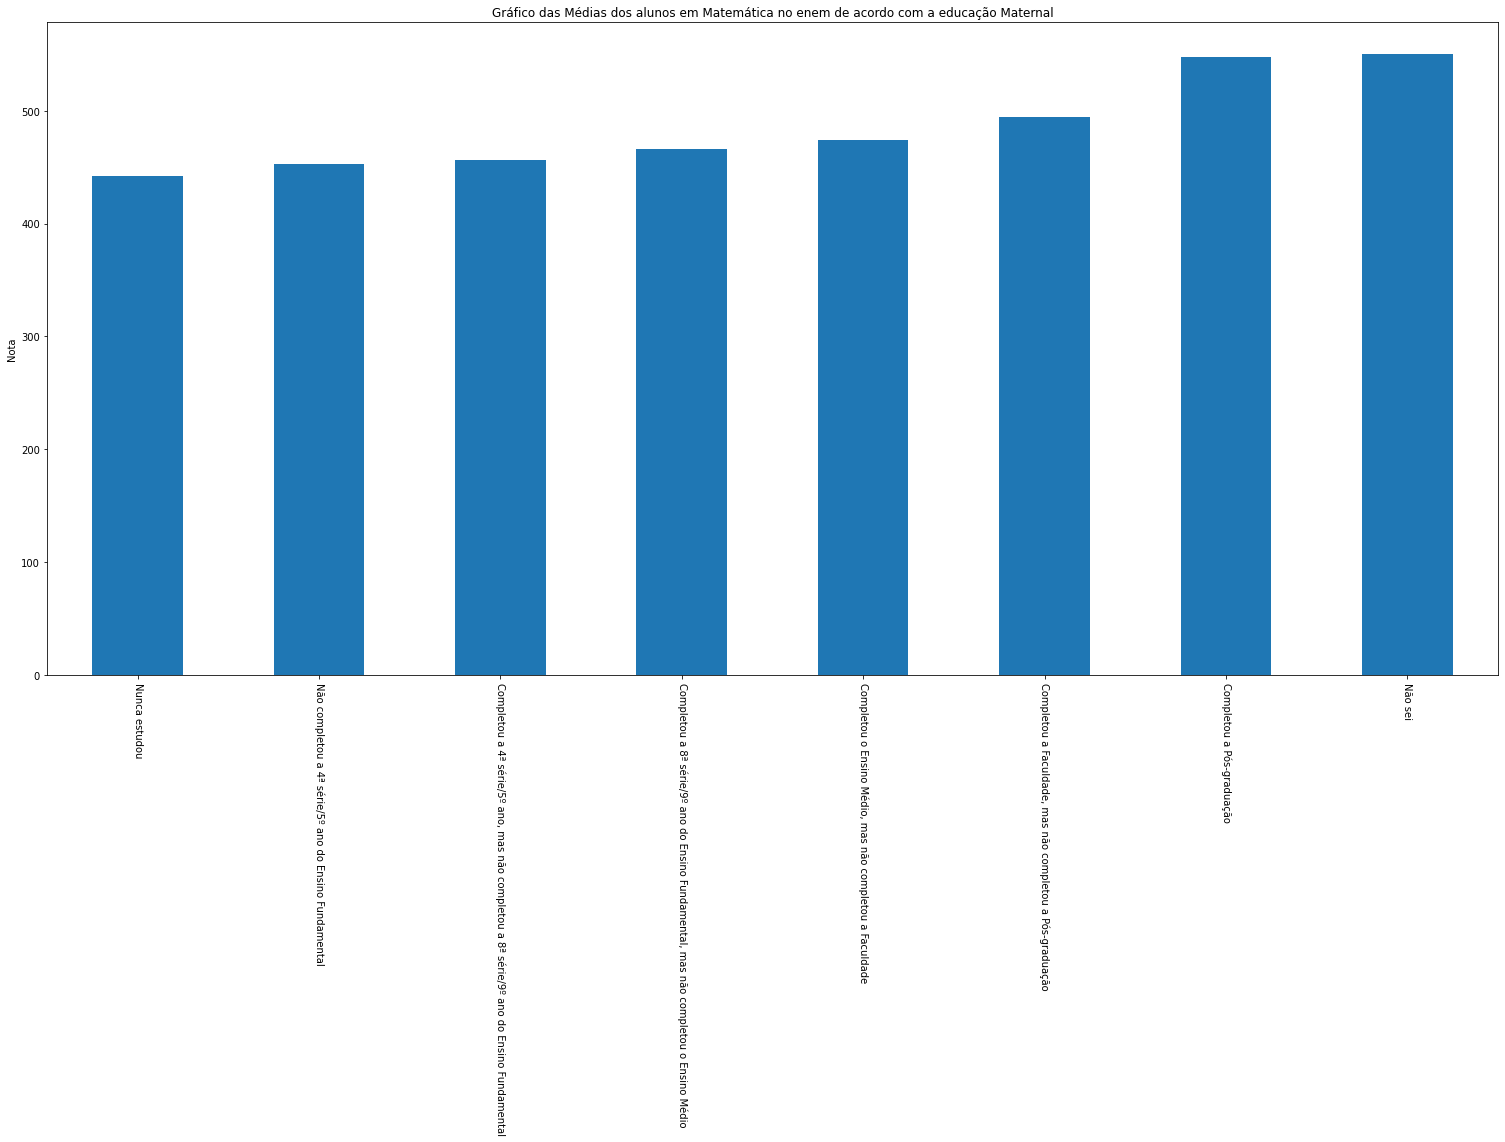

In [ ]:
# Gráfico das Médias dos alunos em Matemática no enem de acordo com a educação Maternal:
df = std.groupby(['Q002'])['NU_NOTA_MT'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Matemática no enem de acordo com a educação Maternal")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 8), labels= ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei'], rotation=-90)
plt.show()

In [ ]:
#[A, B, C, D, E, F, G, H] = ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei']
std.groupby(['Q002'])['NU_NOTA_CN'].mean().sort_values(ascending=True)

Q002
A    445.174933
H    454.415079
B    455.008152
C    461.549148
D    466.760081
E    481.686795
F    518.938339
G    525.586957
Name: NU_NOTA_CN, dtype: float64

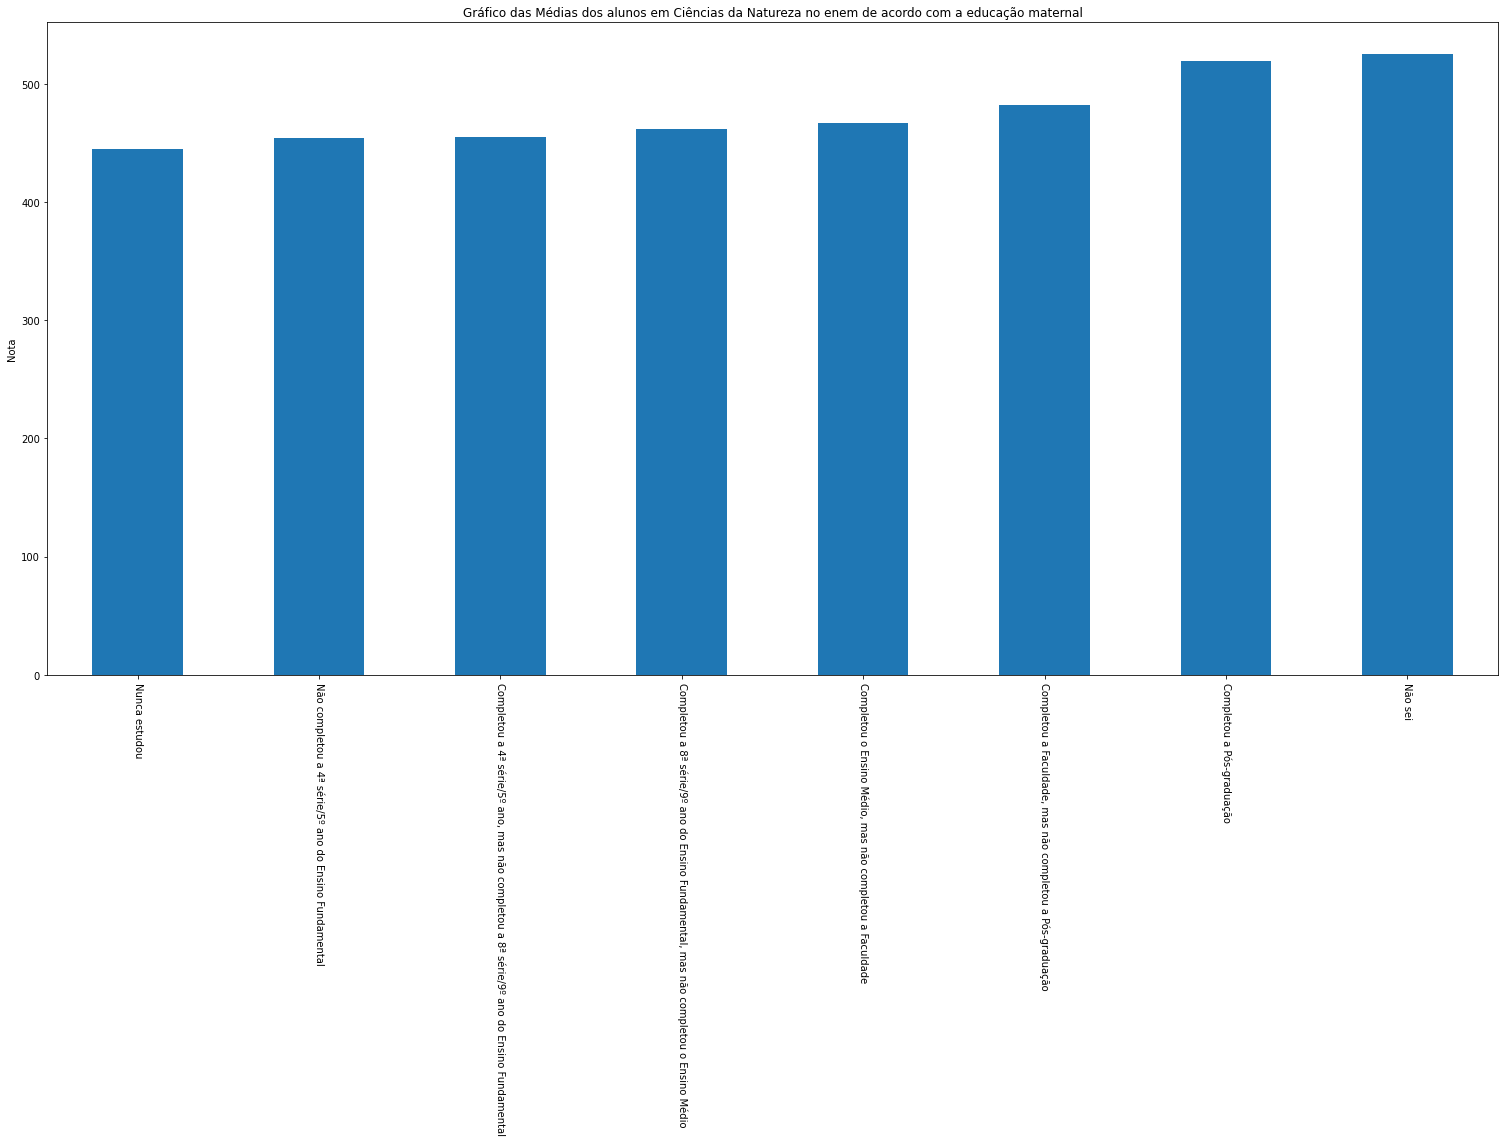

In [ ]:
# Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com a educação Maternal:
df = std.groupby(['Q002'])['NU_NOTA_CN'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com a educação maternal")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 8), labels= ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei'], rotation=-90)
plt.show()

In [ ]:
#[A, B, C, D, E, F, G, H] = ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei']
std.groupby(['Q002'])['NU_NOTA_CH'].mean().sort_values(ascending=True)

Q002
A    499.280323
H    505.139881
B    511.391504
C    518.464089
D    526.834929
E    539.024620
F    571.378510
G    575.866486
Name: NU_NOTA_CH, dtype: float64

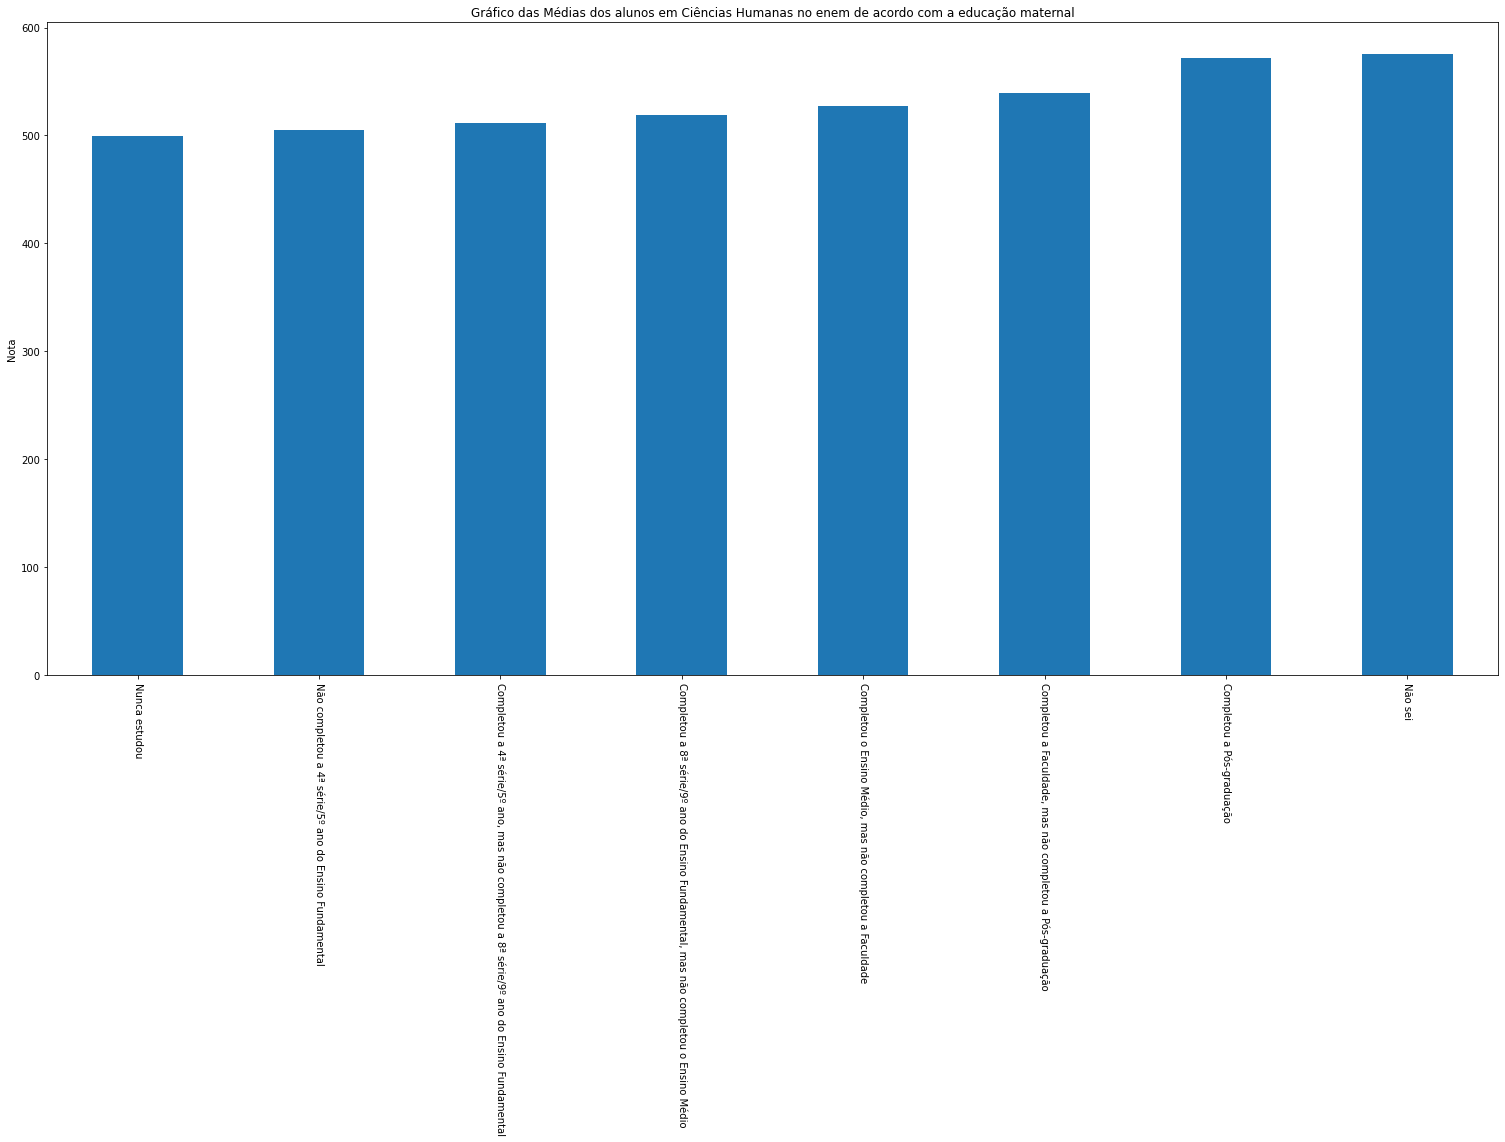

In [ ]:
# Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com a educação maternal:
df = std.groupby(['Q002'])['NU_NOTA_CH'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com a educação maternal")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 8), labels= ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei'], rotation=-90)
plt.show()

In [ ]:
#[A, B, C, D, E, F, G, H] = ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei']
std.groupby(['Q002'])['NU_NOTA_LC'].mean().sort_values(ascending=True)

Q002
A    487.436658
H    490.354167
B    498.407405
C    507.400459
D    514.014970
E    526.603242
F    552.427350
G    554.580435
Name: NU_NOTA_LC, dtype: float64

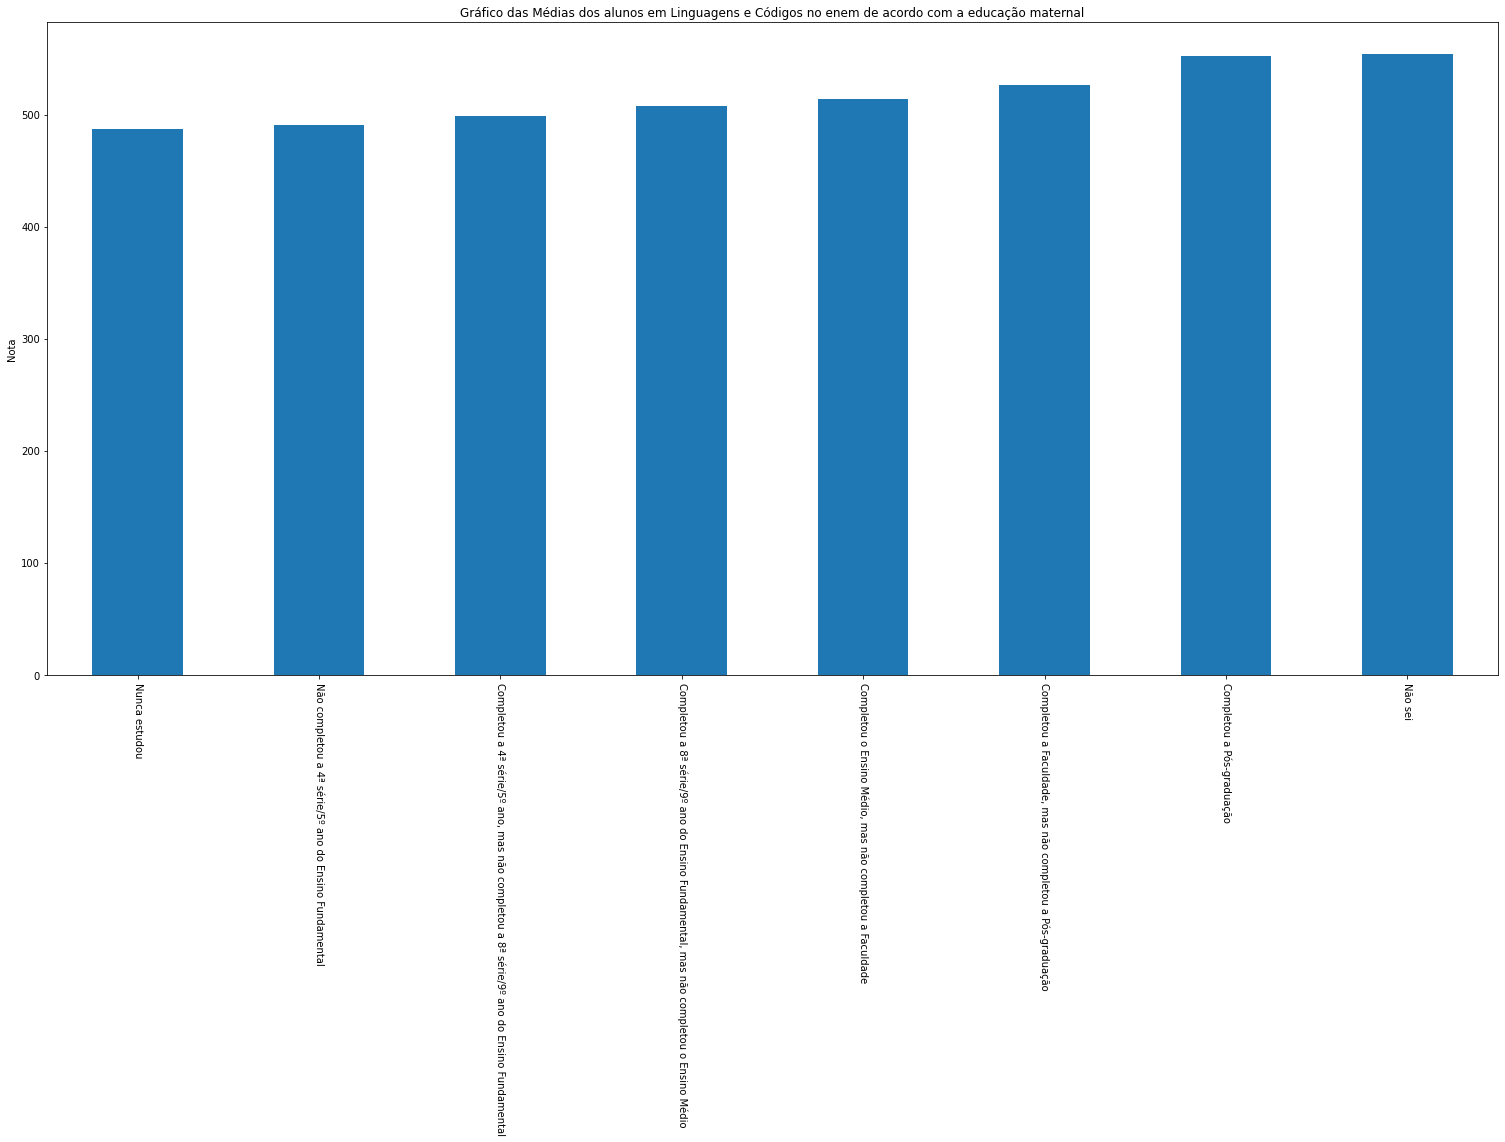

In [ ]:
# Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com a educação maternal:
df = std.groupby(['Q002'])['NU_NOTA_LC'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com a educação maternal")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 8), labels= ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei'], rotation=-90)
plt.show()

In [ ]:
#[A, B, C, D, E, F, G, H] = ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei']
std.groupby(['Q002'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)

Q002
H    461.071429
A    464.797844
B    490.160735
C    509.807339
D    525.329737
E    550.651807
F    603.492063
G    618.869565
Name: NU_NOTA_REDACAO, dtype: float64

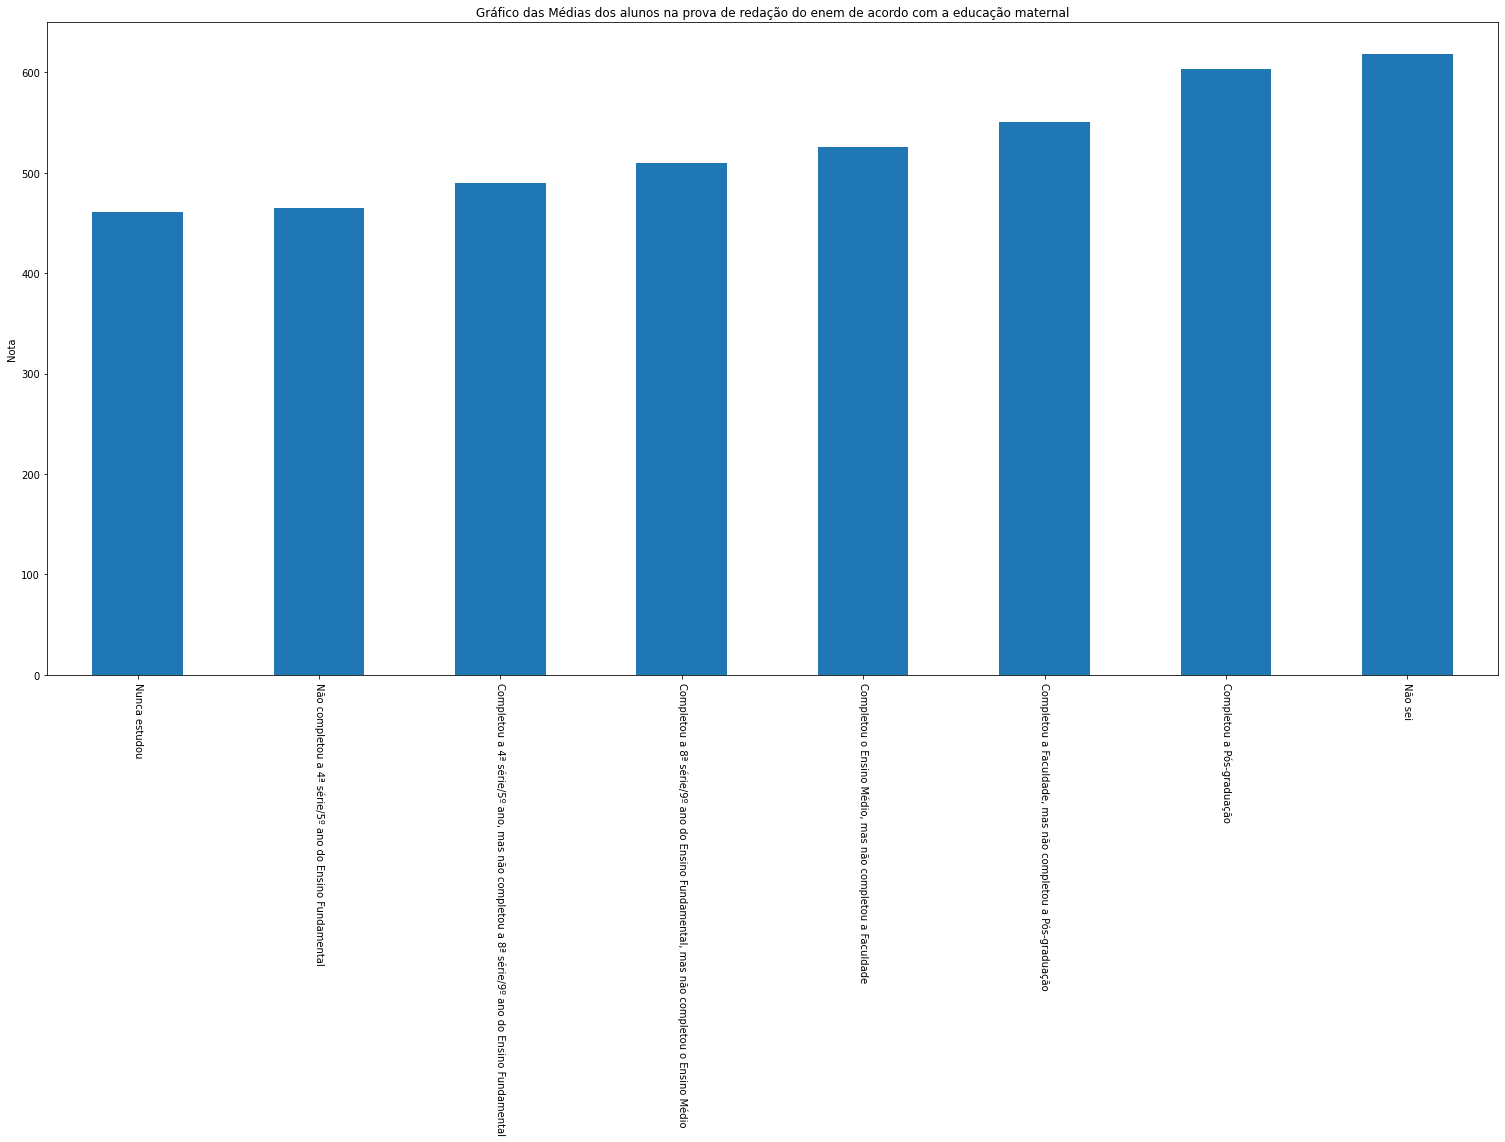

In [ ]:
# Gráfico das Médias dos alunos na prova de redação do enem de acordo com a educação maternal:
df = std.groupby(['Q002'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(26, 12), logy=False)
plt.title("Gráfico das Médias dos alunos na prova de redação do enem de acordo com a educação maternal")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 8), labels= ['Nunca estudou', 'Não completou a 4ª série/5º ano do Ensino Fundamental', 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 'Completou o Ensino Médio, mas não completou a Faculdade', 'Completou a Faculdade, mas não completou a Pós-graduação', 'Completou a Pós-graduação', 'Não sei'], rotation=-90)
plt.show()

####Médias dos alunos por disciplina no enem de acordo com o acesso à internet


Em média, em todas as disciplinas, os alunos que possuem acesso à internet possuem nota maior daqueles que não possuem.

In [ ]:
#[A, B] = ['Não', 'Sim']
std.groupby(['Q025'])['NU_NOTA_MT'].mean().sort_values(ascending=True)

Q025
A    454.359543
B    504.259779
Name: NU_NOTA_MT, dtype: float64

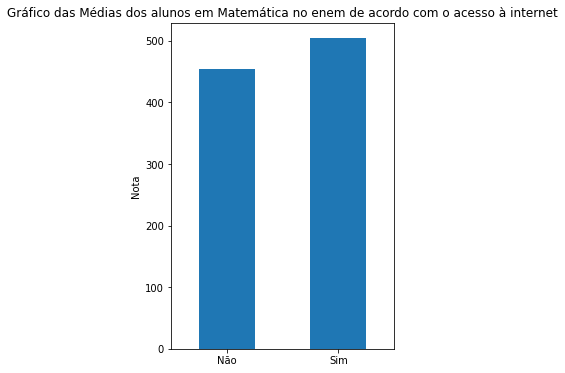

In [ ]:
# Gráfico das Médias dos alunos em Matemática no enem de acordo com o acesso à internet:
df = std.groupby(['Q025'])['NU_NOTA_MT'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(4, 6), logy=False)
plt.title("Gráfico das Médias dos alunos em Matemática no enem de acordo com o acesso à internet")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 2), labels= ['Não', 'Sim'], rotation=0)
plt.show()

In [ ]:
#[A, B] = ['Não', 'Sim']
std.groupby(['Q025'])['NU_NOTA_CN'].mean().sort_values(ascending=True)

Q025
A    455.618630
B    487.991394
Name: NU_NOTA_CN, dtype: float64

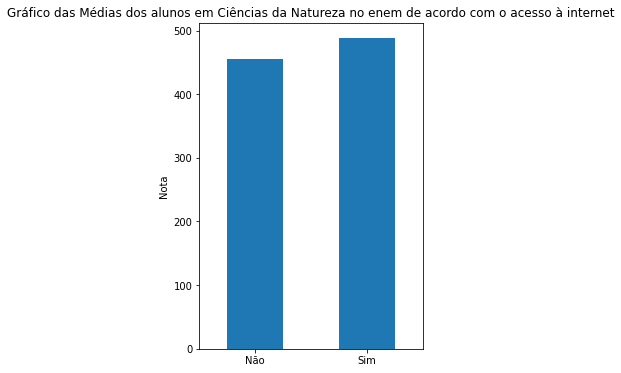

In [ ]:
# Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com o acesso à internet:
df = std.groupby(['Q025'])['NU_NOTA_CN'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(4, 6), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências da Natureza no enem de acordo com o acesso à internet")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 2), labels= ['Não', 'Sim'], rotation=0)
plt.show()

In [ ]:
#[A, B] = ['Não', 'Sim']
std.groupby(['Q025'])['NU_NOTA_CH'].mean().sort_values(ascending=True)

Q025
A    508.486803
B    546.692653
Name: NU_NOTA_CH, dtype: float64

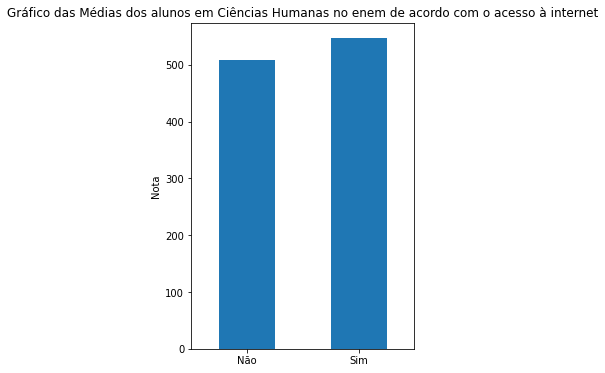

In [ ]:
# Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com o acesso à internet:
df = std.groupby(['Q025'])['NU_NOTA_CH'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(4, 6), logy=False)
plt.title("Gráfico das Médias dos alunos em Ciências Humanas no enem de acordo com o acesso à internet")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 2), labels= ['Não', 'Sim'], rotation=0)
plt.show()

In [ ]:
#[A, B] = ['Não', 'Sim']
std.groupby(['Q025'])['NU_NOTA_LC'].mean().sort_values(ascending=True)

Q025
A    496.139976
B    532.369231
Name: NU_NOTA_LC, dtype: float64

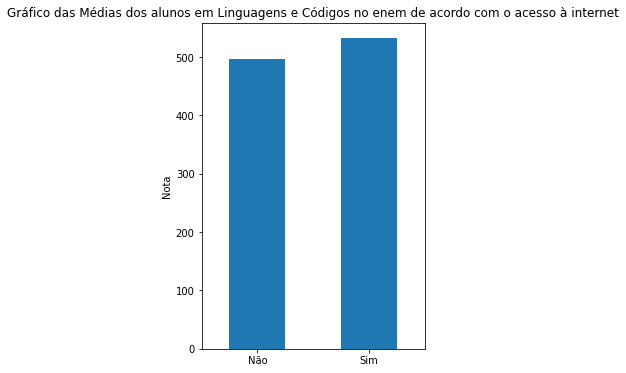

In [ ]:
# Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com o acesso à internet:
df = std.groupby(['Q025'])['NU_NOTA_LC'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(4, 6), logy=False)
plt.title("Gráfico das Médias dos alunos em Linguagens e Códigos no enem de acordo com o acesso à internet")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 2), labels= ['Não', 'Sim'], rotation=0)
plt.show()

In [ ]:
#[A, B] = ['Não', 'Sim']
std.groupby(['Q025'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)

Q025
A    490.299038
B    559.231114
Name: NU_NOTA_REDACAO, dtype: float64

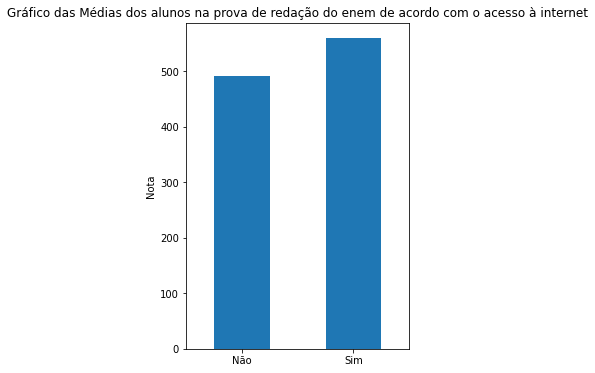

In [ ]:
# Gráfico das Médias dos alunos na prova de redação ndo enem de acordo com o acesso à internet:
df = std.groupby(['Q025'])['NU_NOTA_REDACAO'].mean().sort_values(ascending=True)
df.plot(kind='bar', subplots=True, figsize=(4, 6), logy=False)
plt.title("Gráfico das Médias dos alunos na prova de redação do enem de acordo com o acesso à internet")
plt.xlabel("")
plt.ylabel("Nota")
plt.xticks(ticks=np.arange(0, 2), labels= ['Não', 'Sim'], rotation=0)
plt.show()

#Estatísticas bivariadas

In [ ]:
print(stats.shapiro(std.NU_NOTA_CH))
print(stats.shapiro(std.NU_NOTA_CN))
print(stats.shapiro(std.NU_NOTA_LC))
print(stats.shapiro(std.NU_NOTA_MT))
print(stats.shapiro(std.NU_NOTA_REDACAO))
print(stats.shapiro(std.NU_IDADE))

(0.9978238344192505, 9.544778162284828e-11)
(0.9445509314537048, 0.0)
(0.994983971118927, 3.857478618073158e-18)
(0.9288040995597839, 0.0)
(0.9514208436012268, 0.0)
(0.6662213802337646, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Como o teste de Shapiro não retorna p-values confiáveis acima de 5000 linhas, não dá pra saber se o p-value da idade está acima ou não do valor crítico.
Por isso usaremos Spearman.

In [ ]:
std.cov()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_IDADE,39.668350,-24.798989,1.071779,-10.295787,-38.020712,-110.029811
NU_NOTA_CN,-24.798989,4942.735922,3137.204227,2605.860422,4129.161855,4971.215496
NU_NOTA_CH,1.071779,3137.204227,5354.013225,3443.845265,3855.714340,6213.074624
NU_NOTA_LC,-10.295787,2605.860422,3443.845265,4537.813112,3226.685511,5386.186687
NU_NOTA_MT,-38.020712,4129.161855,3855.714340,3226.685511,9800.274805,5795.064619
NU_NOTA_REDACAO,-110.029811,4971.215496,6213.074624,5386.186687,5795.064619,23618.863983


In [ ]:
std.corr(method='spearman')

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_IDADE,1.000000,-0.040733,-0.013437,-0.028756,-0.043219,-0.094221
NU_NOTA_CN,-0.040733,1.000000,0.569287,0.513525,0.458249,0.433206
NU_NOTA_CH,-0.013437,0.569287,1.000000,0.710143,0.489736,0.574001
NU_NOTA_LC,-0.028756,0.513525,0.710143,1.000000,0.454960,0.540244
NU_NOTA_MT,-0.043219,0.458249,0.489736,0.454960,1.000000,0.360907
NU_NOTA_REDACAO,-0.094221,0.433206,0.574001,0.540244,0.360907,1.000000


Podemos observar que a correlação da idade do aluno com a nota em todas as disciplinas no enem é negativa . Isso implica dizer que, quanto mais velho a pessoa, menor tende a ser sua nota. Isso pode ser visto no gráfico a baixo em que mostramos a nota da redação com relação a idade. Além disso, a correlação de todas as disciplinas entre si são positivas, isto é, quanto maior a nota é em uma disciplina, nas outras disciplina o aluno tende a ir tão bem quanto. Os gráficos abaixo também ilustram isso.

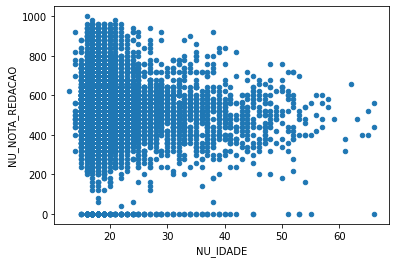

In [ ]:
std.plot.scatter(x='NU_IDADE', y='NU_NOTA_REDACAO')

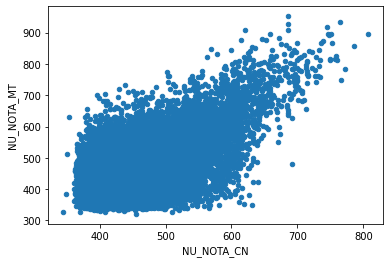

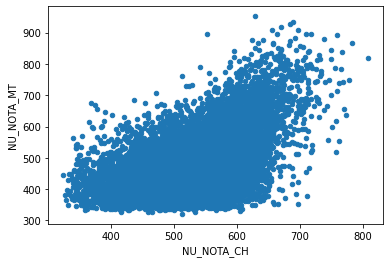

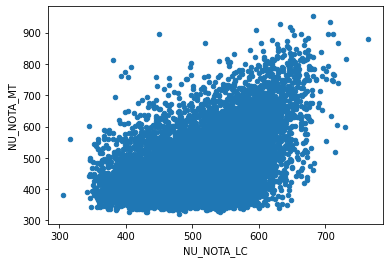

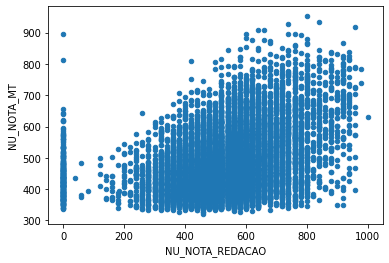

In [ ]:
#Relação entre Nota de matemáticas e outras matérias
std.plot.scatter(x='NU_NOTA_CN', y='NU_NOTA_MT')
std.plot.scatter(x='NU_NOTA_CH', y='NU_NOTA_MT')
std.plot.scatter(x='NU_NOTA_LC', y='NU_NOTA_MT')
std.plot.scatter(x='NU_NOTA_REDACAO', y='NU_NOTA_MT')

## Teste de hipótese: Mann-Whitney U test



In [55]:
std.groupby(['Q001'])['NU_NOTA_LC'].mean().sort_values(ascending=True)

Q001
A    492.266216
B    500.397959
H    505.794956
C    510.641448
D    519.036545
E    530.089062
F    561.987980
G    569.972917
Name: NU_NOTA_LC, dtype: float64

Como visto na estatística acima, um melhor grau de educação dos pais tende a favorecer o desempenho dos filhos. Então vamos verificar se essa tendência é relevante testando as hipóteses:

* H0: Não há diferença entre as notas dos filhos de pais que concluíram o ensino fundamental e filhos de pais que não concluíram
* H1: Há diferença entre as notas dos filhos de pais que concluíram o ensino 
fundamental e filhos de pais que não concluíram

(0.9855301976203918, 3.963417325795792e-21) (0.9875746369361877, 2.8988366206101273e-19)


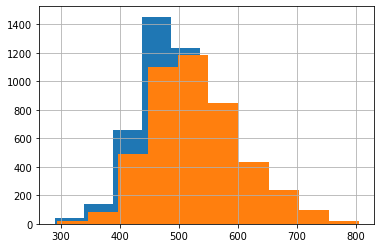

In [56]:
# Como as observações de um grupo são idenpendentes do outro, usaremos T-test não pareado, ou Mann-Whitney U test
# Para decidir, verificamos se as amostras seguem a normal através do teste de shapiro
std['ARITH_MEAN'] = std[['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)
fundamental_incompleto = std[(std.Q001 == 'A') | (std.Q001 == 'B') | (std.Q001 == 'C')]['ARITH_MEAN']
fundamental_completo = std[(std.Q001 == 'D') | (std.Q001 == 'E') | (std.Q001 == 'F') | (std.Q001 == 'G')]['ARITH_MEAN']
sh1 = stats.shapiro(fundamental_completo)
sh2 = stats.shapiro(fundamental_incompleto)
fundamental_incompleto.hist()
fundamental_completo.hist()
print(sh1, sh2)

In [ ]:
# Descobrimos que as distribuições das amostras não são normais (embora visualmente me enganem), portanto usaremos o Mann-Whitney U test não pareado
# 
stats.mannwhitneyu(fundamental_completo, fundamental_incompleto)

Como o p-value é menor que o valor crítico de relevância 0.05, há evidências para assumirmos que a hipótese nula é falsa, ou seja, a tendência apresentada nos gráficos é relevante.

## Teste de hipótese: Wilconxon signed-rank test

Vamos comparar médias no primeiro dia e no segundo dia

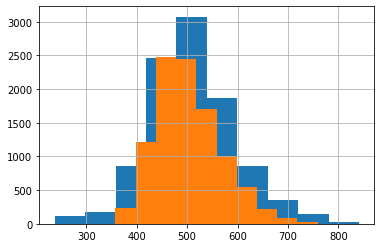

In [57]:
std['media_segundo_dia'] = std[['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1).hist()
std['media_primeiro_dia'] = std[['NU_NOTA_CH', 'NU_NOTA_CN']].mean(axis=1).hist()

Aparenta haver uma tendência das notas do segundo dia serem mais extremas, do que no primeiro dia. Para saber se essa diferença é relevante, testaremos as seguintes hipóteses:

* H0: A diferença das notas é insignificante.
* H1: As notas apresentam um diferença relevante.

In [58]:
# Para começar, analisamos a diferença entre as medias do primeiro e segundo dia
std['media_primeiro_dia'] = std[['NU_NOTA_CH', 'NU_NOTA_CN']].mean(axis=1)
std['media_segundo_dia'] = std[['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)
std['difs_medias_dias'] = std['media_primeiro_dia']-std['media_segundo_dia']
# std['difs_medias_dias']

In [59]:
sh = stats.shapiro(std.difs_medias_dias)
print(sh)

(0.9847901463508606, 2.8198491995999946e-31)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Como o p-valor é ínfimo, rejeitamos a hipótese das distribuições serem próximas da normal. Como estamos lidando com a mesma população em duas situações distintas, usaremos para esta análise o teste Wilcoxon signed-rank test.

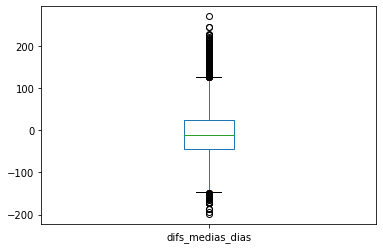

In [60]:
# Vamos checar antes se a distribuição é simétrica
std.difs_medias_dias.plot(kind='box')

In [61]:
# Sendo a distribuição simétrica, vamos a execução do teste
stats.wilcoxon(std.difs_medias_dias)

WilcoxonResult(statistic=19882900.5, pvalue=1.1417542129679417e-65)


Como o p-value é menor que o valor crítico de relevância 0.05, há evidências para assumirmos que a hipótese nula é falsa, ou seja, as notas apresentam uma diferença relevante.



## Teste de hipótese: T-tests (pareado e não pareado)

Infelizmente não conseguimos testar nenhuma amostra com shapiro que resultasse em uma normal. Inclusive percebemos que quanto maior a amostra, mais distante da normal ela se torna, acredito que é uma questão do algoritmo.